# Rainfall Prediction In India

In [1]:
#Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Importing the CSV file

In [4]:
path = "rainfall.csv"
df = pd.read_csv(path)

In [5]:
df.head(5)

SUBDIVISION  YEAR   JAN    FEB   MAR    APR    MAY    JUN  \
0  Andaman & Nicobar Islands  1901  49.2   87.1  29.2    2.3  528.8  517.5   
1  Andaman & Nicobar Islands  1902   0.0  159.8  12.2    0.0  446.1  537.1   
2  Andaman & Nicobar Islands  1903  12.7  144.0   0.0    1.0  235.1  479.9   
3  Andaman & Nicobar Islands  1904   9.4   14.7   0.0  202.4  304.5  495.1   
4  Andaman & Nicobar Islands  1905   1.3    0.0   3.3   26.9  279.5  628.7   

     JUL    AUG    SEP    OCT    NOV    DEC  ANNUAL     JF    MAM    JJAS  \
0  365.1  481.1  332.6  388.5  558.2   33.6  3373.2  136.3  560.3  1696.3   
1  228.9  753.7  666.2  197.2  359.0  160.5  3520.7  159.8  458.3  2185.9   
2  728.4  326.7  339.0  181.2  284.4  225.0  2957.4  156.7  236.1  1874.0   
3  502.0  160.1  820.4  222.2  308.7   40.1  3079.6   24.1  506.9  1977.6   
4  368.7  330.5  297.0  260.7   25.4  344.7  2566.7    1.3  309.7  1624.9   

     OND  
0  980.3  
1  716.7  
2  690.6  
3  571.0  
4  630.8

In [6]:
#Here we can see that the dataset contains rainfall in mm for all months of the year and an annual estimate indexed with their respective subdivisions and variations within months
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4188 entries, 0 to 4187
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4188 non-null   object 
 1   YEAR         4188 non-null   int64  
 2   JAN          4184 non-null   float64
 3   FEB          4185 non-null   float64
 4   MAR          4182 non-null   float64
 5   APR          4184 non-null   float64
 6   MAY          4185 non-null   float64
 7   JUN          4183 non-null   float64
 8   JUL          4181 non-null   float64
 9   AUG          4184 non-null   float64
 10  SEP          4182 non-null   float64
 11  OCT          4181 non-null   float64
 12  NOV          4177 non-null   float64
 13  DEC          4178 non-null   float64
 14  ANNUAL       4162 non-null   float64
 15  JF           4182 non-null   float64
 16  MAM          4179 non-null   float64
 17  JJAS         4178 non-null   float64
 18  OND          4175 non-null   float64
dtypes: flo

In [7]:
df.describe()

YEAR          JAN          FEB          MAR          APR  \
count  4188.000000  4184.000000  4185.000000  4182.000000  4184.000000   
mean   1959.220630    18.938337    21.599427    27.412912    43.071845   
std      33.717097    33.793128    35.731734    46.927963    68.150985   
min    1901.000000     0.000000     0.000000     0.000000     0.000000   
25%    1930.000000     0.600000     0.500000     1.000000     3.000000   
50%    1959.000000     5.950000     6.500000     7.900000    15.450000   
75%    1988.000000    22.000000    26.600000    31.375000    49.650000   
max    2017.000000   583.700000   403.500000   605.600000   595.100000   

               MAY          JUN          JUL          AUG          SEP  \
count  4185.000000  4183.000000  4181.000000  4184.000000  4182.000000   
mean     85.660860   230.117475   347.020043   289.742185   197.316332   
std     122.695137   234.292087   268.850702   188.426071   135.547646   
min       0.000000     0.400000     0.000000     0.000000     0.100000   
25%       8.600000    70.800000   175.600000   155.850000   100.400000   
50%      36.900000   138.800000   285.000000   258.500000   173.700000   
75%      97.800000   305.000000   418.500000   377.625000   266.125000   
max    1168.600000  1609.900000  2362.800000  1664.600000  1222.000000   

               OCT          NOV          DEC       ANNUAL           JF  \
count  4181.000000  4177.000000  4178.000000  4162.000000  4182.000000   
mean     95.324707    39.496433    18.968645  1409.449207    40.522979   
std      99.194851    68.358706    43.053759   902.599421    59.293904   
min       0.000000     0.000000     0.000000    62.300000     0.000000   
25%      14.600000     0.600000     0.100000   803.025000     4.000000   
50%      65.200000     9.400000     3.000000  1120.350000    18.900000   
75%     148.300000    45.300000    17.500000  1643.575000    50.175000   
max     948.300000   648.900000   617.500000  6331.100000   699.500000   

               MAM         JJAS          OND  
count  4179.000000  4178.000000  4175.000000  
mean    155.820914  1063.851580   153.648623  
std     201.198627   706.666045   166.863171  
min       0.000000    57.400000     0.000000  
25%      24.000000   573.850000    34.000000  
50%      74.800000   880.600000    97.700000  
75%     196.950000  1287.450000   211.800000  
max    1745.800000  4536.900000  1252.500000

In [8]:
#Exploration of Data
'''The non numerical variable identified from the dataset is the subdivsion and it has multiple entries for various states and union
   territories across India and therefore we need to identify all distinct values of this column '''
unique_subdivs = df['SUBDIVISION'].unique()
unique_subdivs

array(['Andaman & Nicobar Islands', 'Arunachal Pradesh',
       'Assam & Meghalaya', 'Naga Mani Mizo Tripura',
       'Sub Himalayan West Bengal & Sikkim', 'Gangetic West Bengal',
       'Orissa', 'Jharkhand', 'Bihar', 'East Uttar Pradesh',
       'West Uttar Pradesh', 'Uttarakhand', 'Haryana Delhi & Chandigarh',
       'Punjab', 'Himachal Pradesh', 'Jammu & Kashmir', 'West Rajasthan',
       'East Rajasthan', 'West Madhya Pradesh', 'East Madhya Pradesh',
       'Gujarat Region', 'Saurashtra & Kutch', 'Konkan & Goa',
       'Madhya Maharashtra', 'Matathwada', 'Vidarbha', 'Chhattisgarh',
       'Coastal Andhra Pradesh', 'Telangana', 'Rayalseema', 'Tamil Nadu',
       'Coastal Karnataka', 'North Interior Karnataka',
       'South Interior Karnataka', 'Kerala', 'Lakshadweep'], dtype=object)

array([[<AxesSubplot:title={'center':'YEAR'}>,
        <AxesSubplot:title={'center':'JAN'}>,
        <AxesSubplot:title={'center':'FEB'}>,
        <AxesSubplot:title={'center':'MAR'}>],
       [<AxesSubplot:title={'center':'APR'}>,
        <AxesSubplot:title={'center':'MAY'}>,
        <AxesSubplot:title={'center':'JUN'}>,
        <AxesSubplot:title={'center':'JUL'}>],
       [<AxesSubplot:title={'center':'AUG'}>,
        <AxesSubplot:title={'center':'SEP'}>,
        <AxesSubplot:title={'center':'OCT'}>,
        <AxesSubplot:title={'center':'NOV'}>],
       [<AxesSubplot:title={'center':'DEC'}>,
        <AxesSubplot:title={'center':'ANNUAL'}>,
        <AxesSubplot:title={'center':'JF'}>,
        <AxesSubplot:title={'center':'MAM'}>],
       [<AxesSubplot:title={'center':'JJAS'}>,
        <AxesSubplot:title={'center':'OND'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

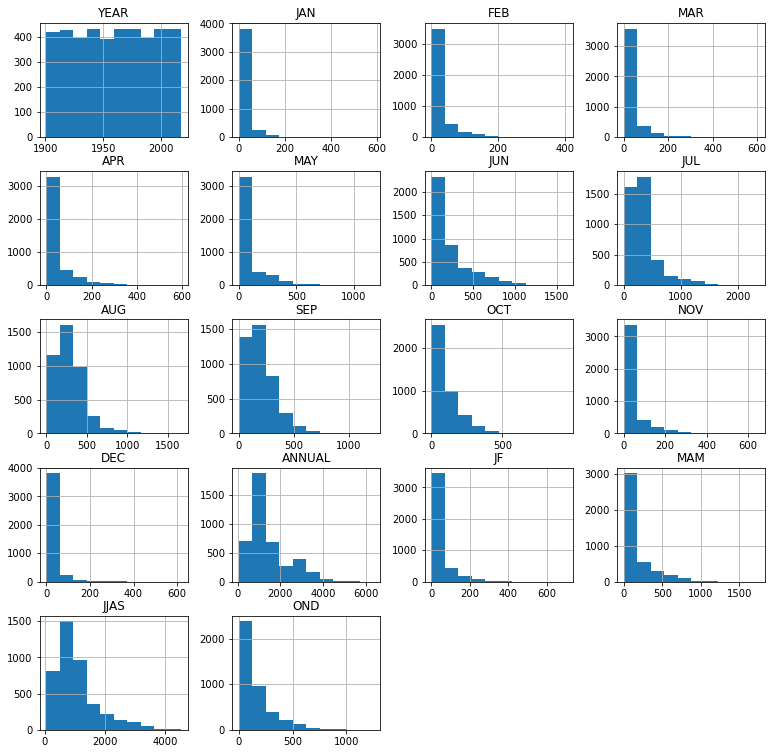

In [9]:
'''The data is dating from 1901 to 2015 and let us plot a simple historgram to see the variations
   and we can point out that the period of June to September is most contributing to rainfall (mm)'''
df.hist(figsize=(13,13))

In [10]:
# To count the number of unique states
unique_states = df.groupby('YEAR')[['SUBDIVISION']].count()['SUBDIVISION'].value_counts()
unique_states

36    94
35    22
34     1
Name: SUBDIVISION, dtype: int64

C:\Users\Gayathri\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


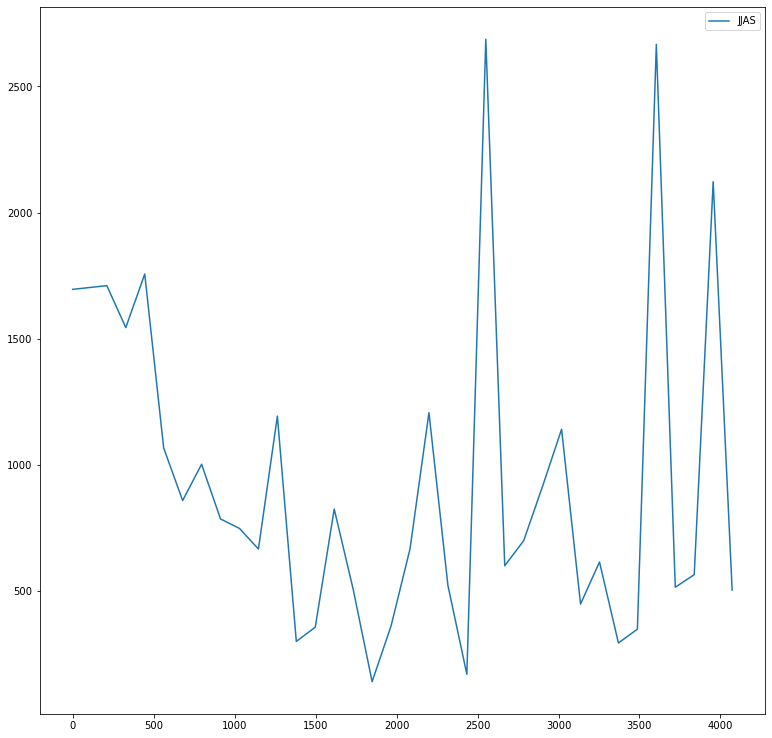

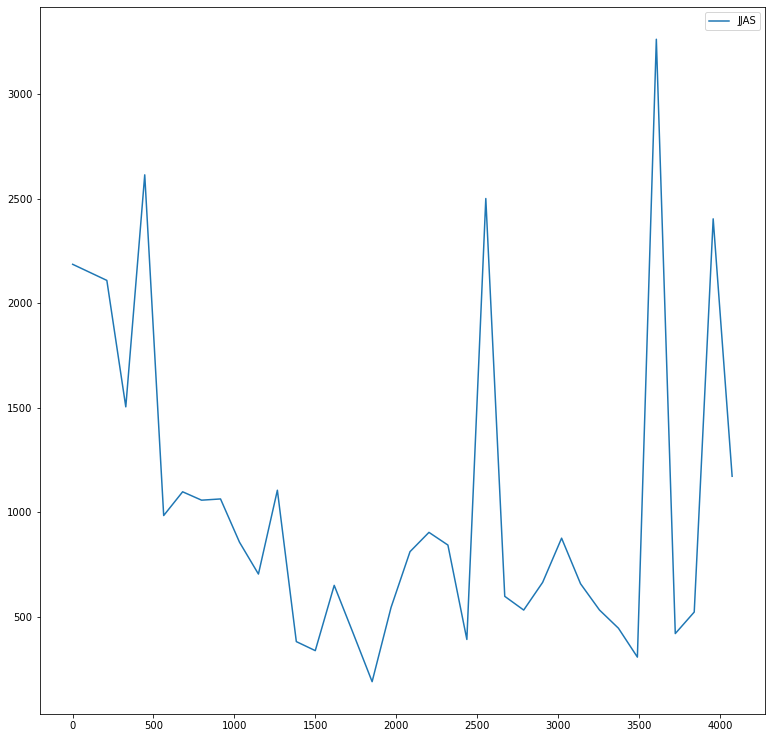

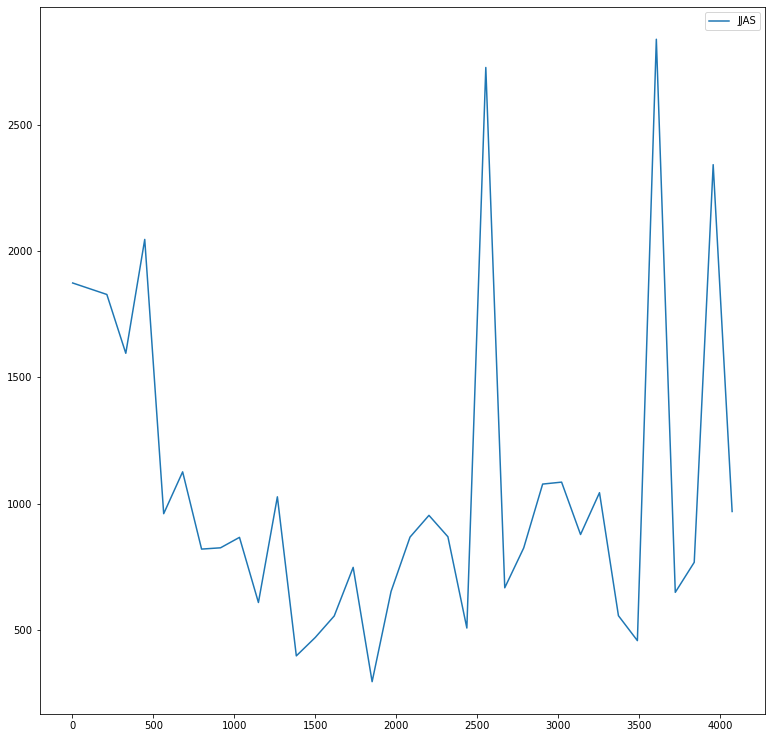

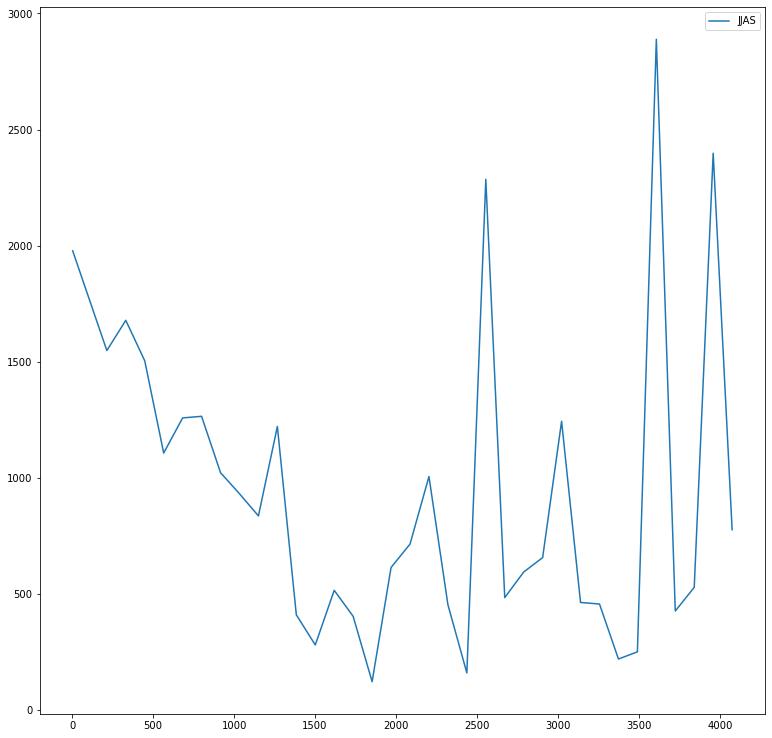

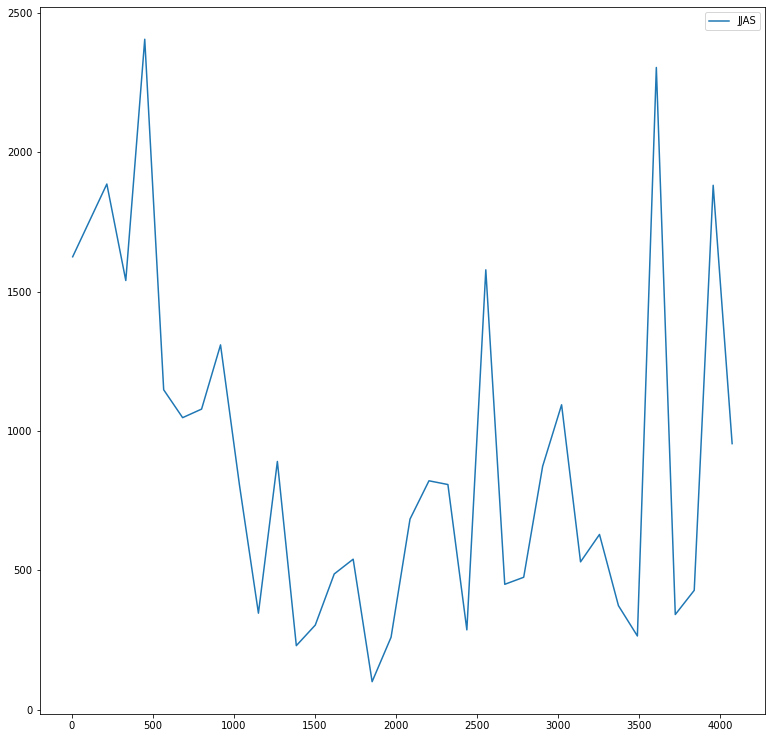

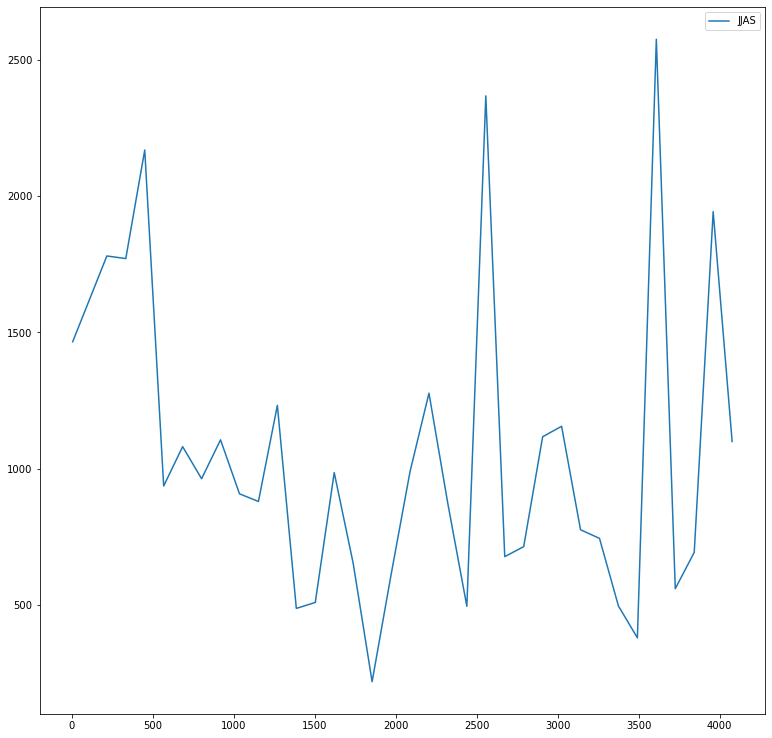

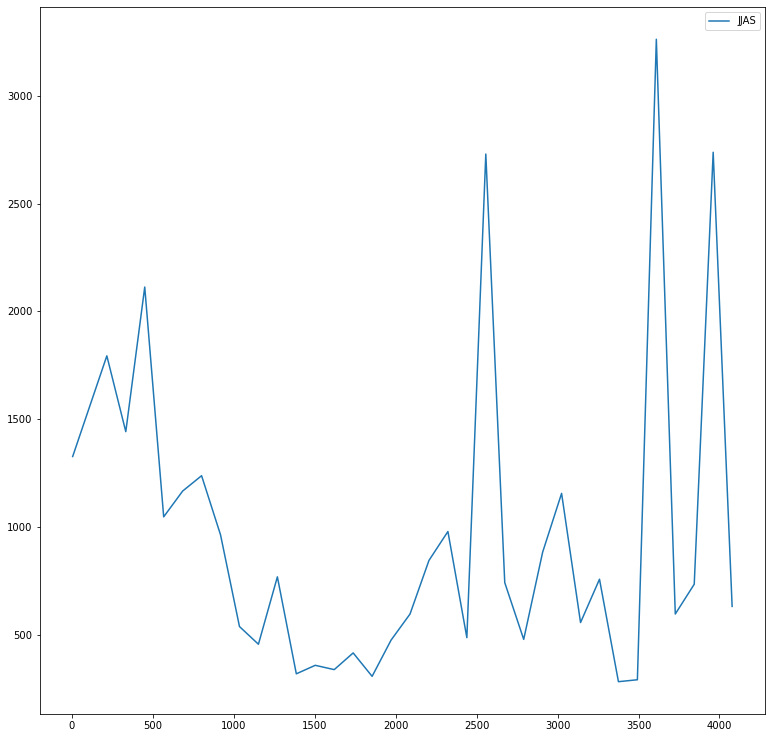

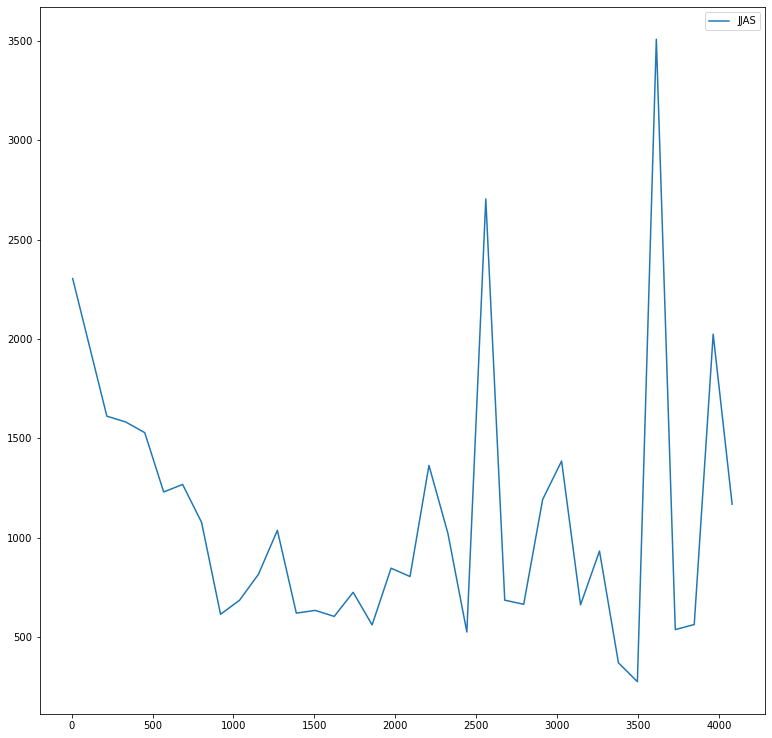

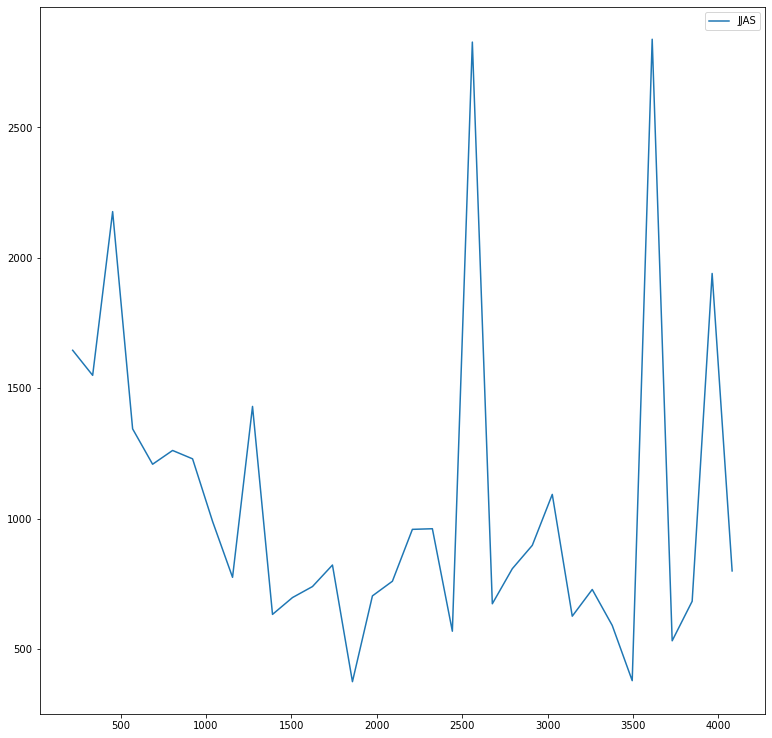

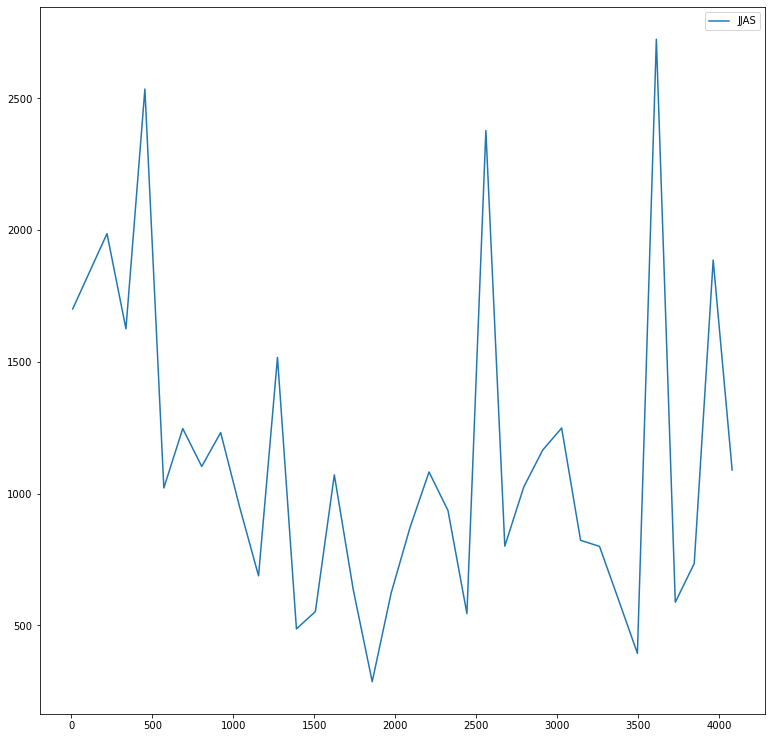

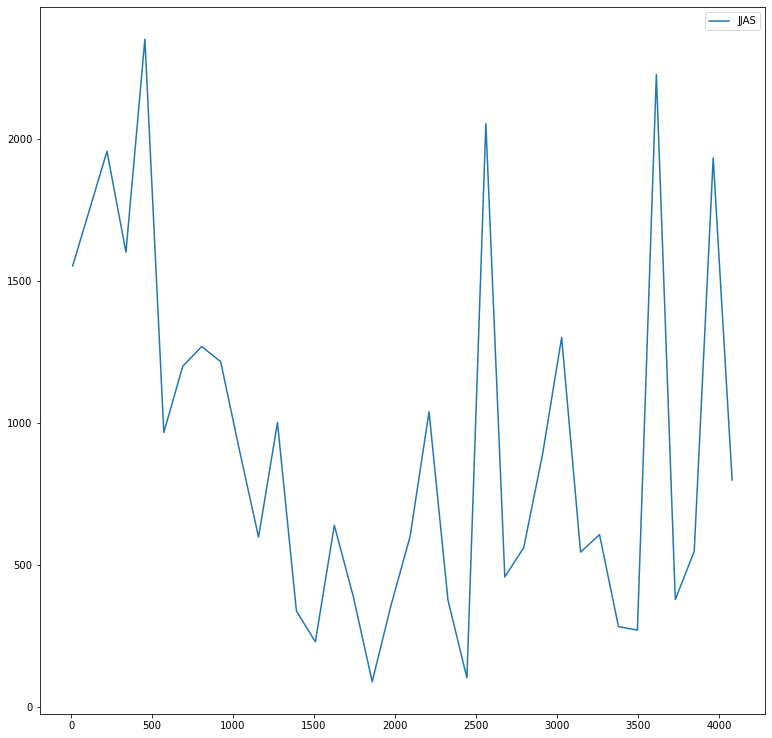

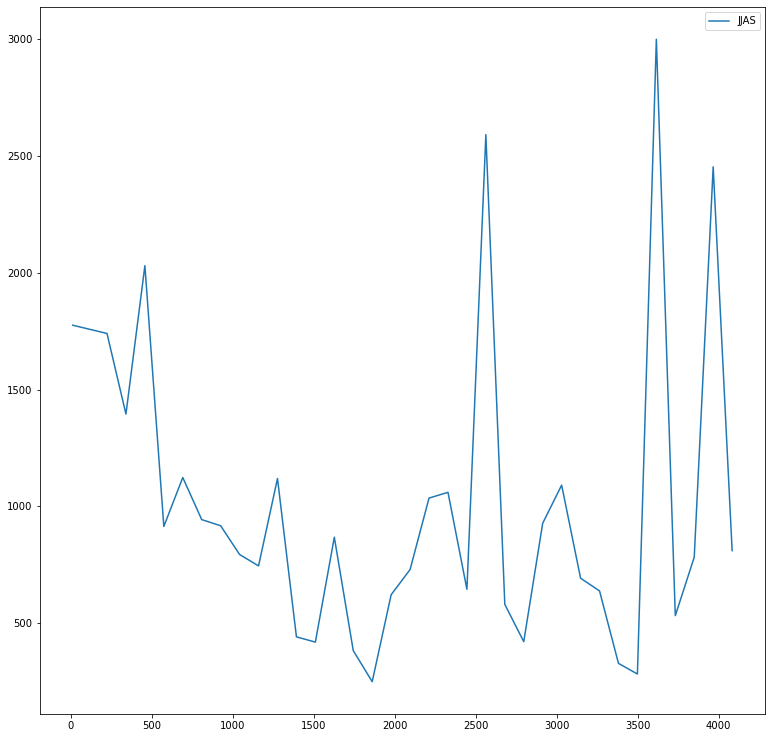

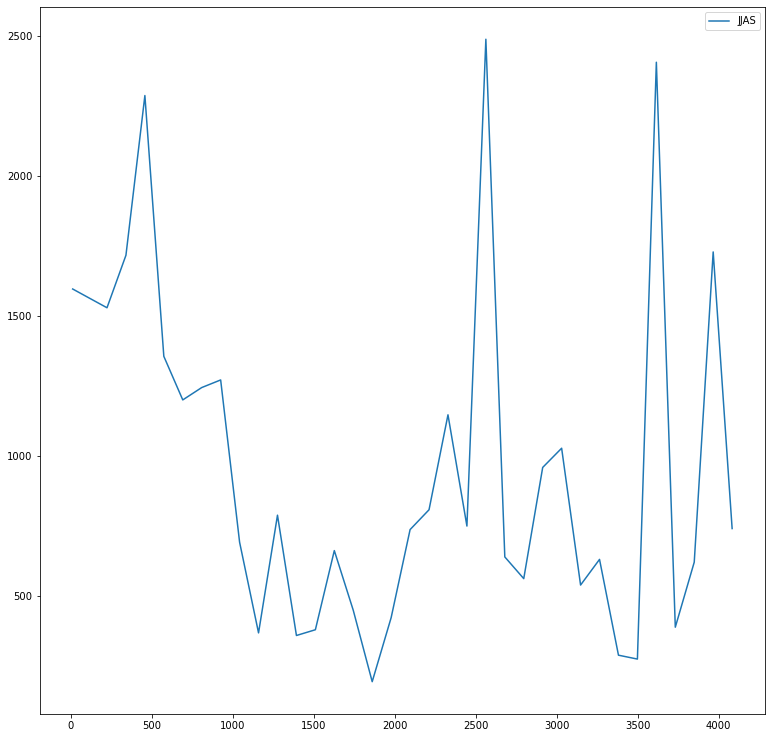

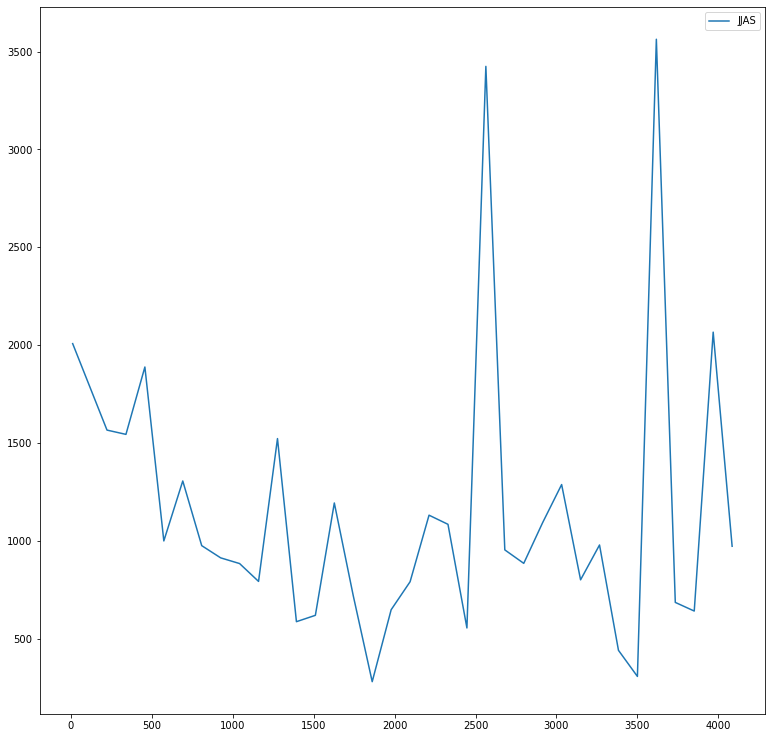

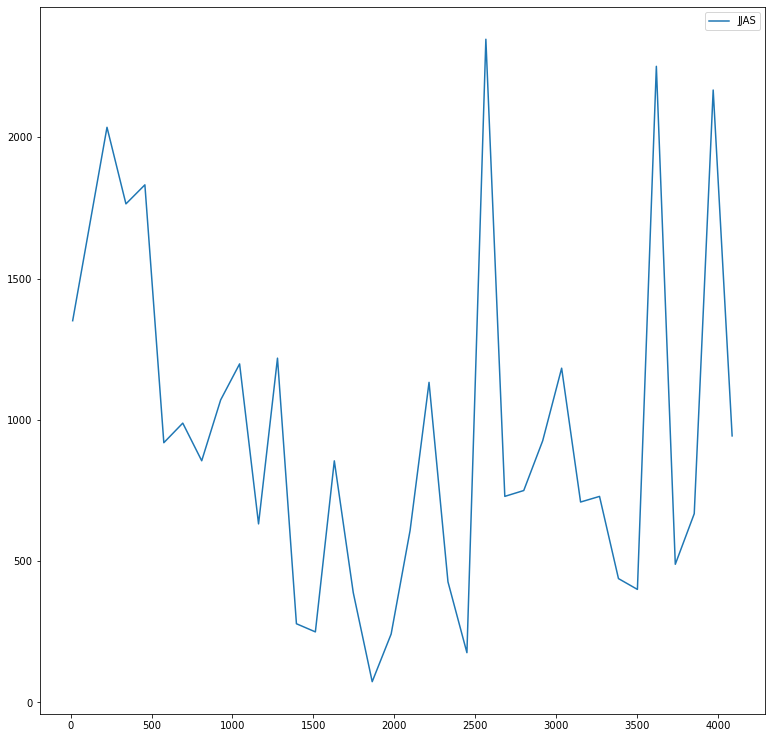

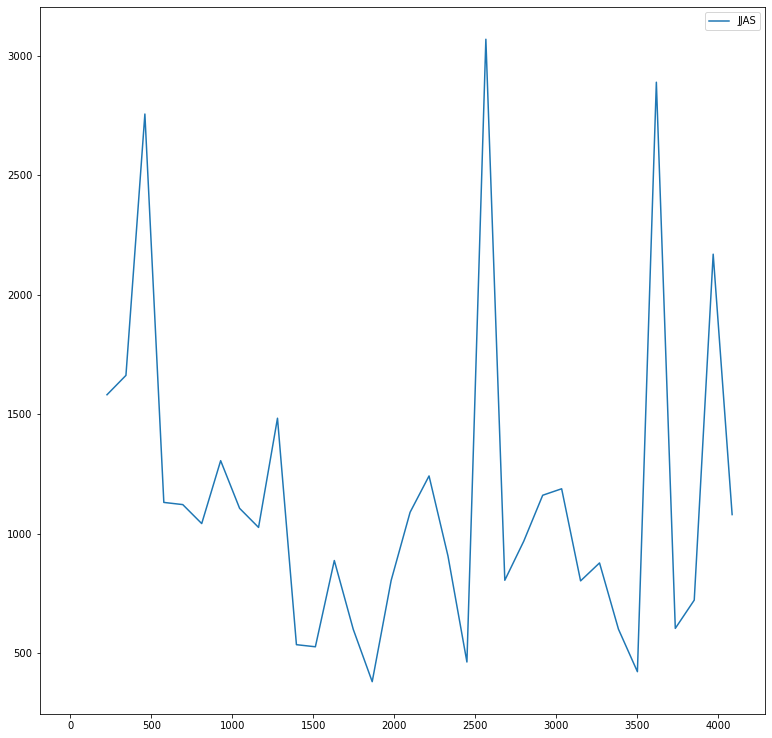

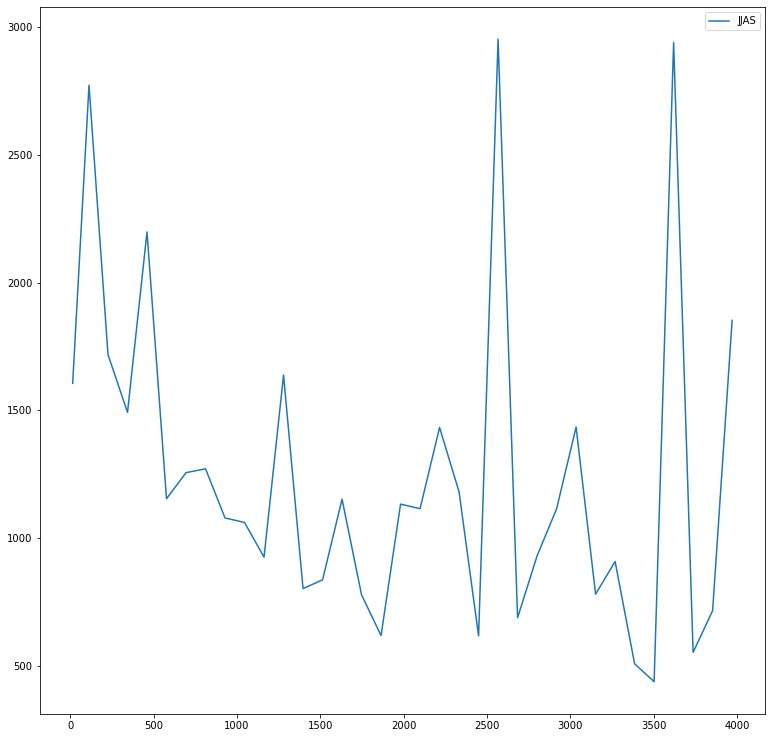

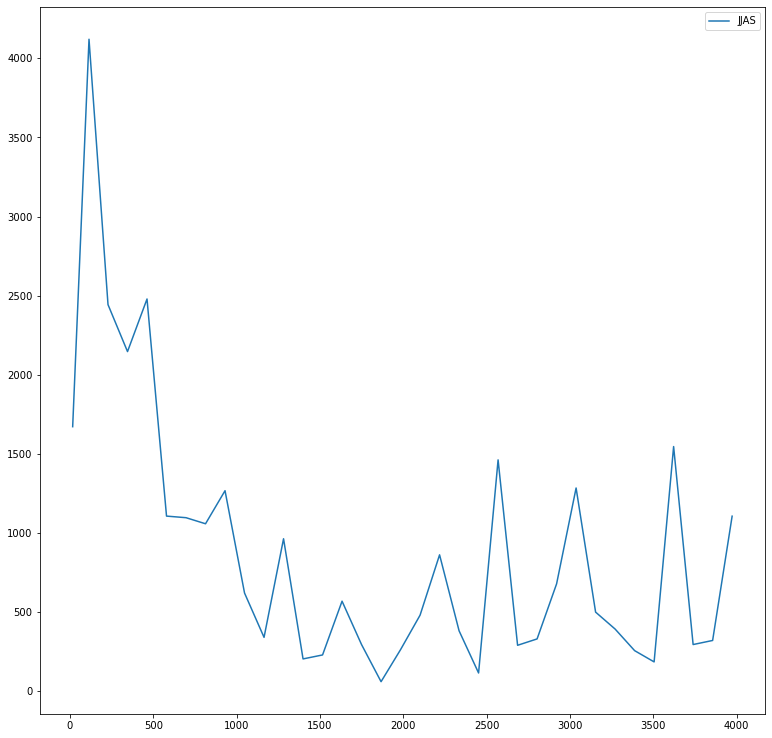

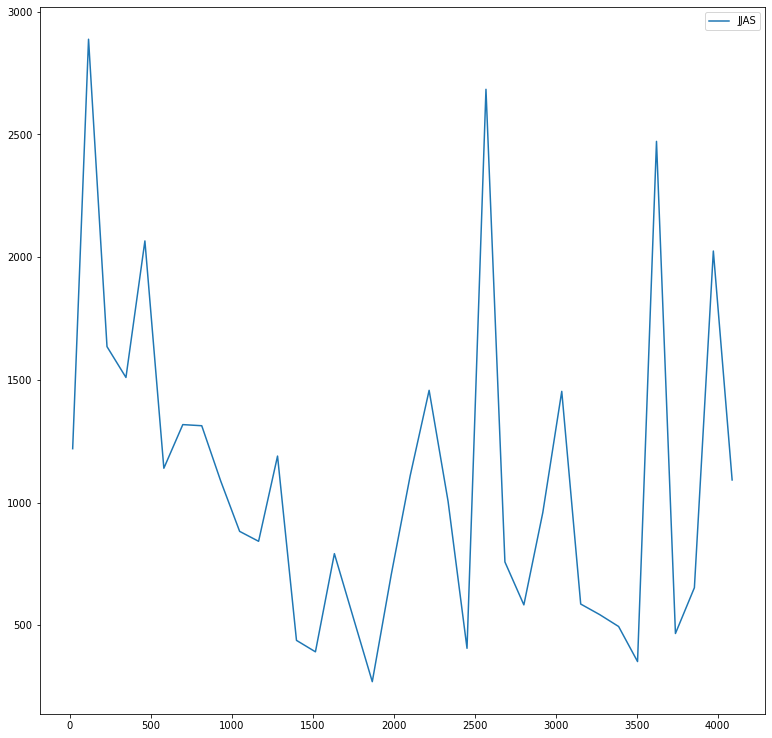

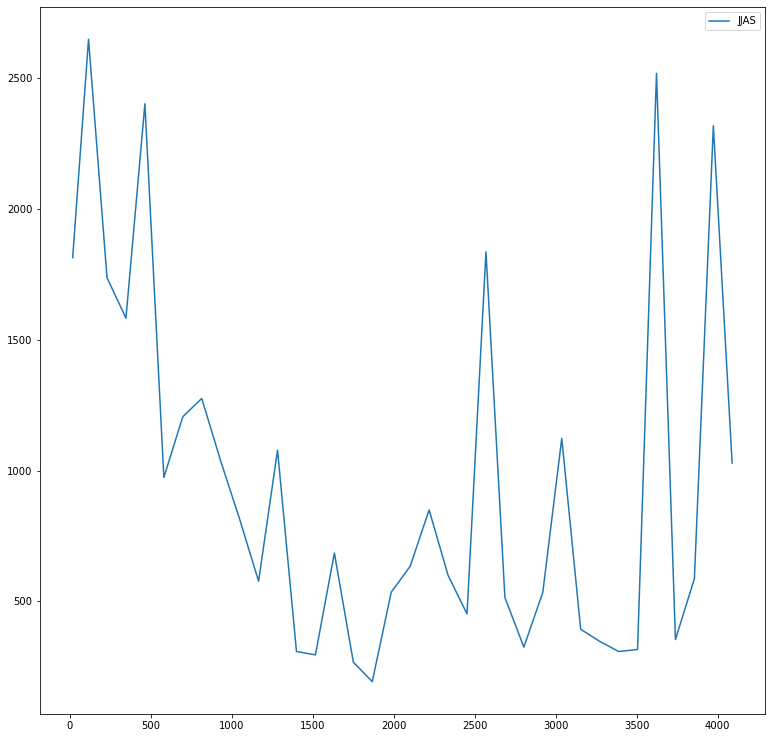

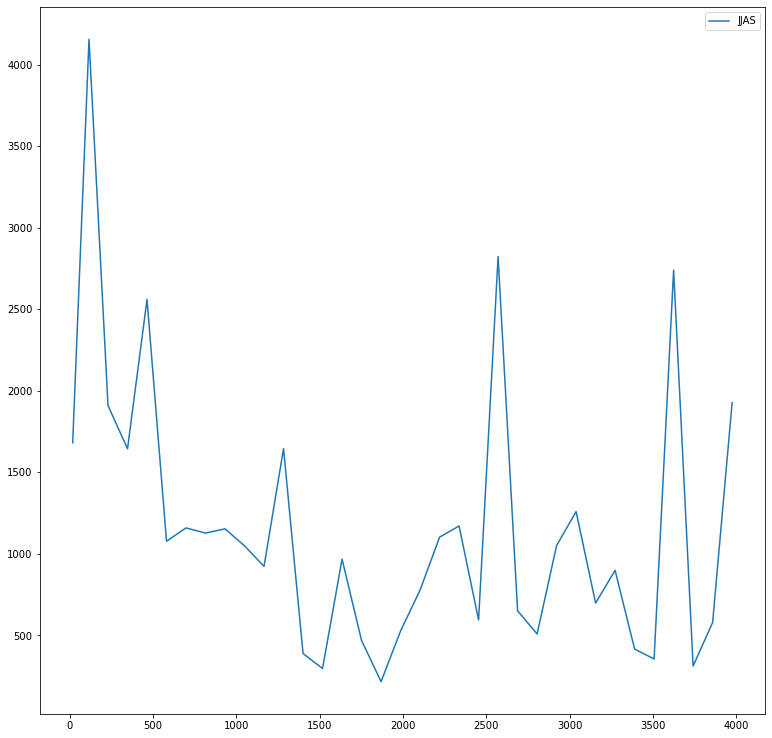

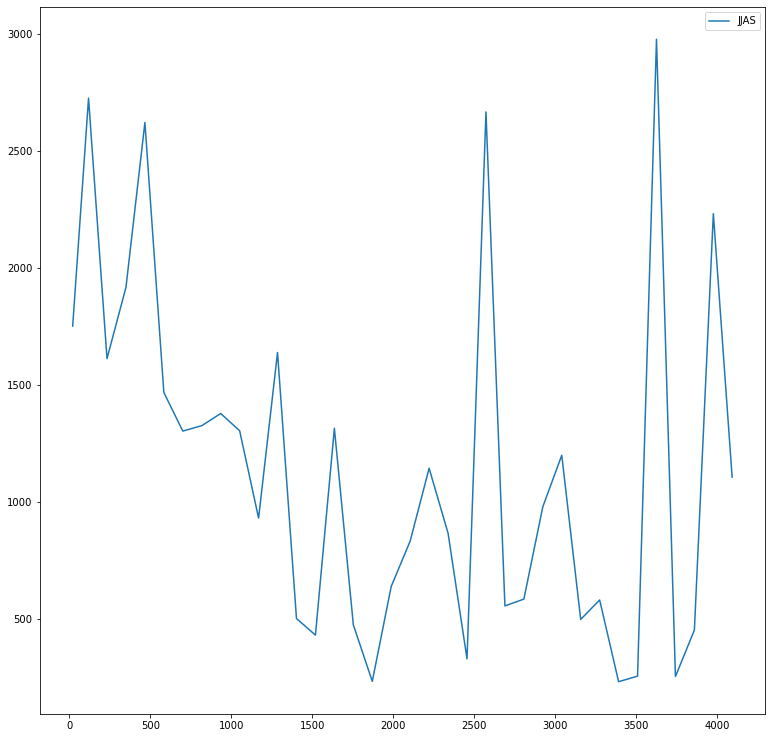

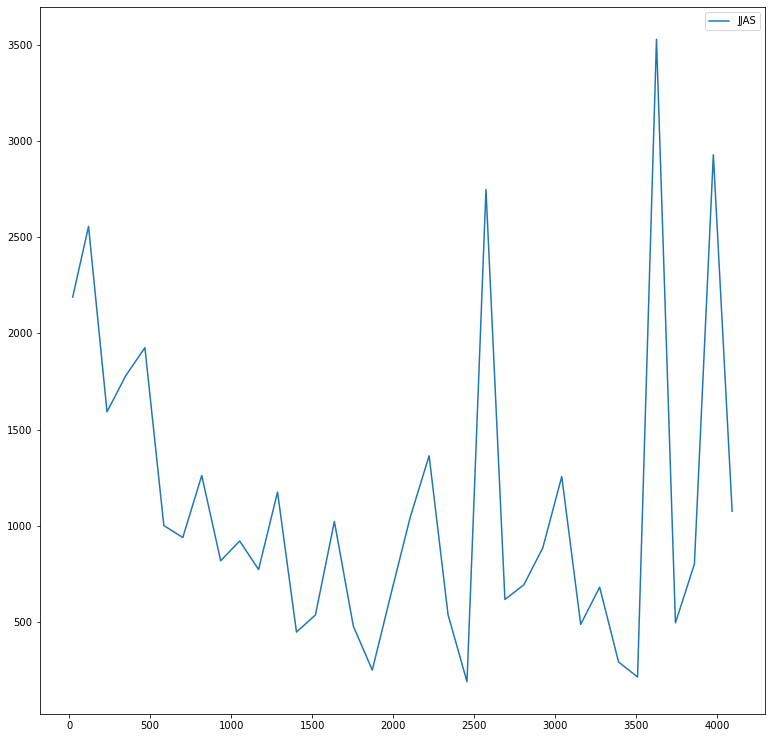

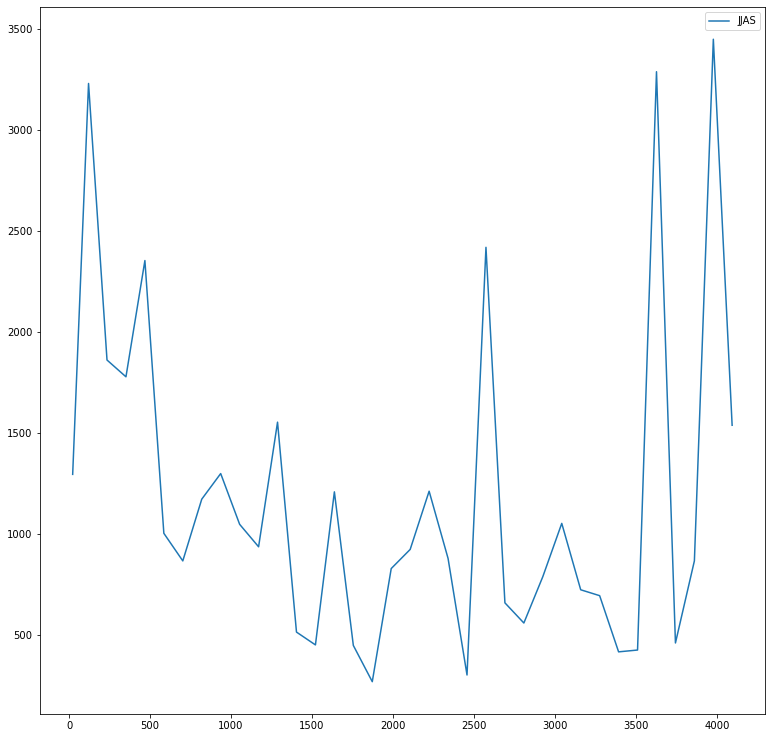

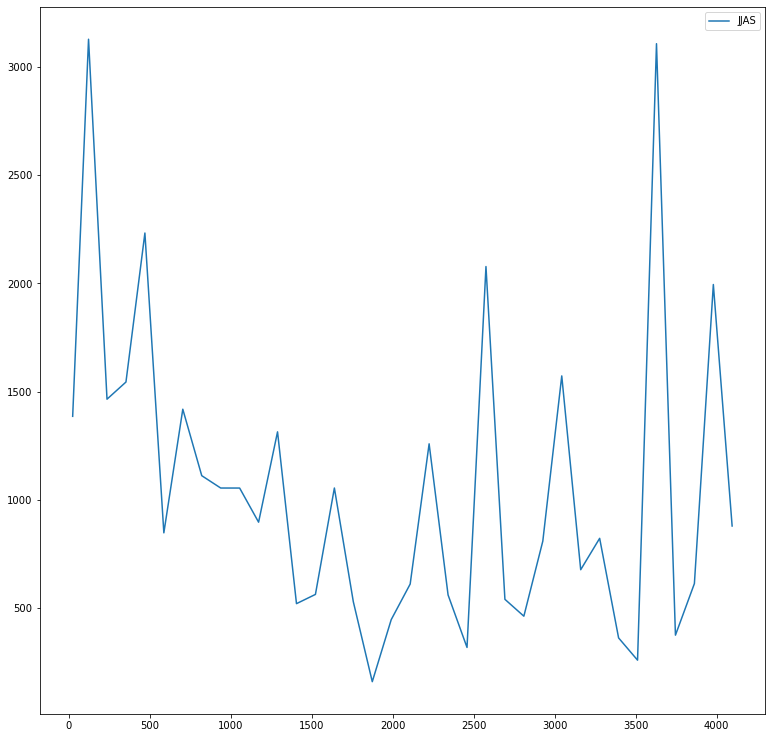

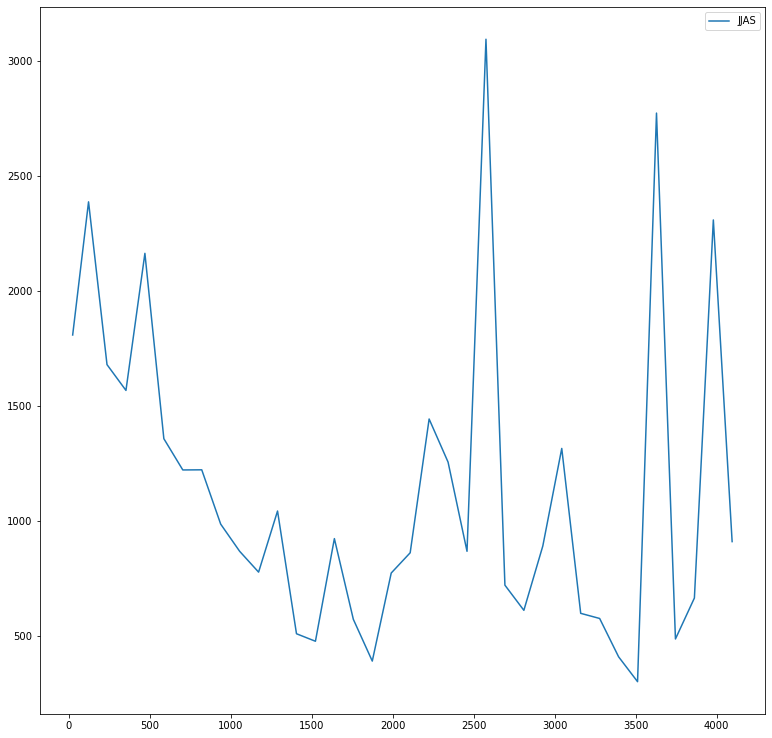

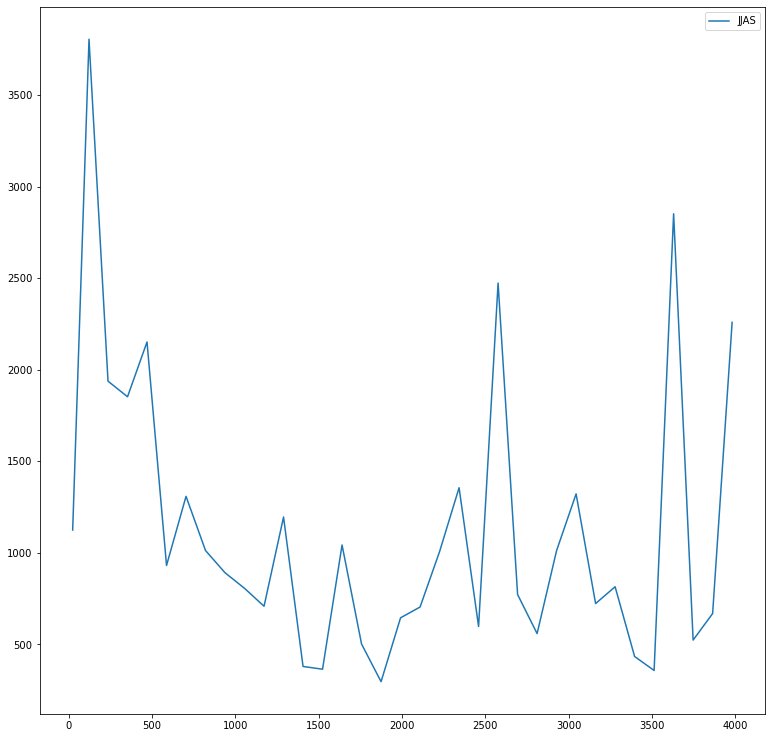

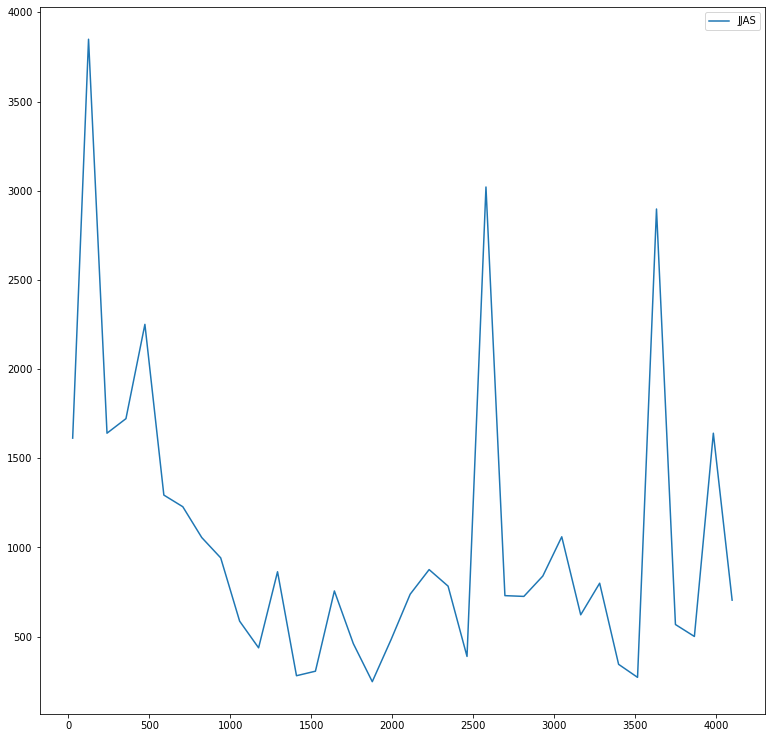

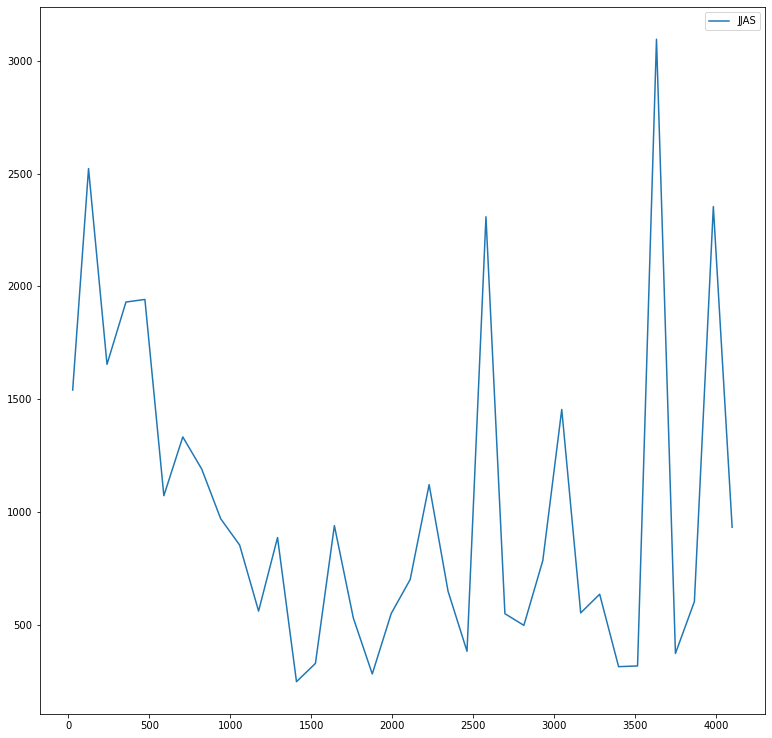

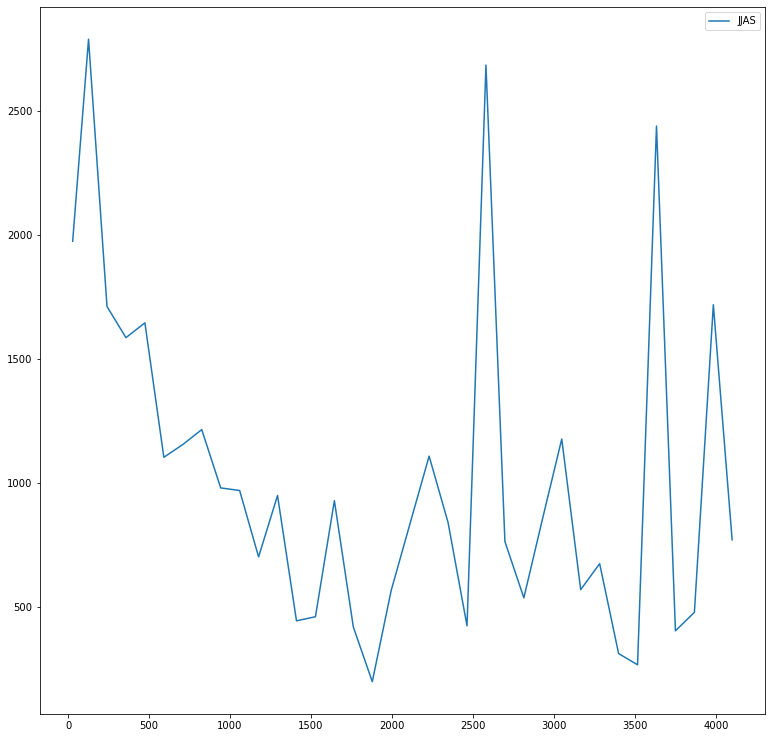

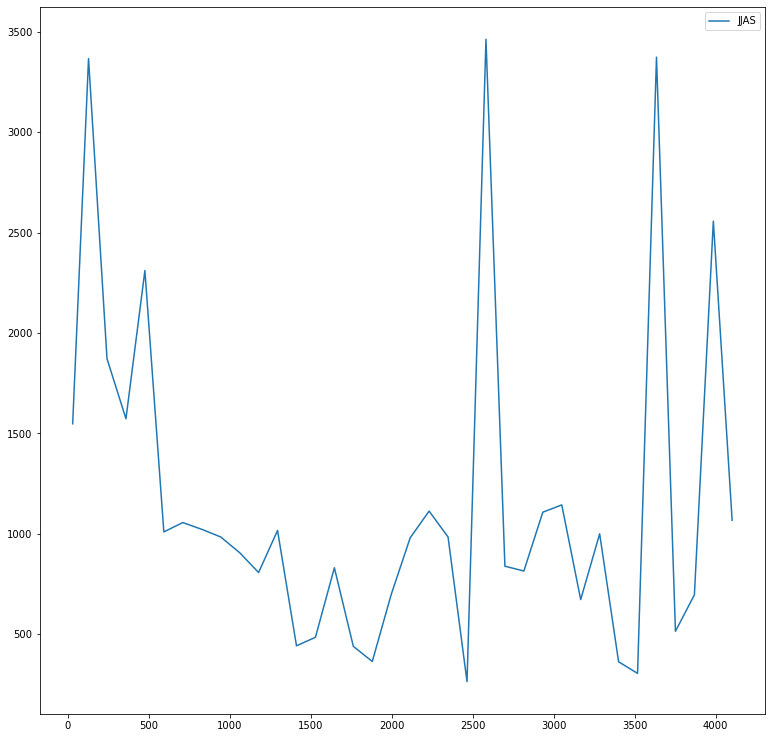

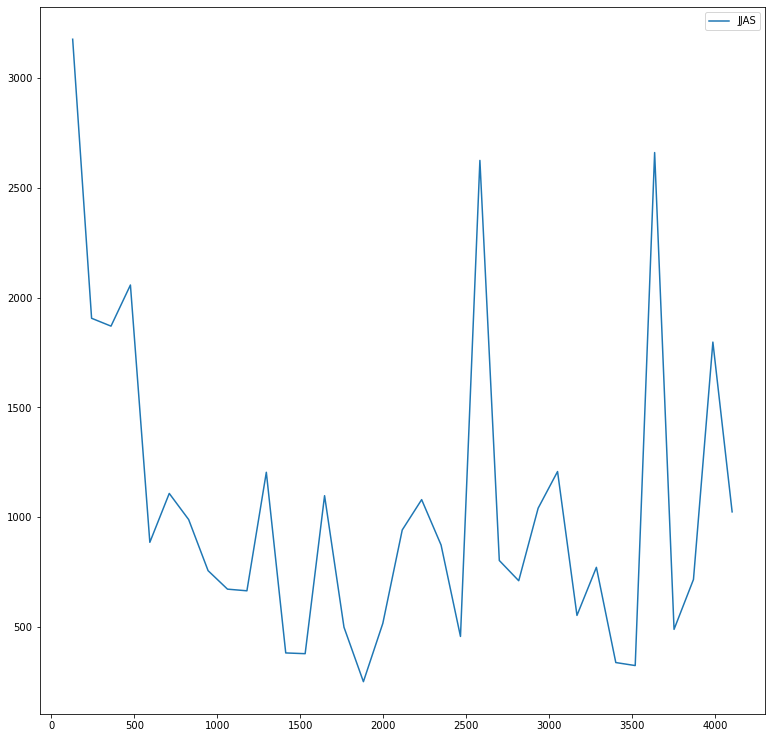

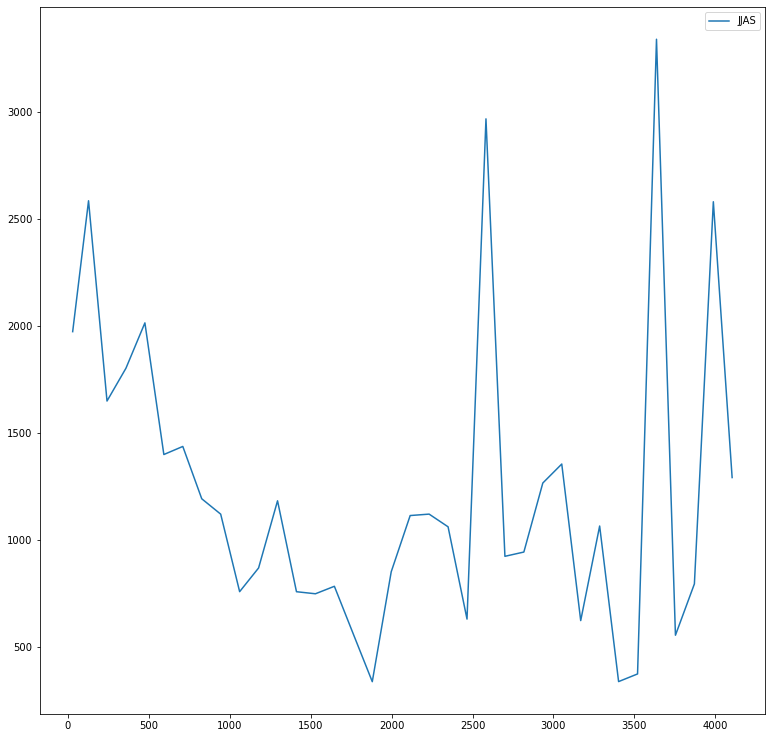

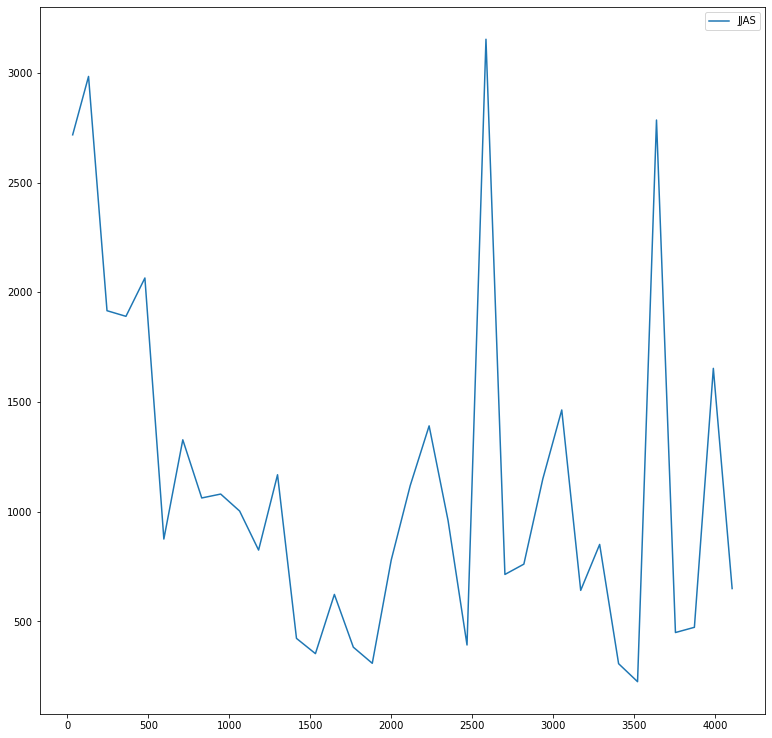

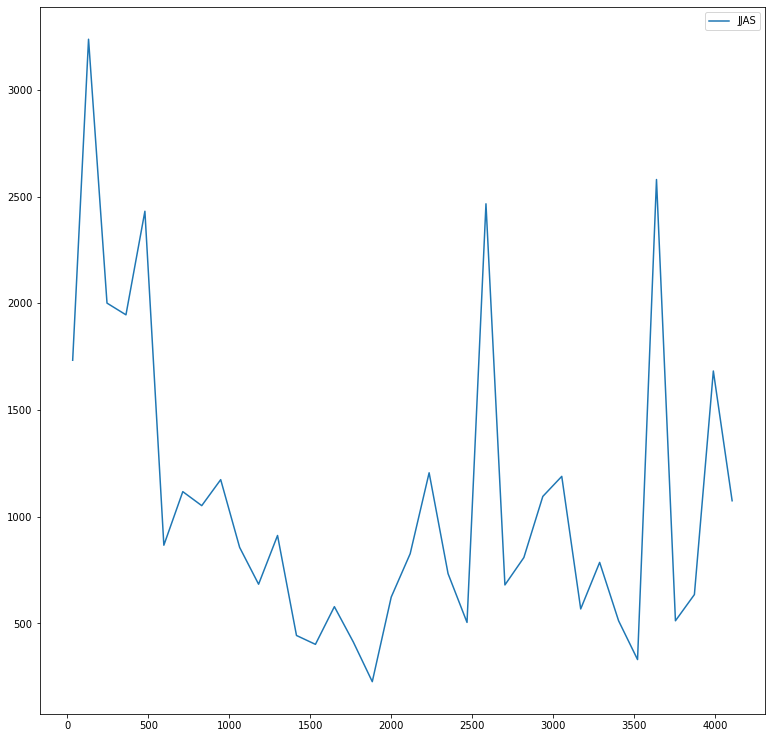

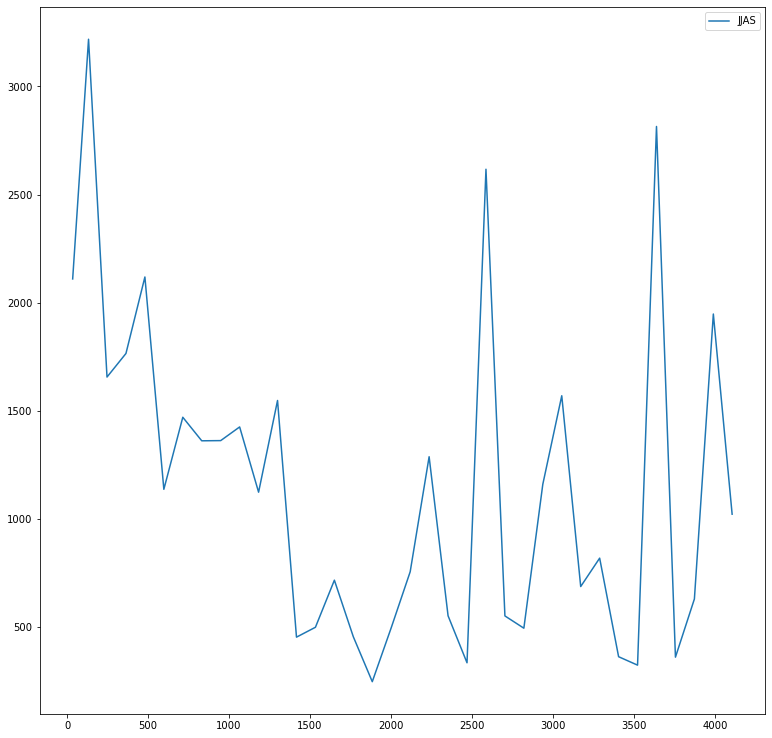

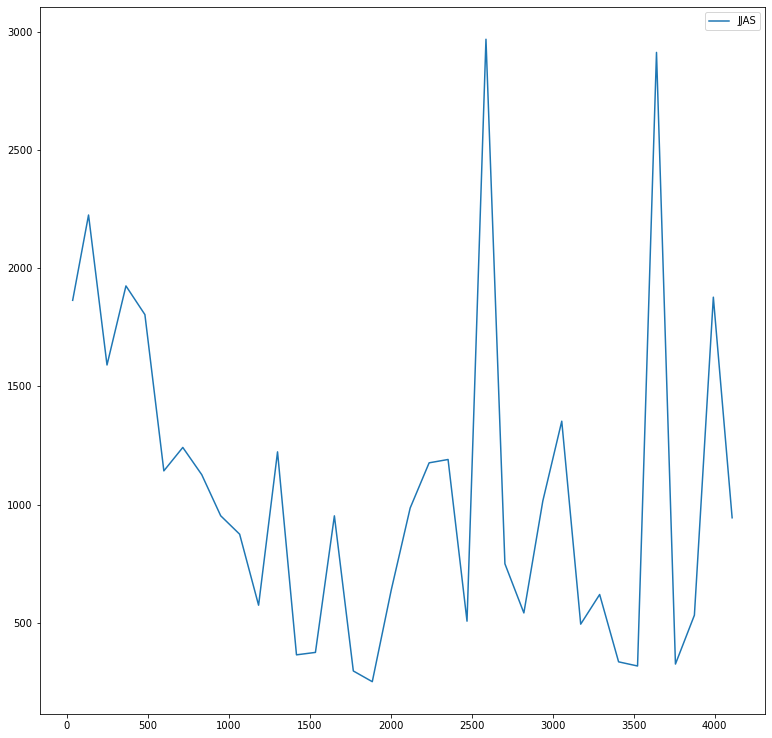

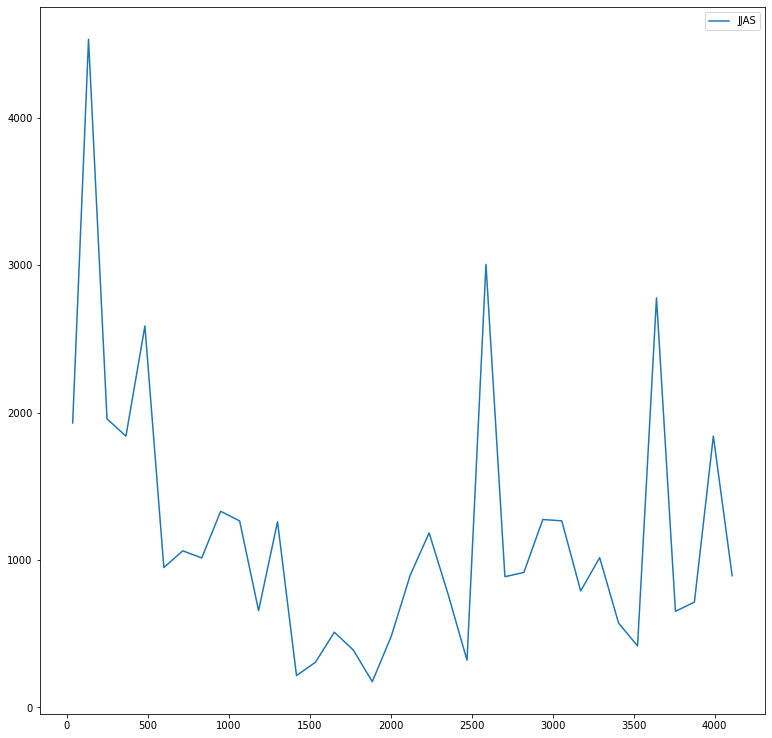

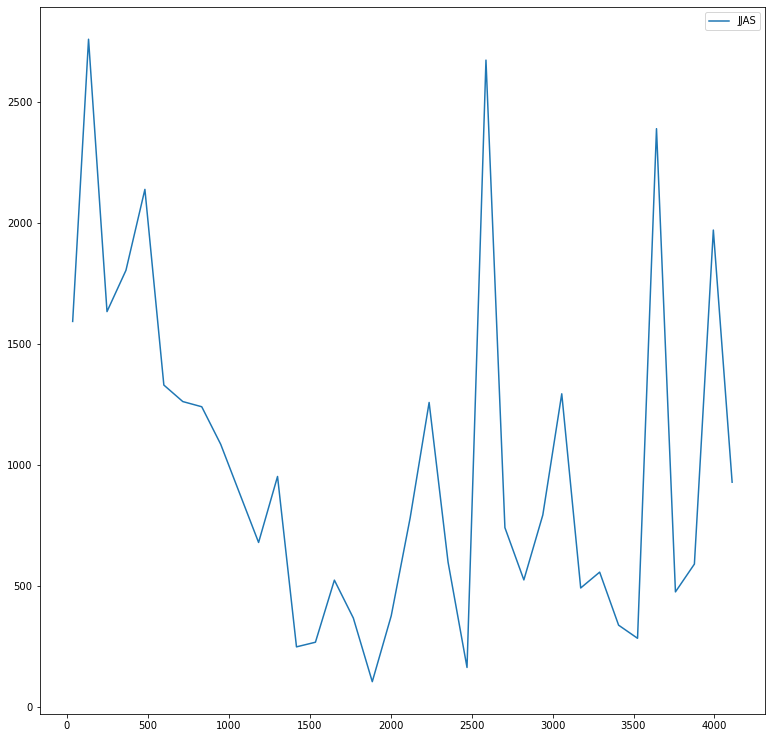

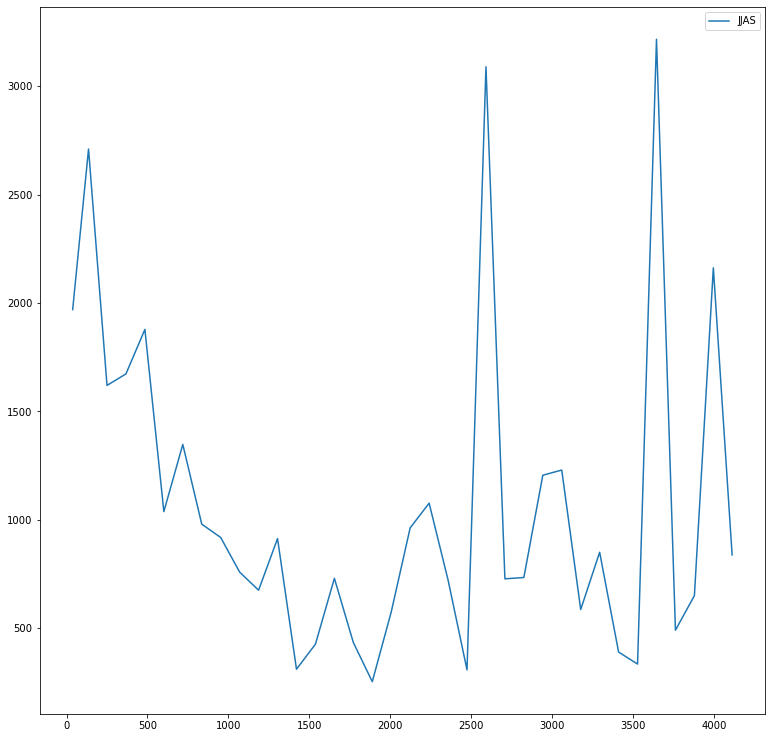

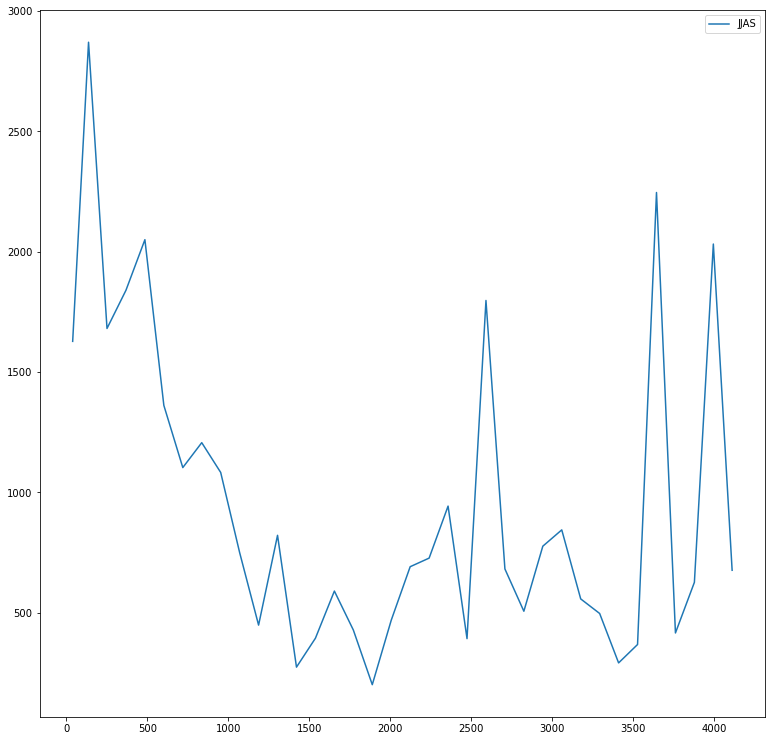

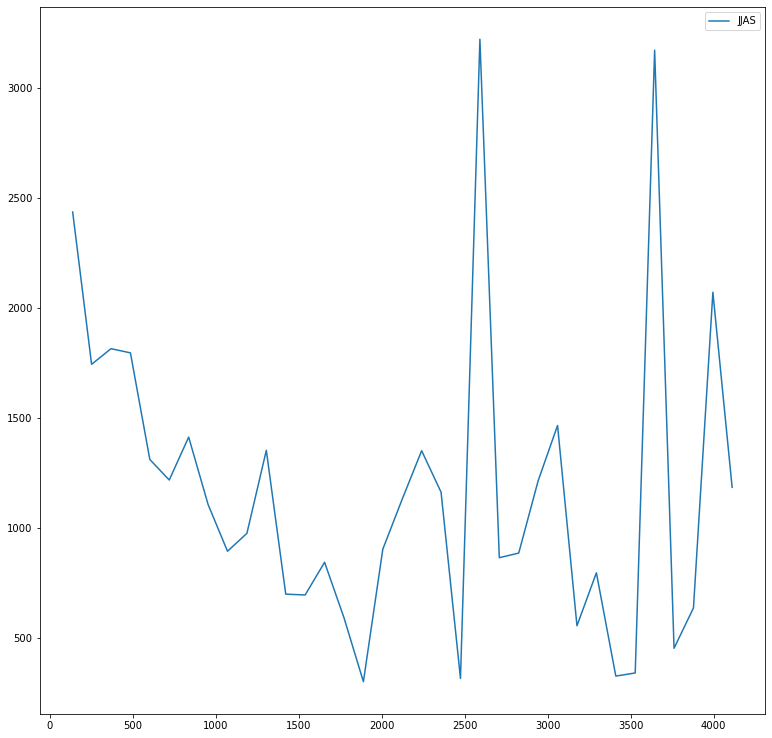

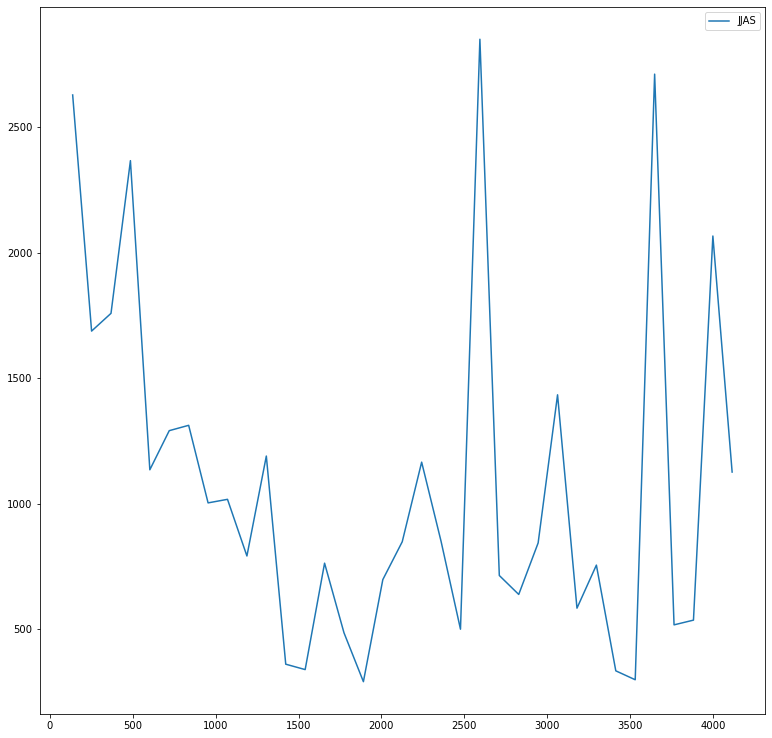

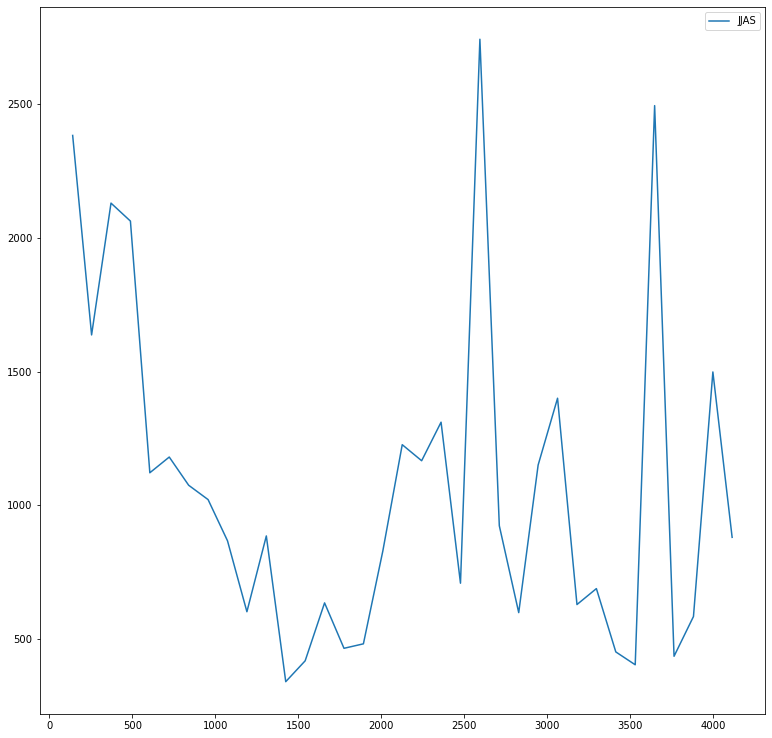

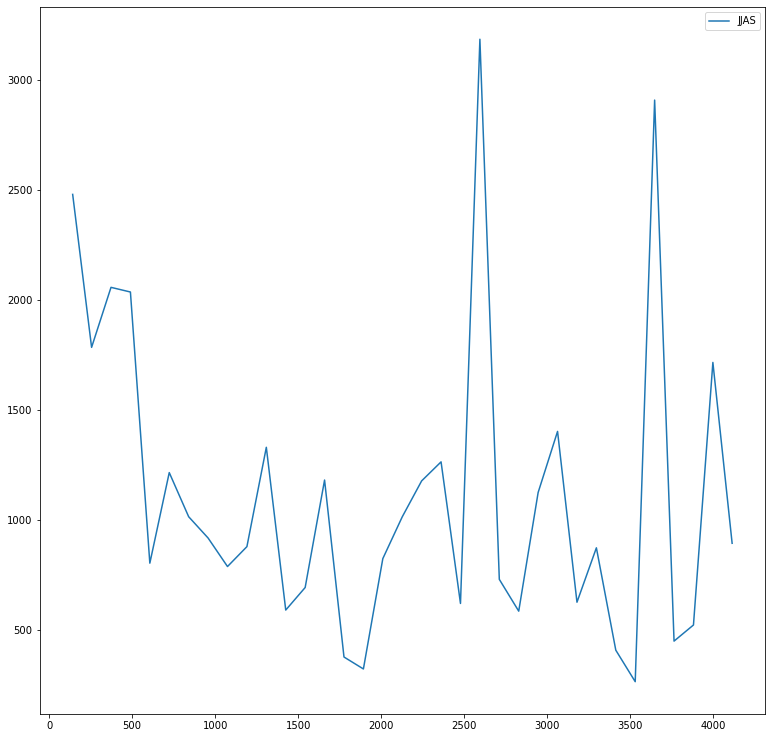

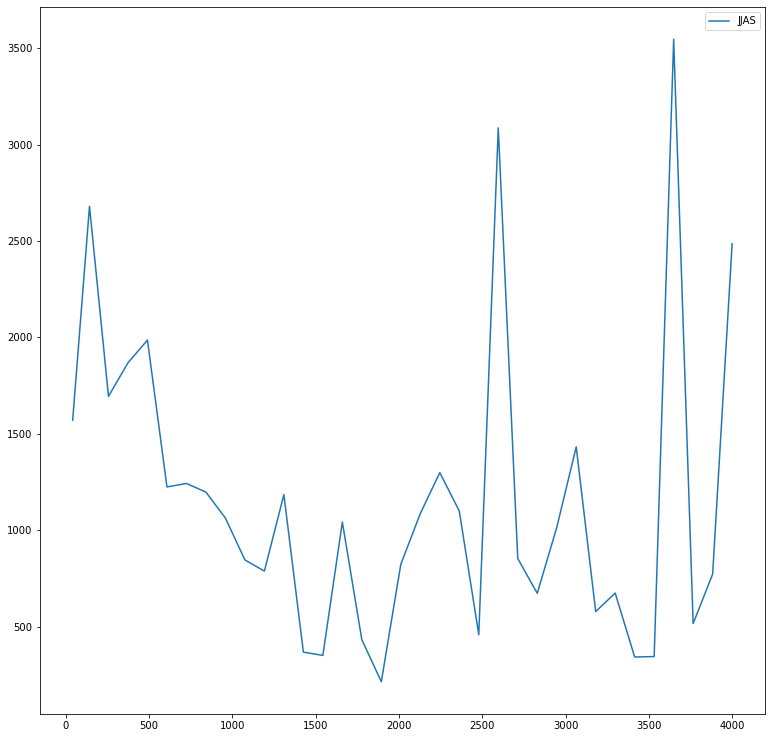

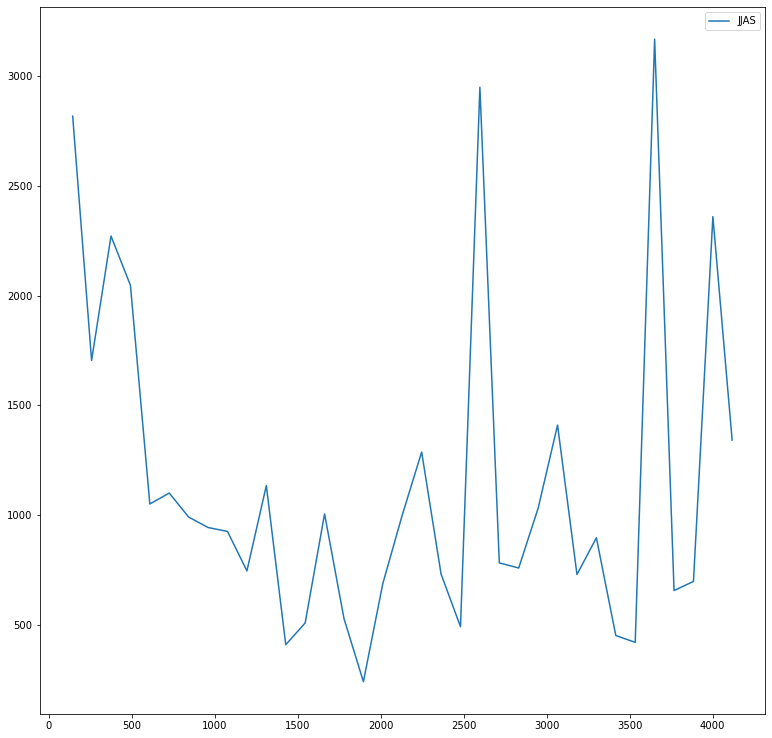

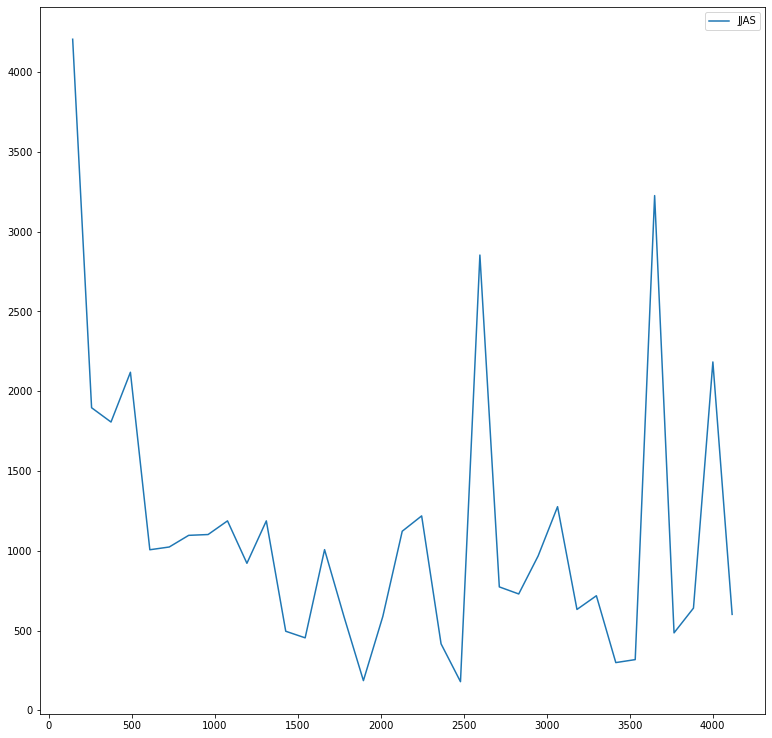

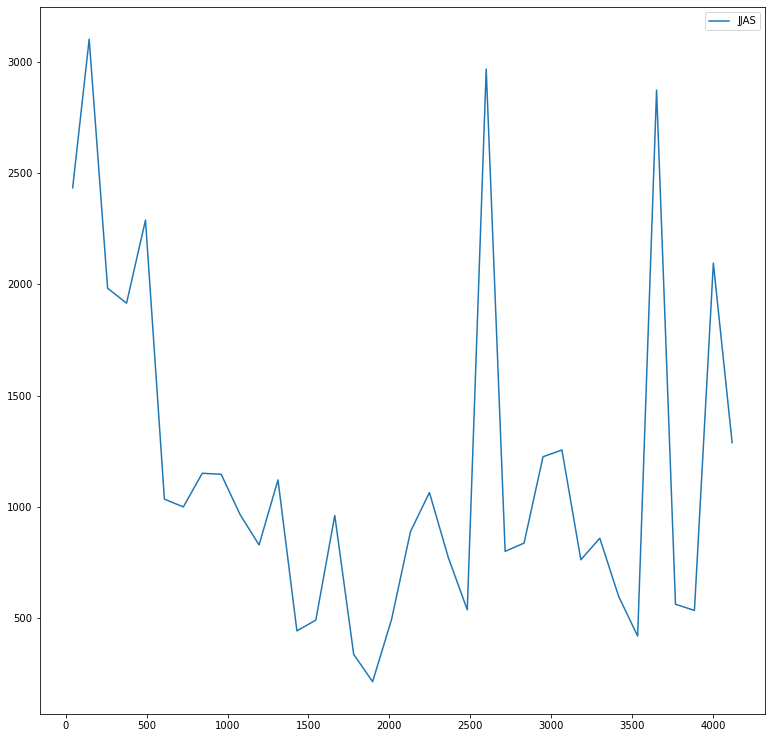

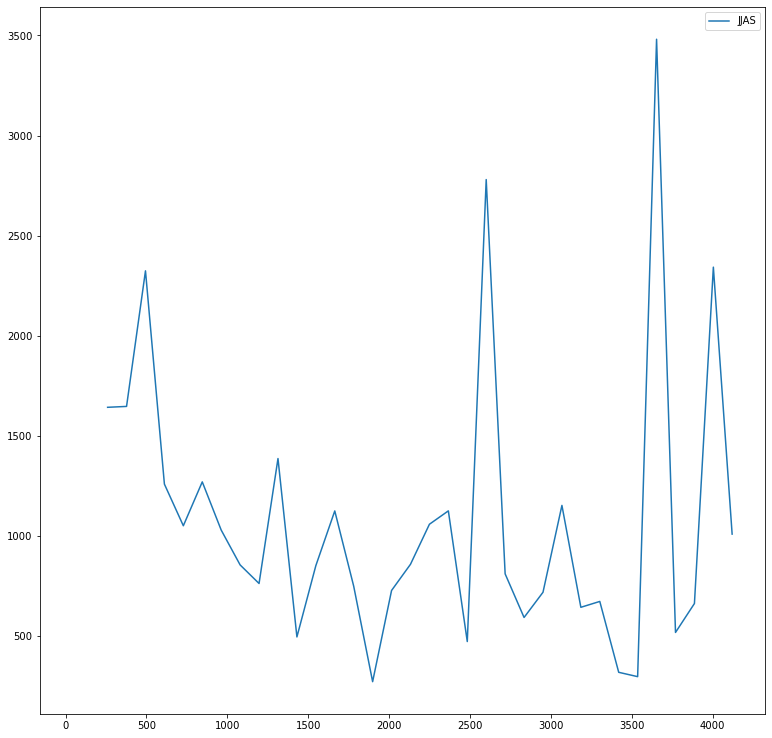

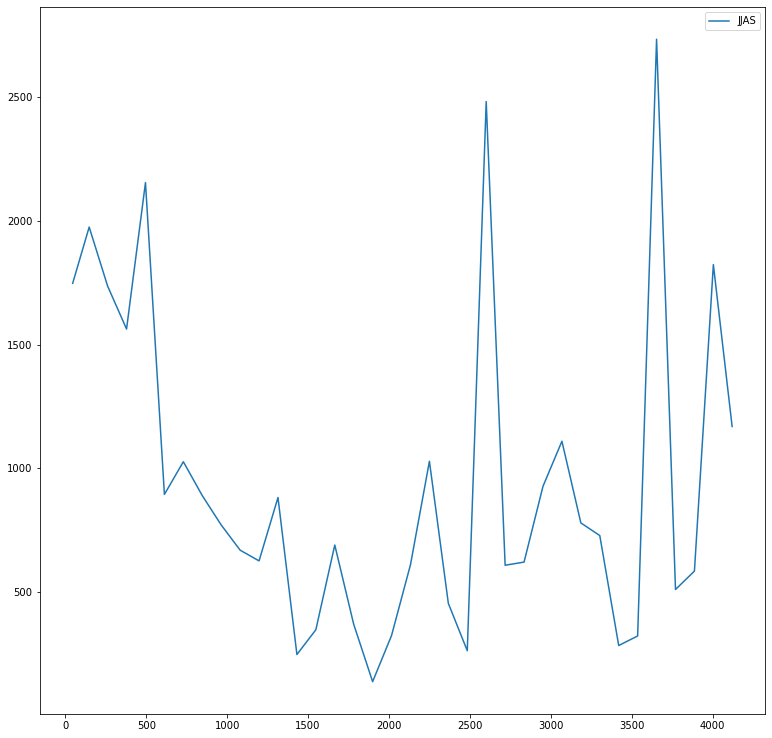

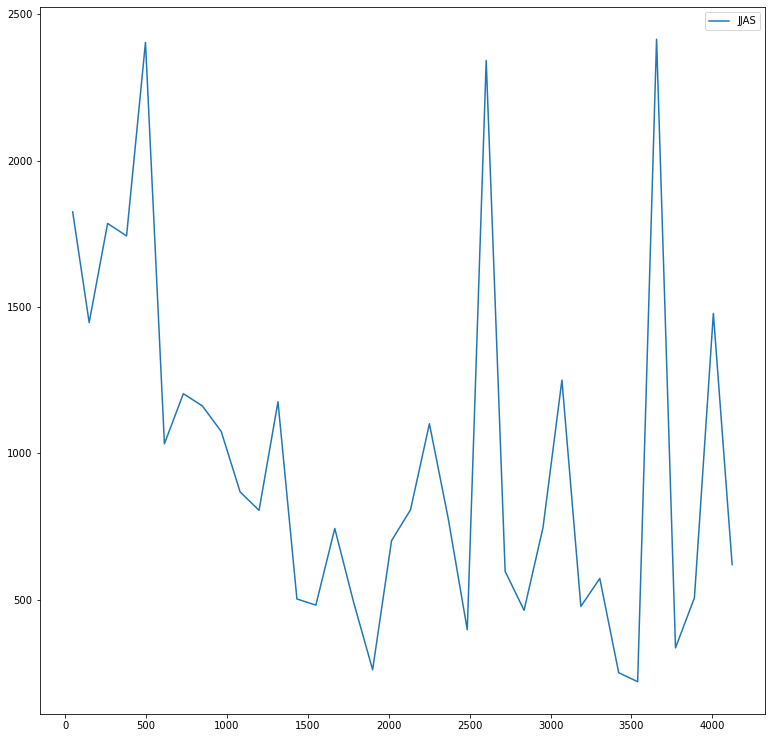

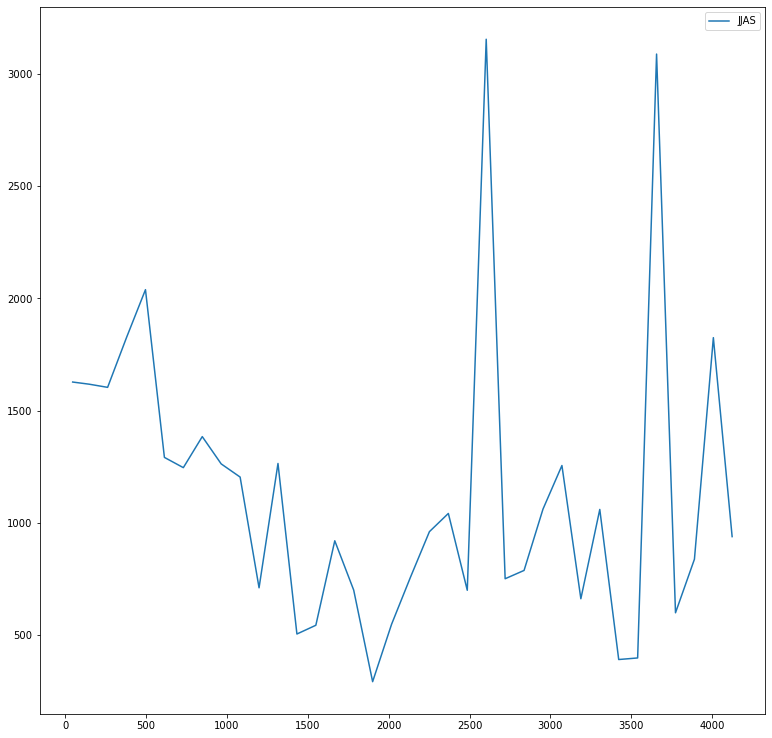

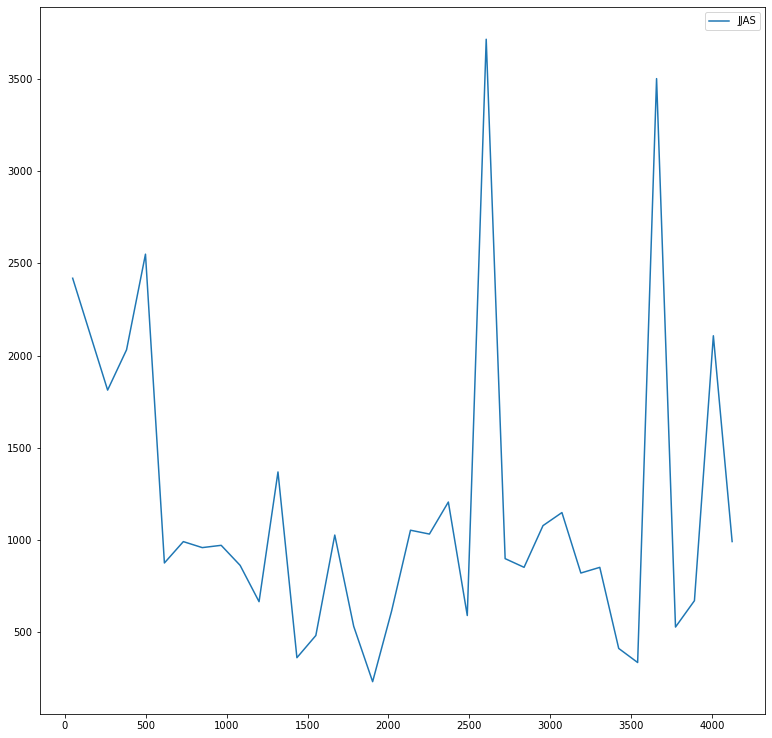

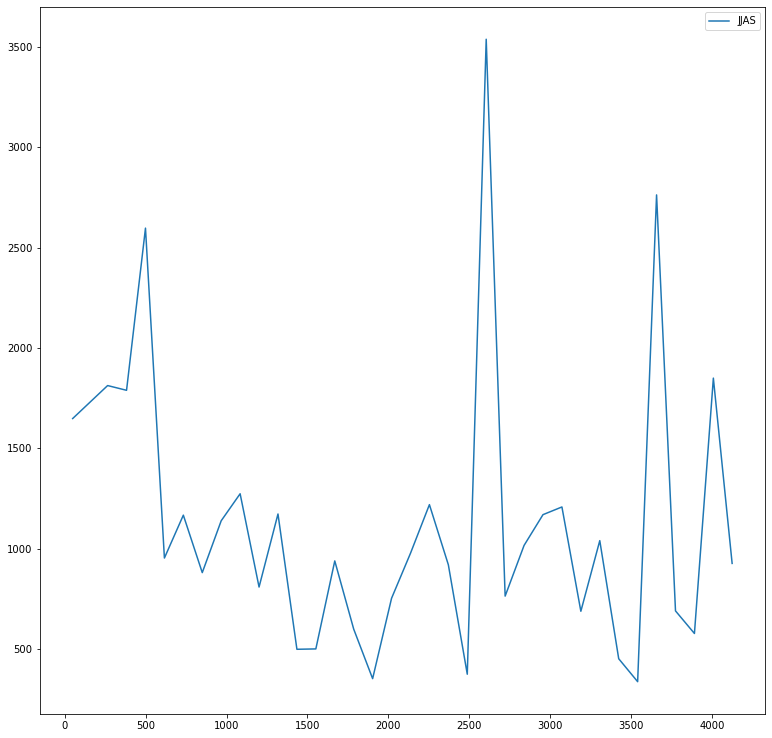

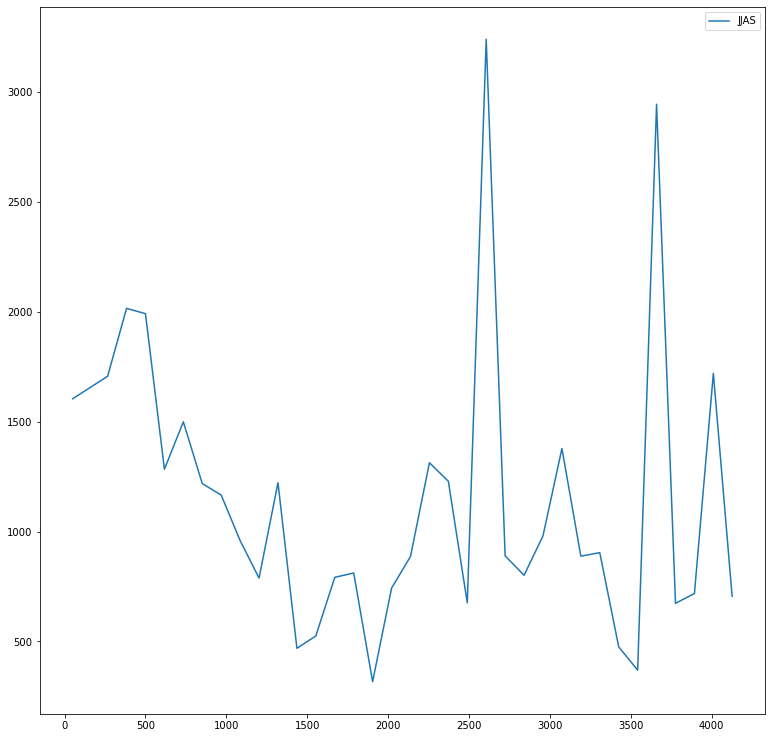

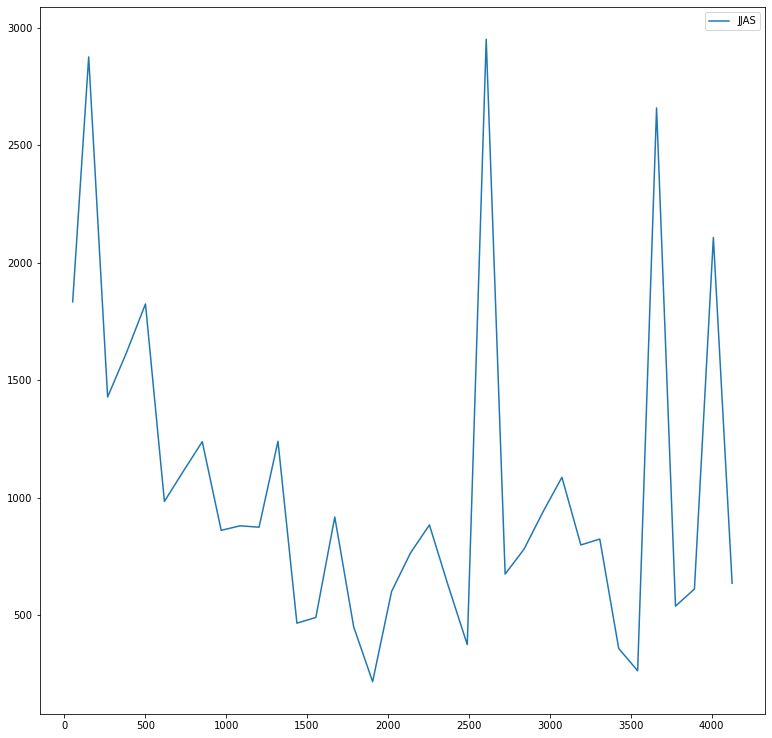

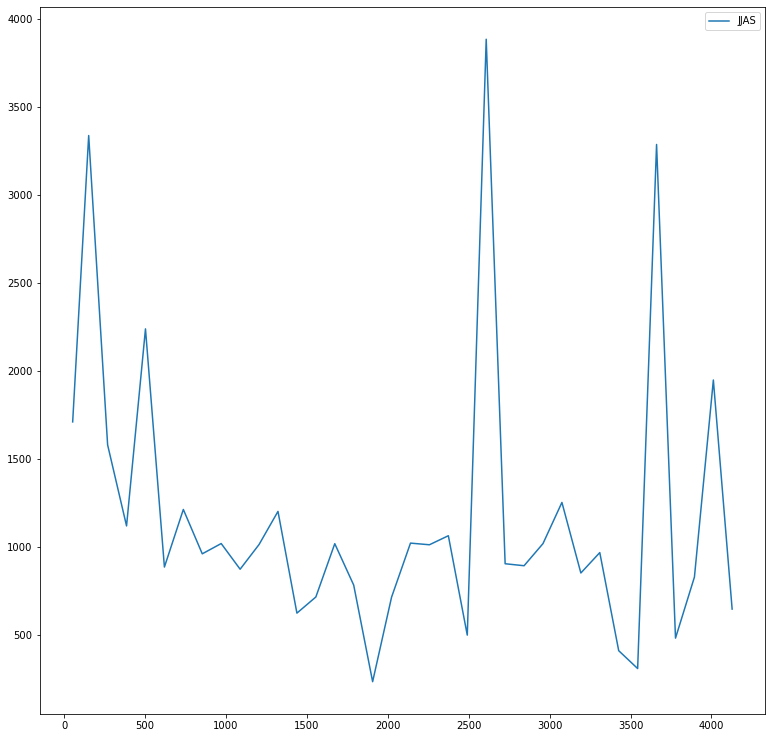

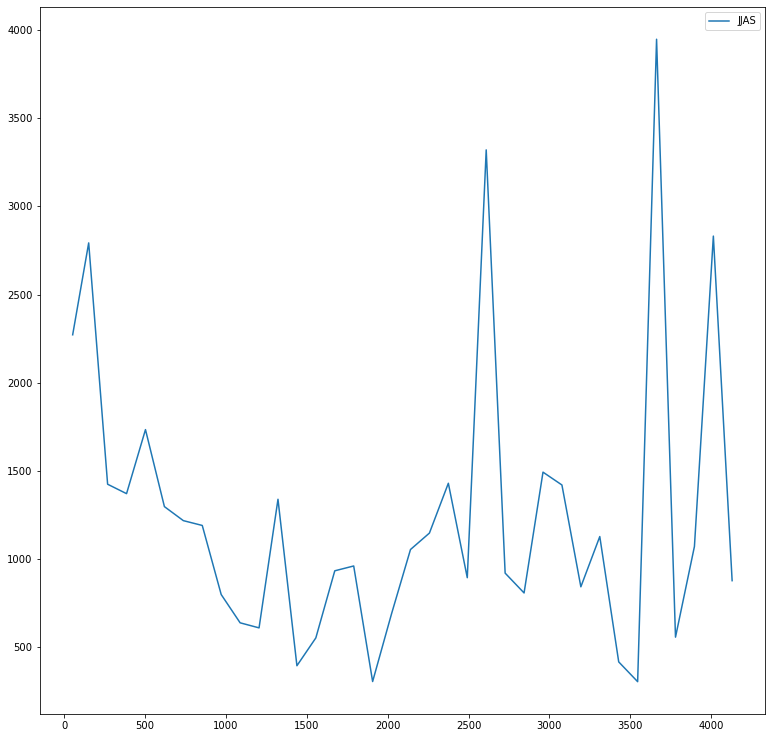

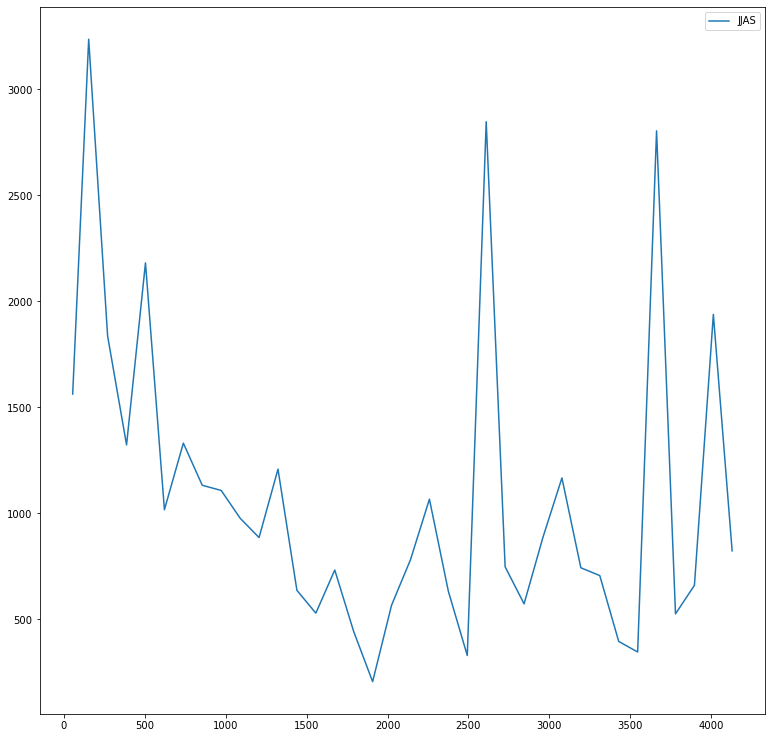

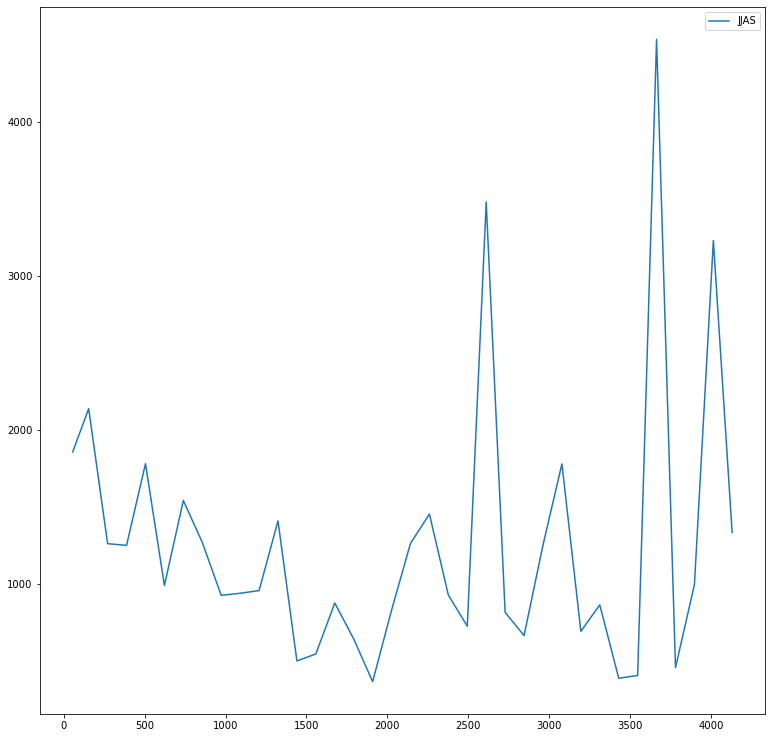

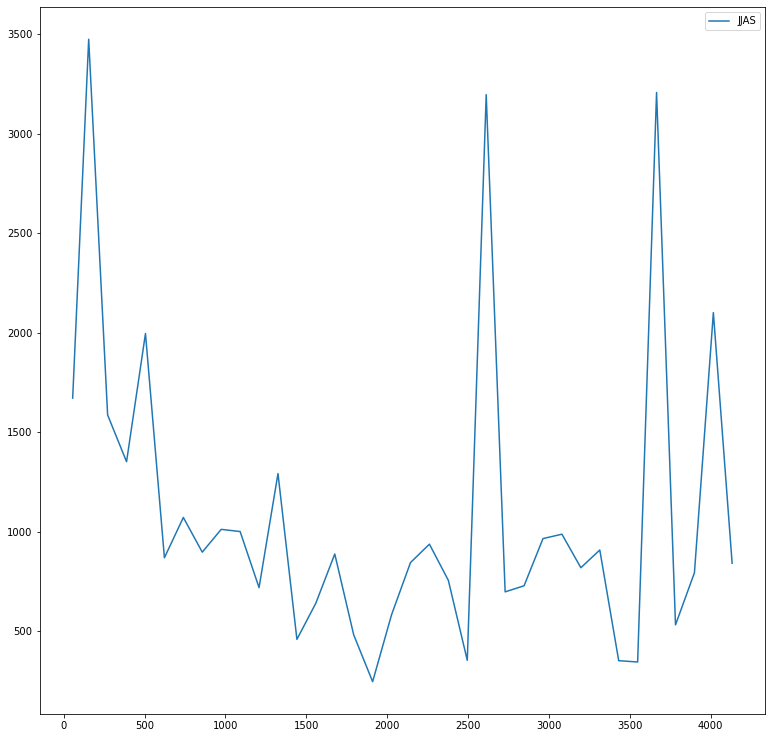

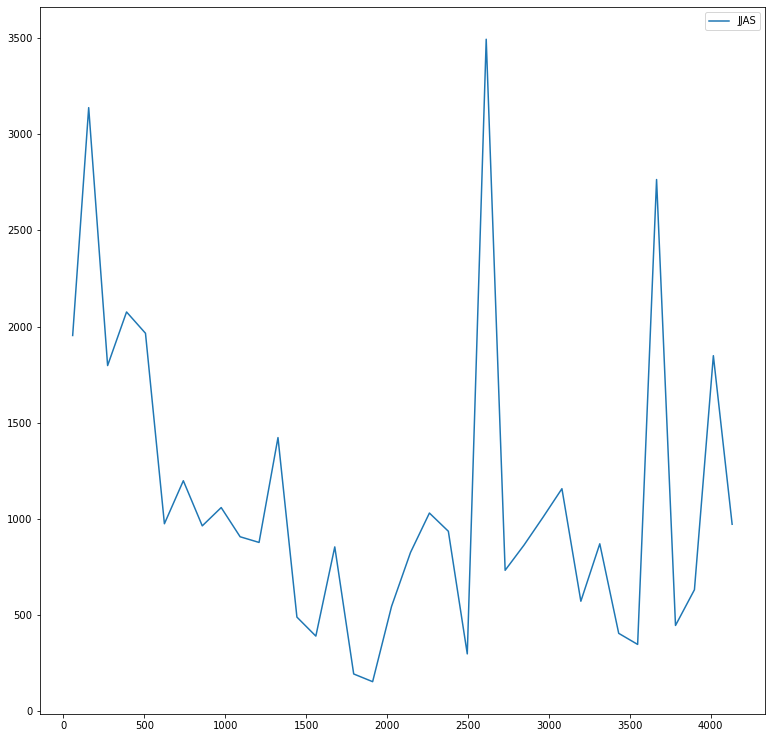

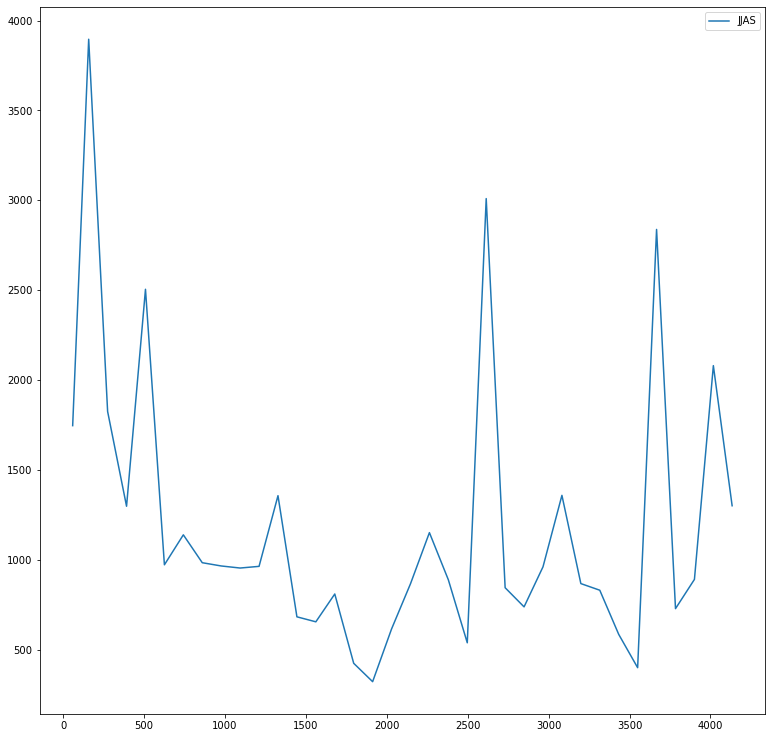

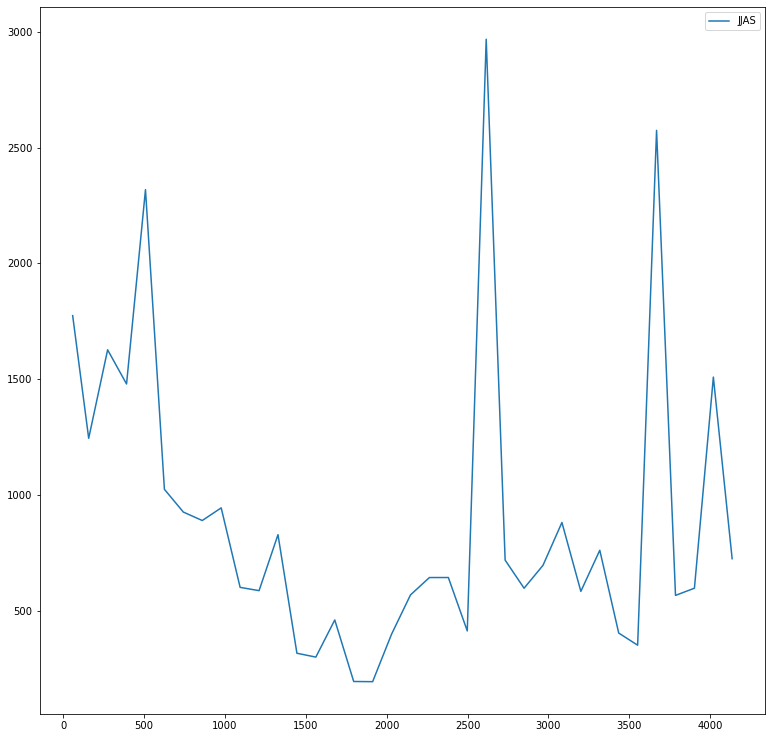

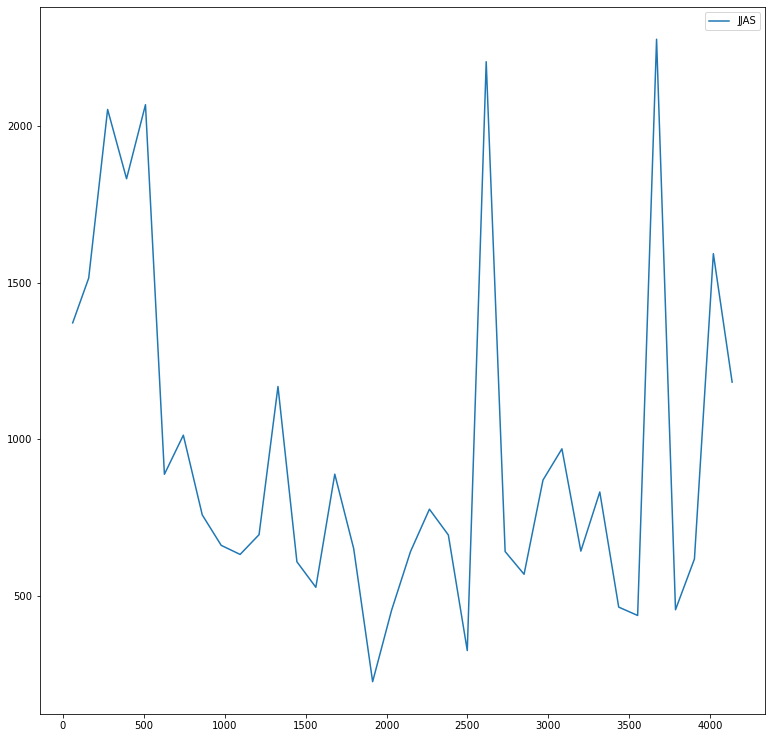

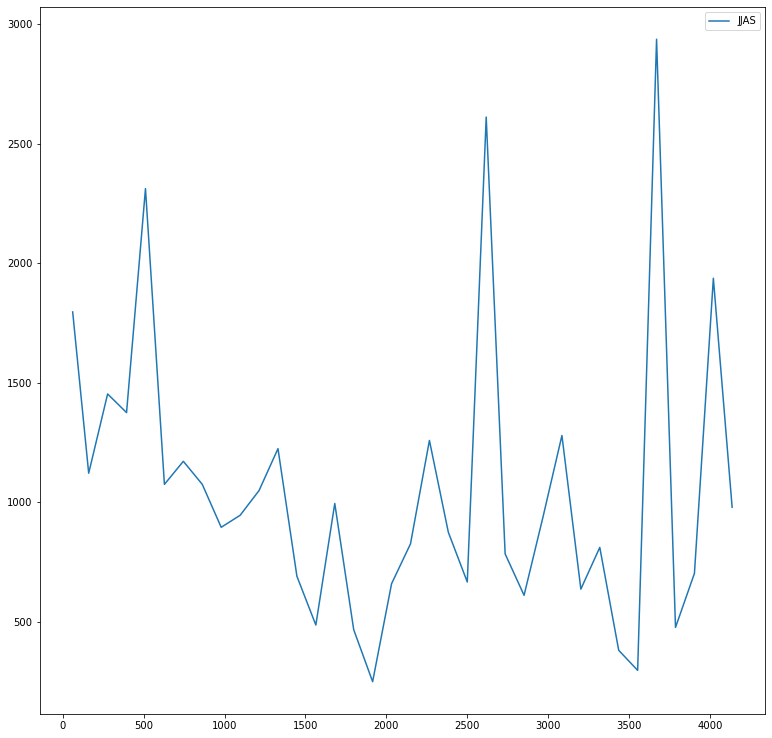

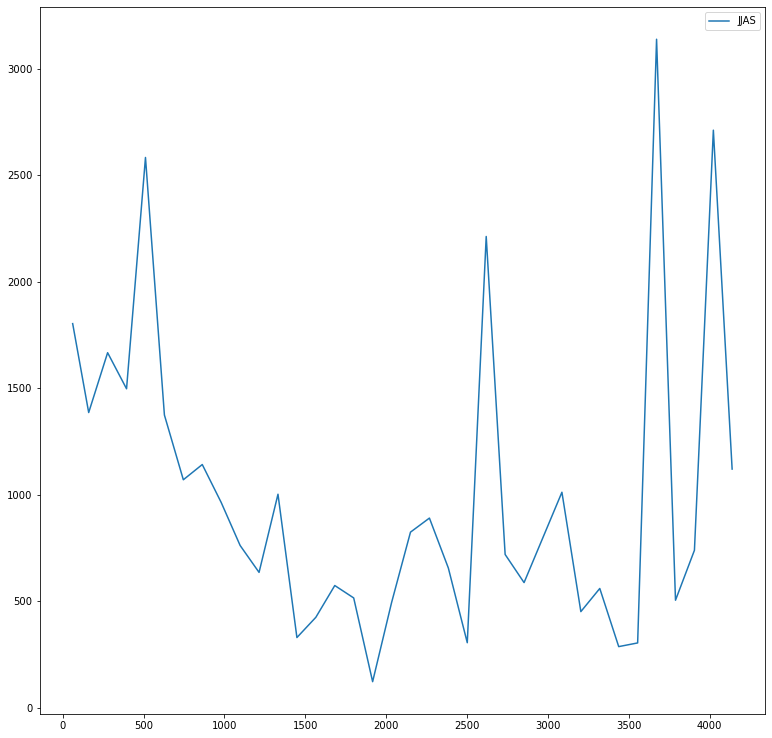

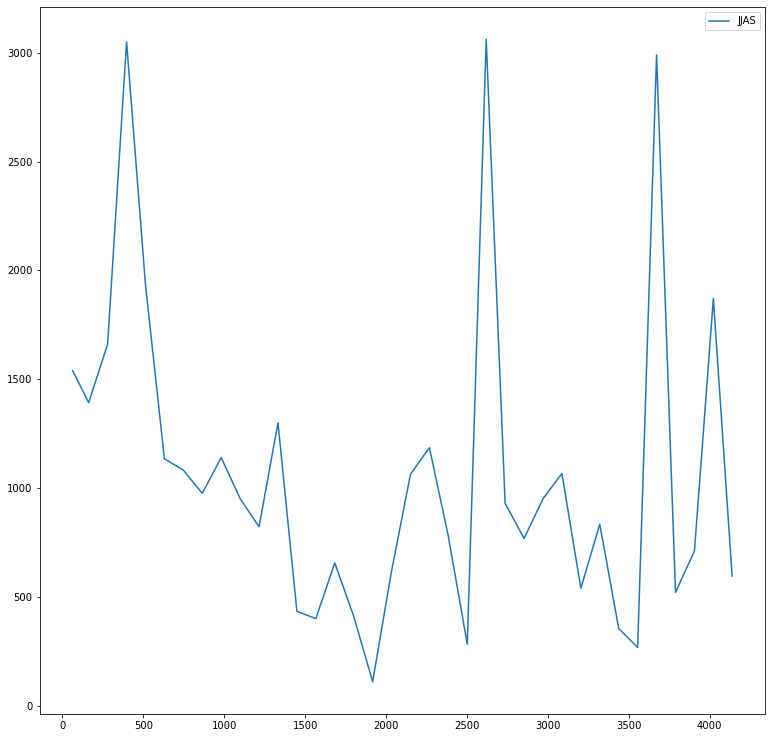

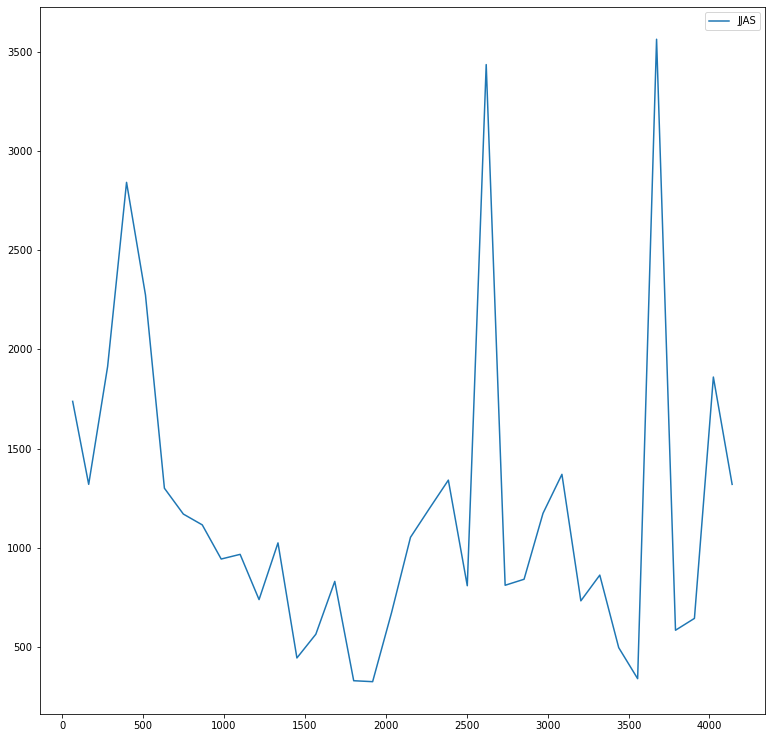

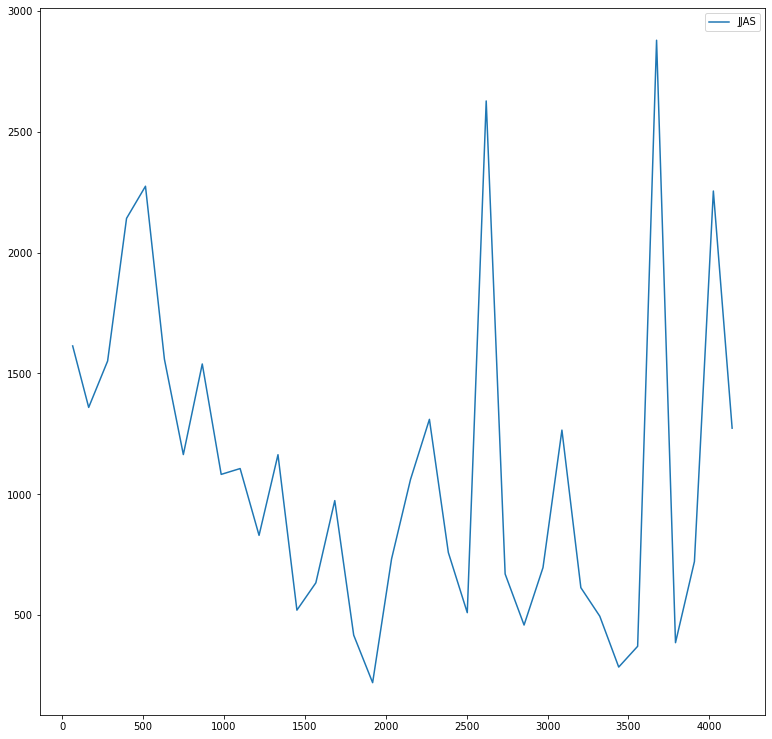

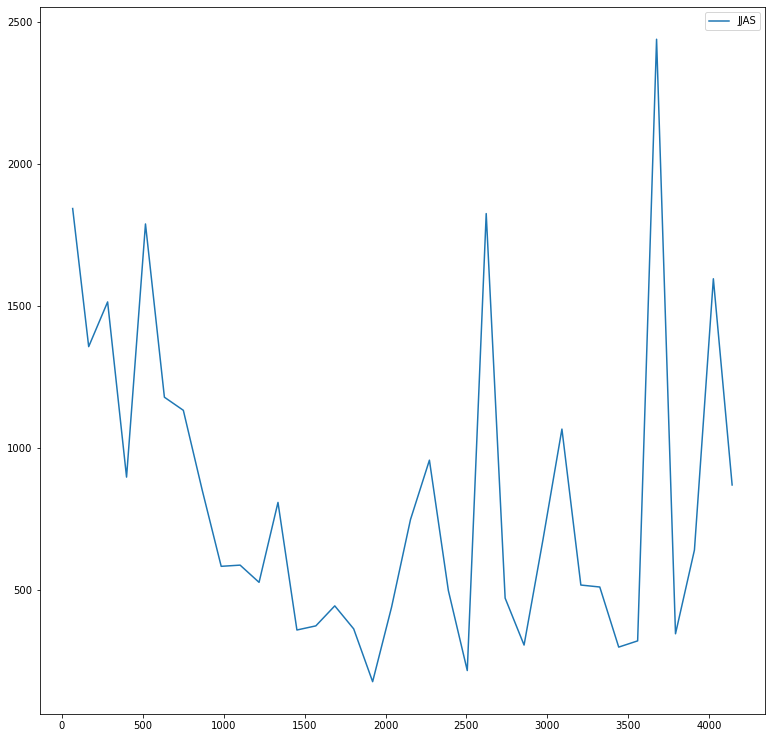

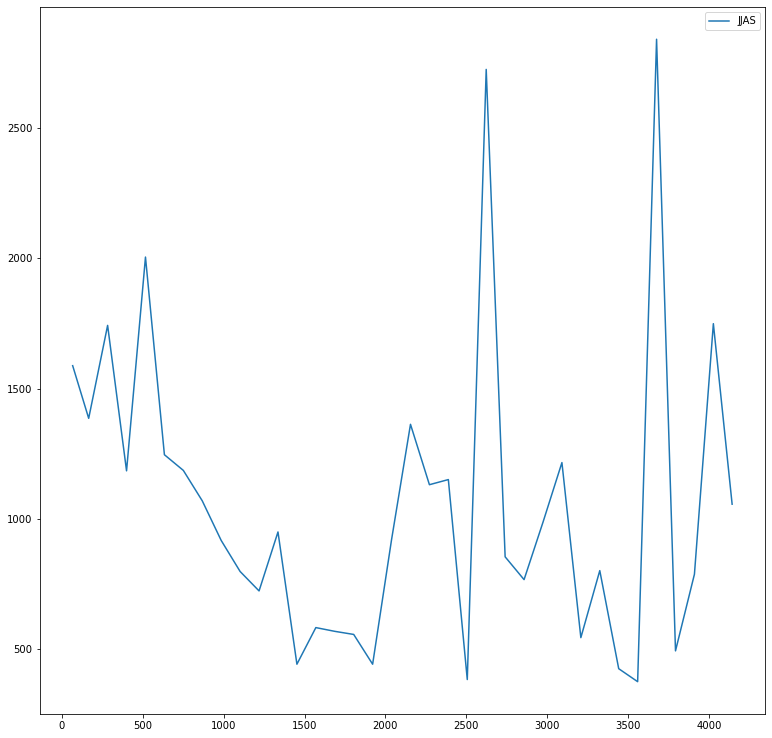

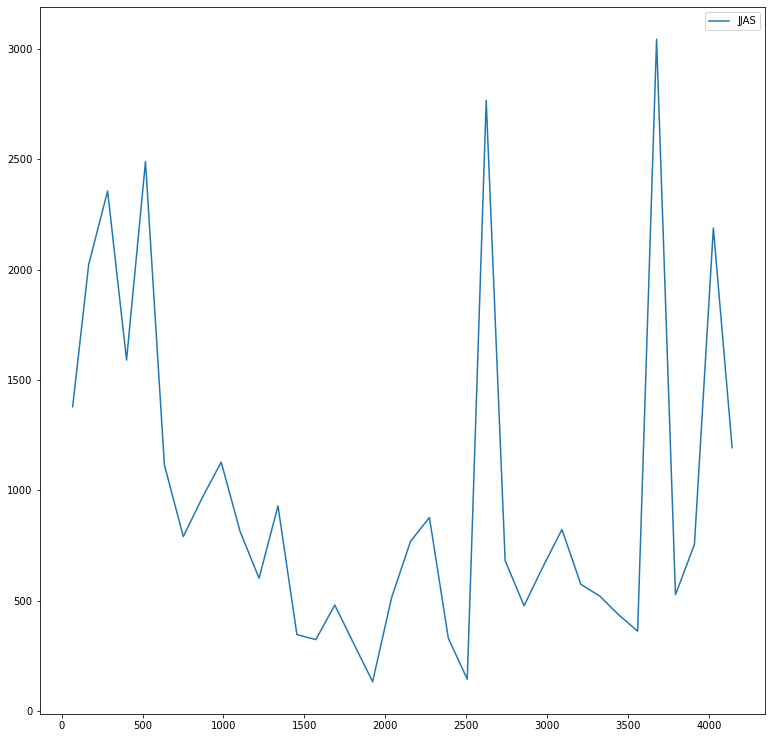

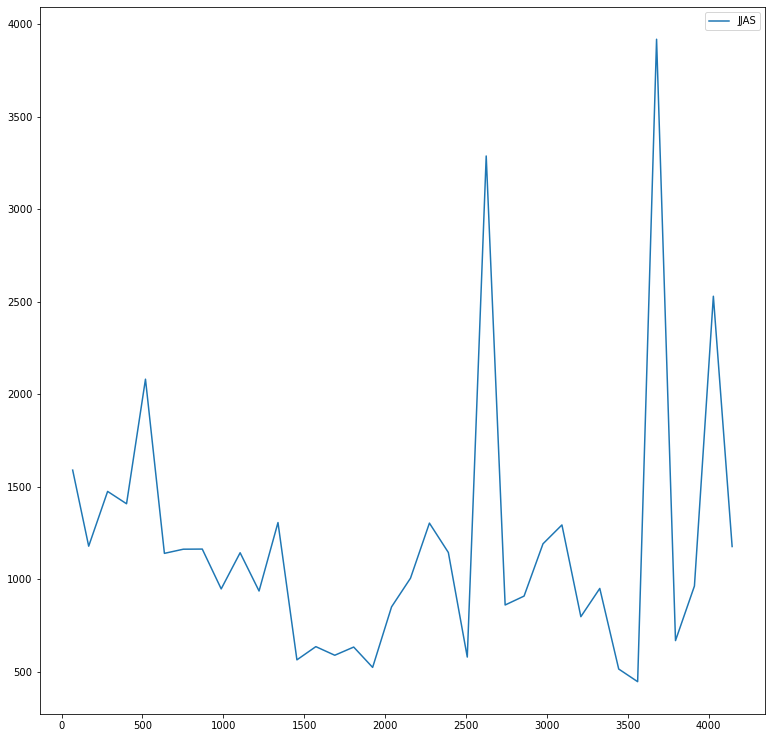

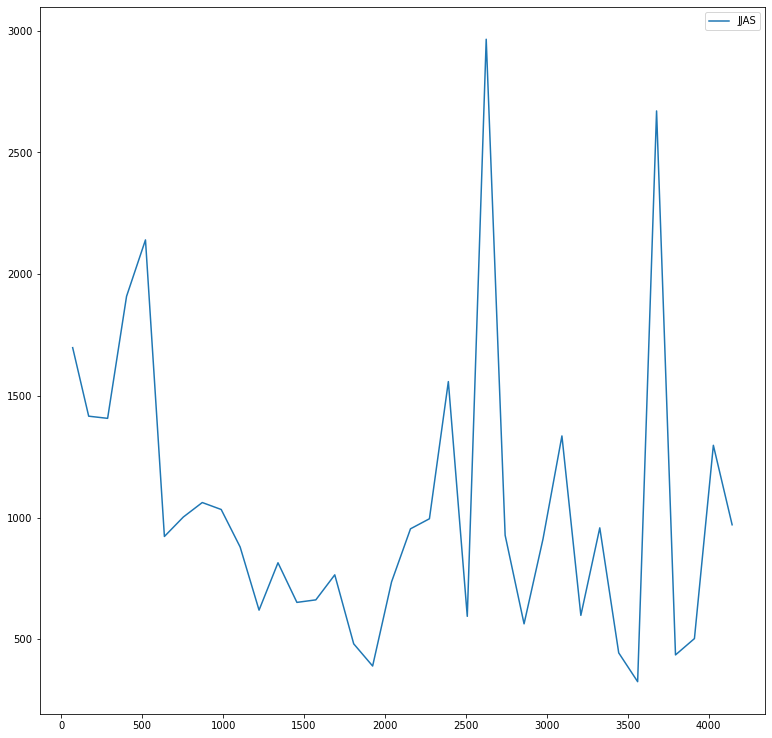

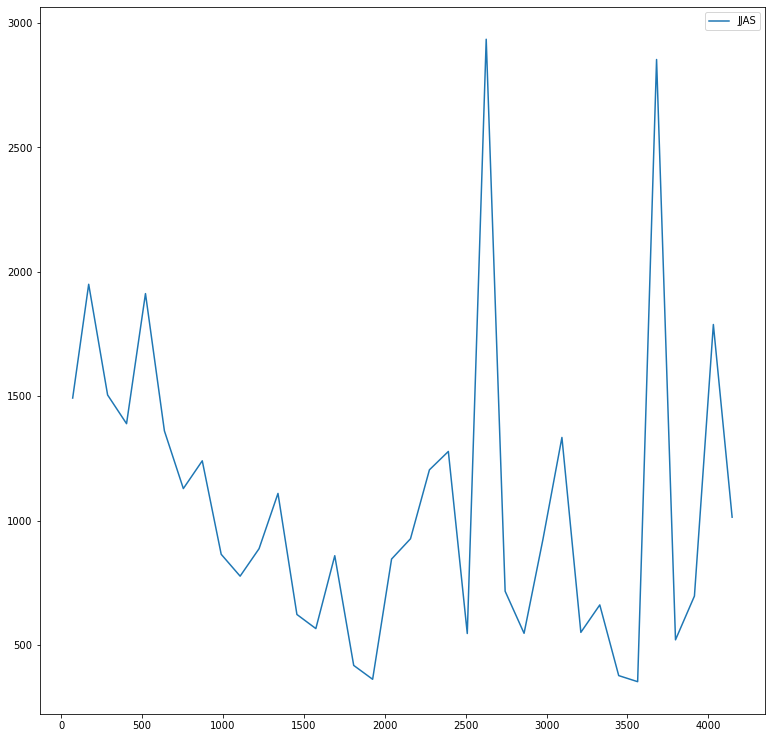

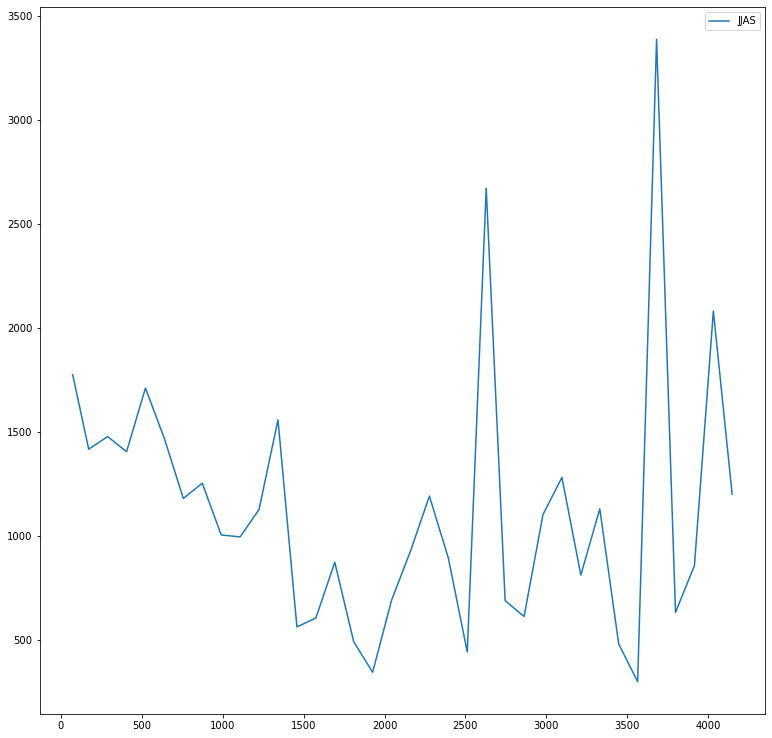

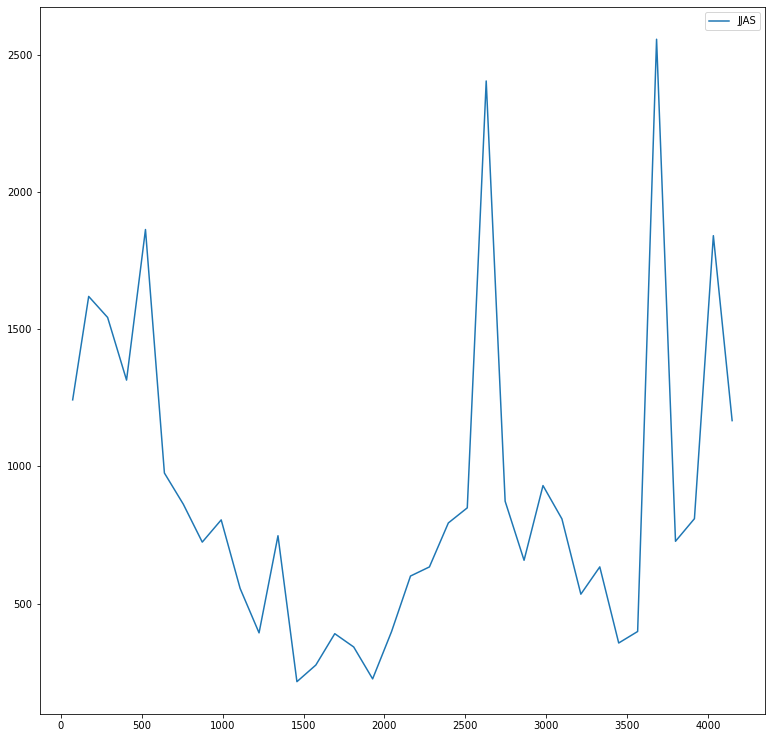

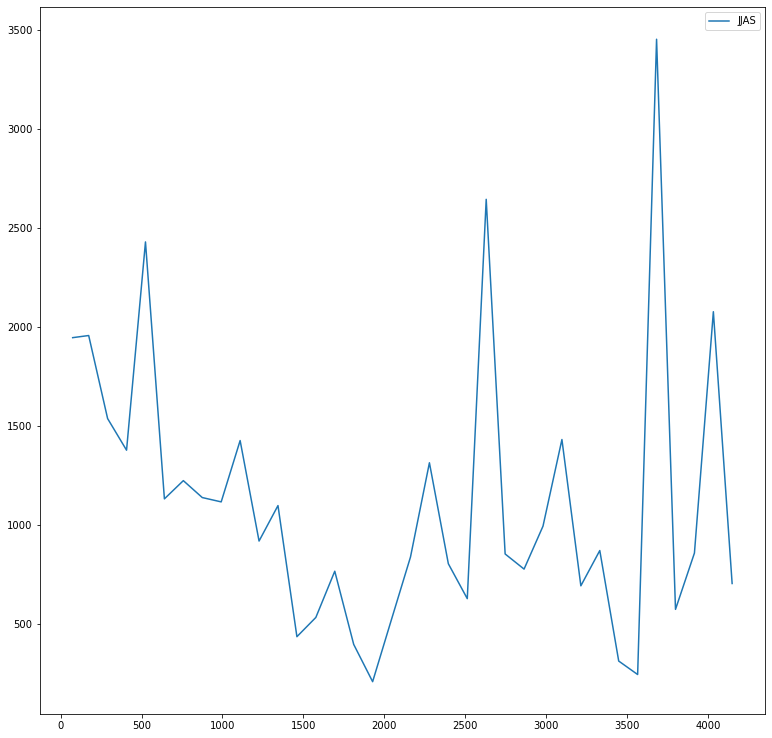

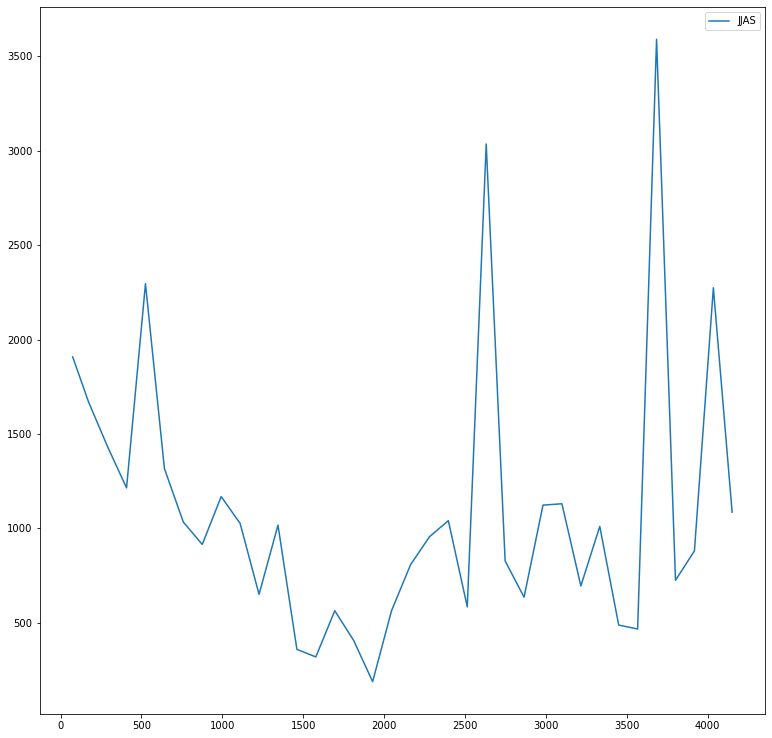

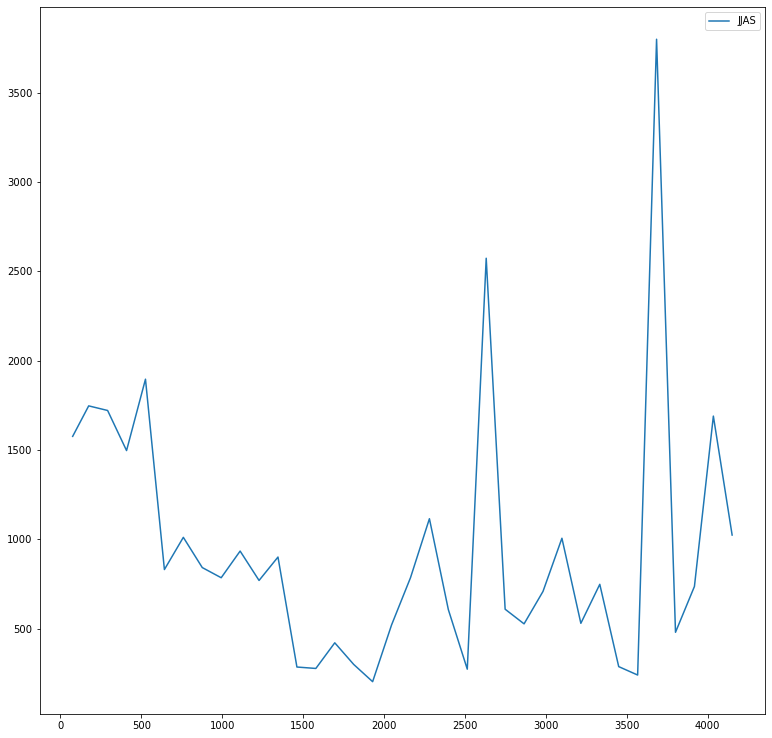

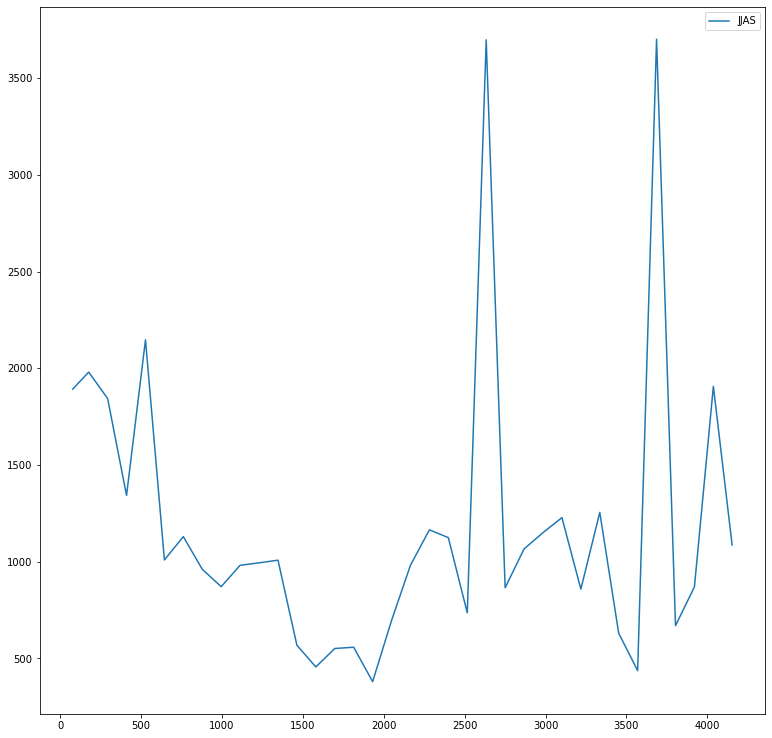

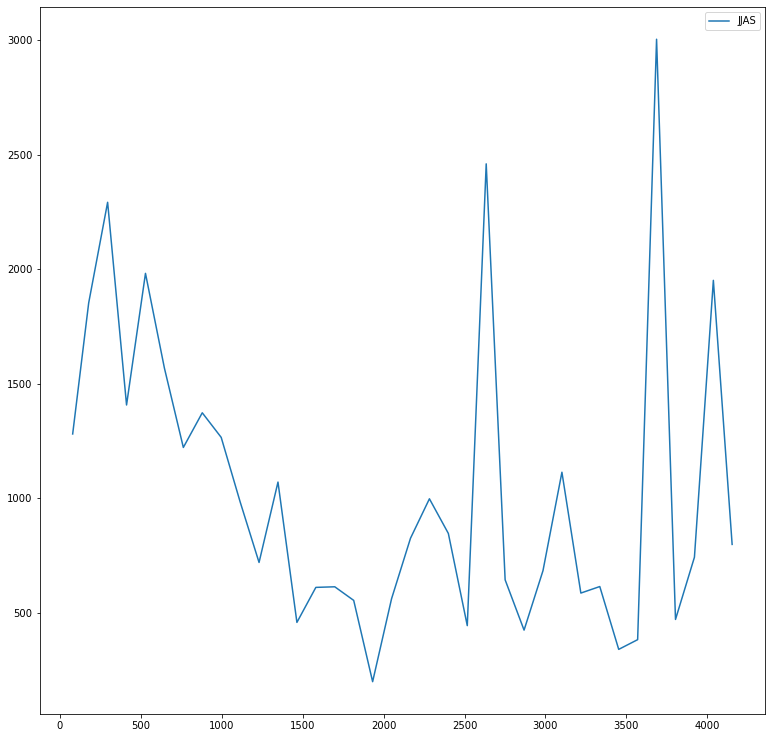

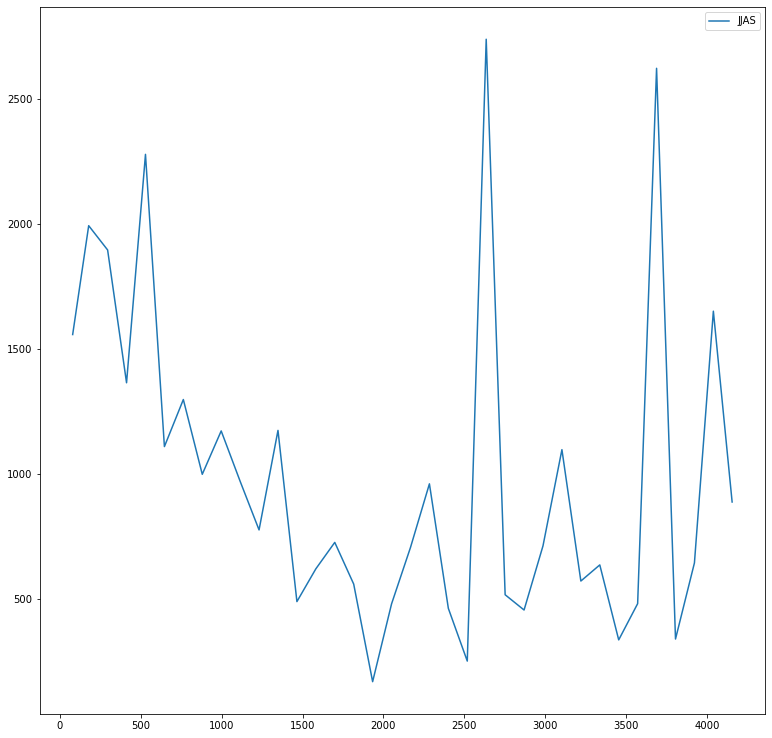

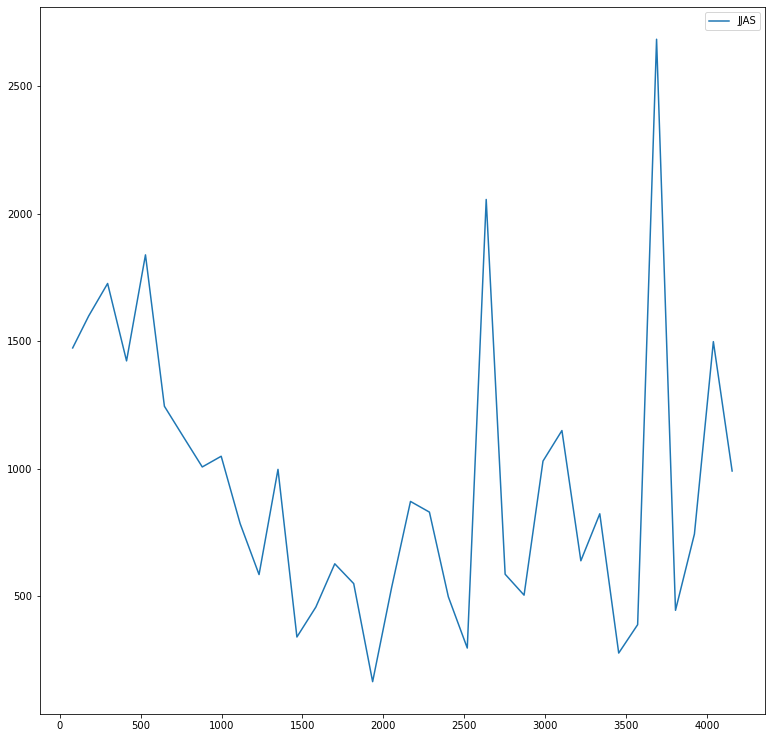

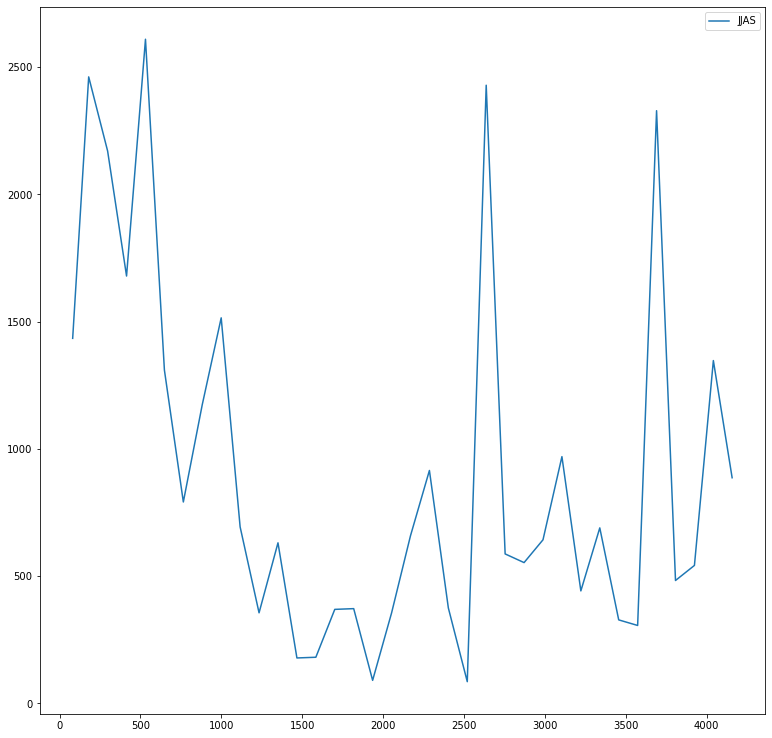

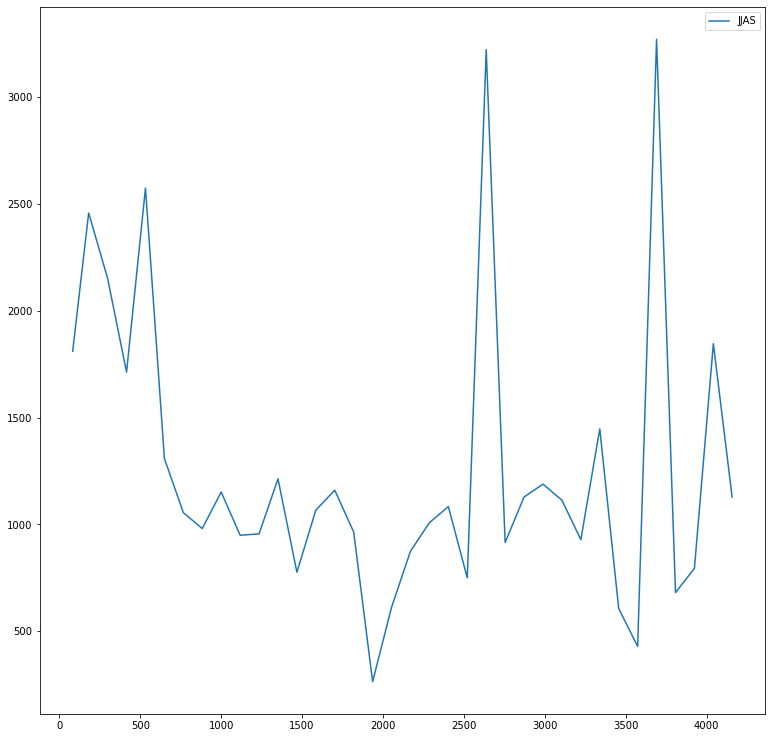

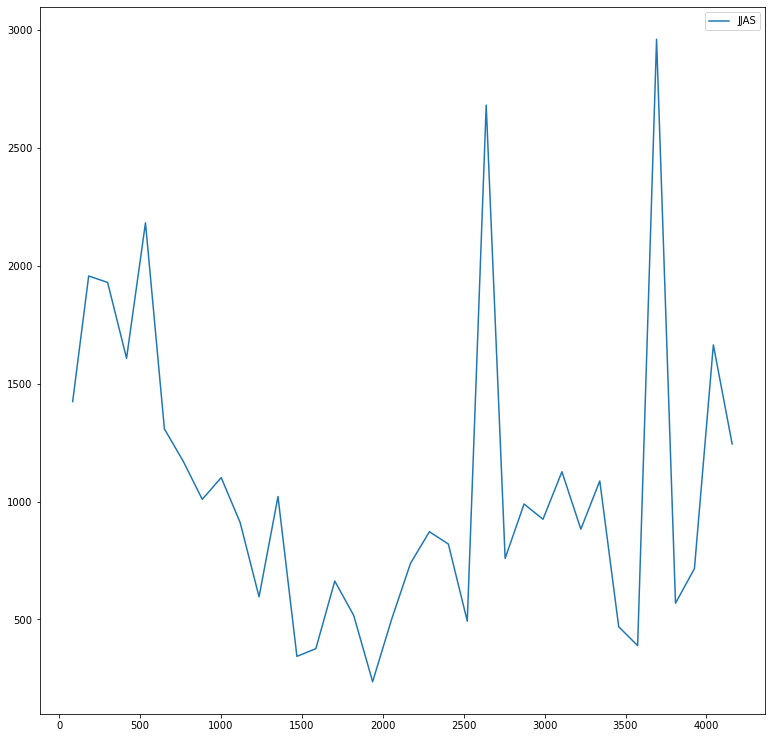

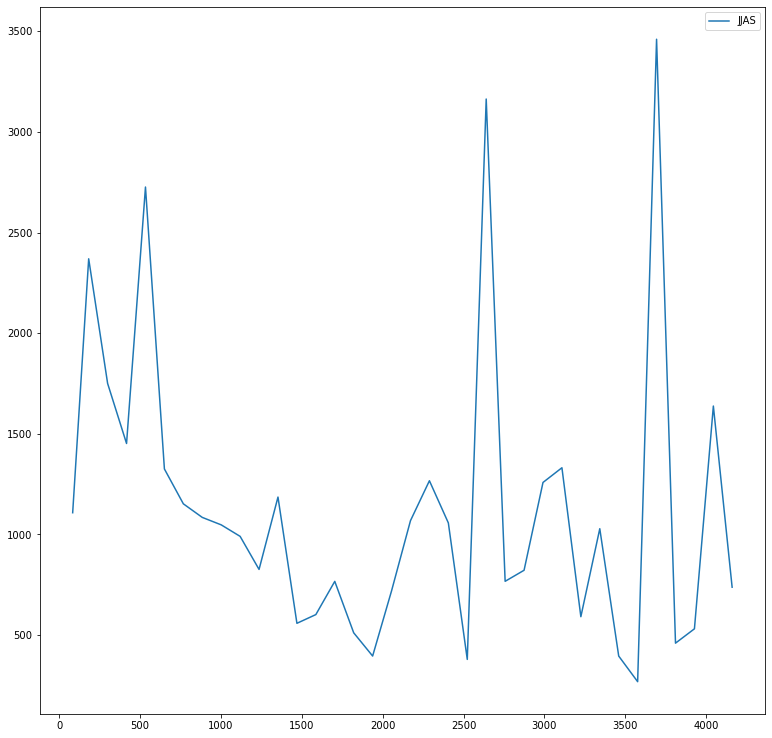

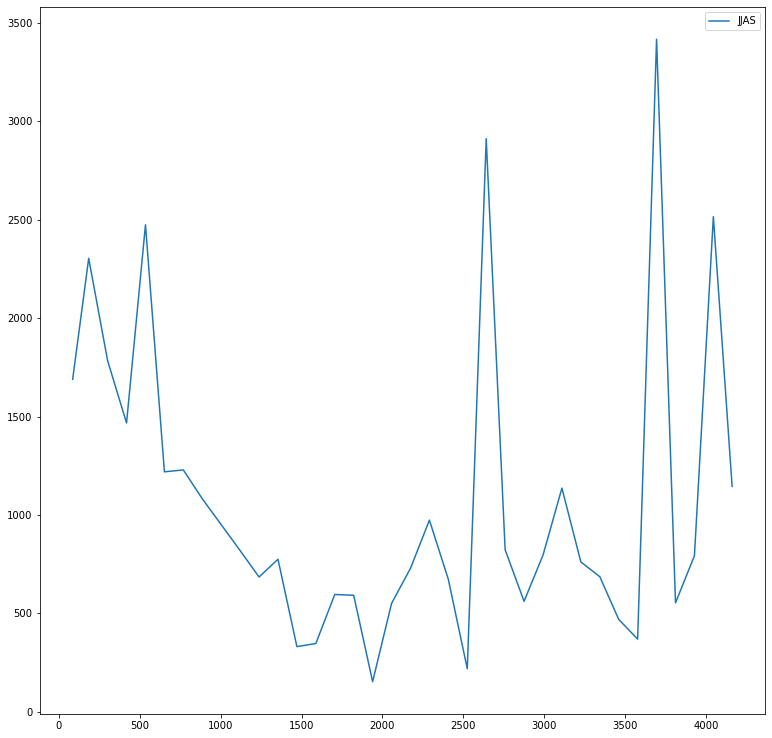

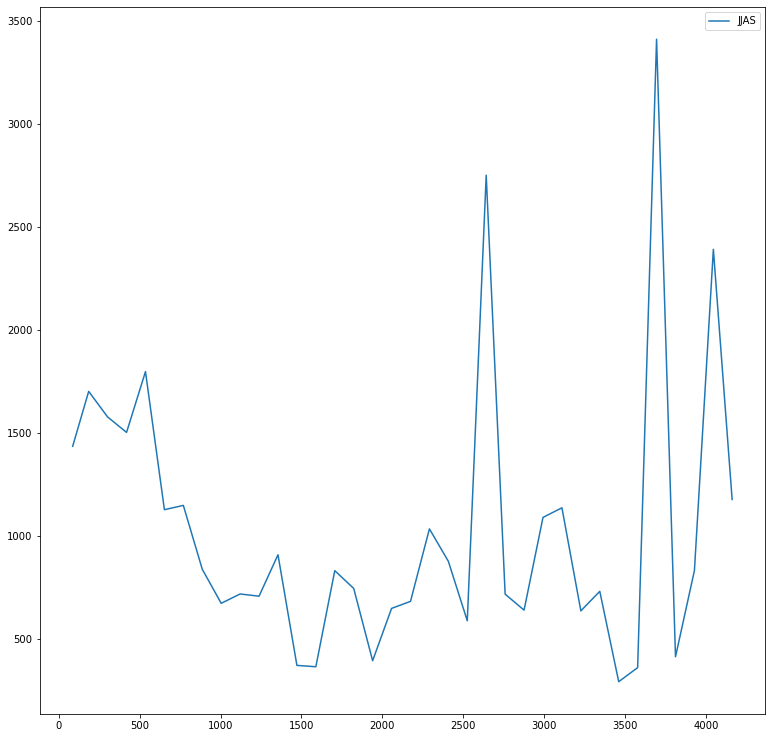

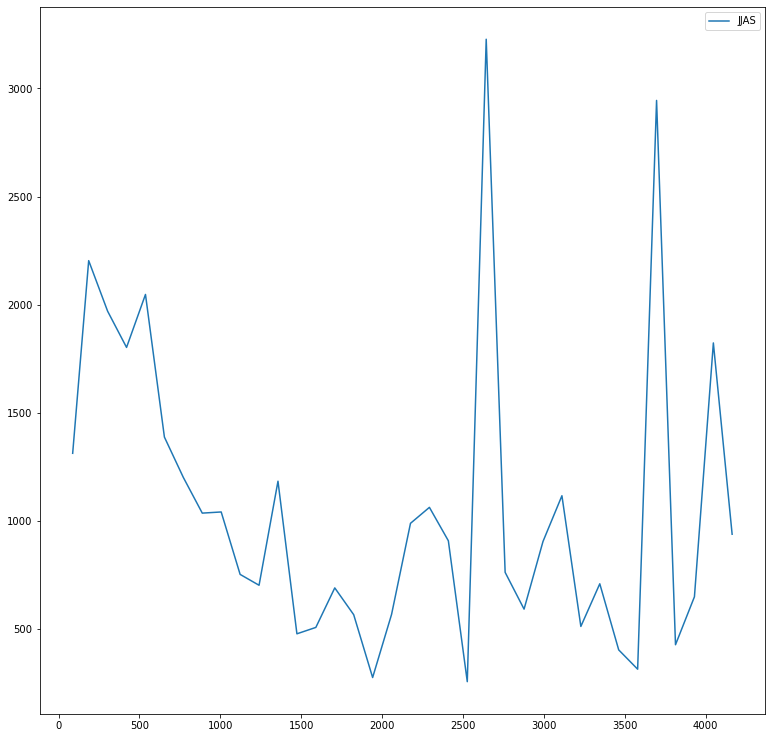

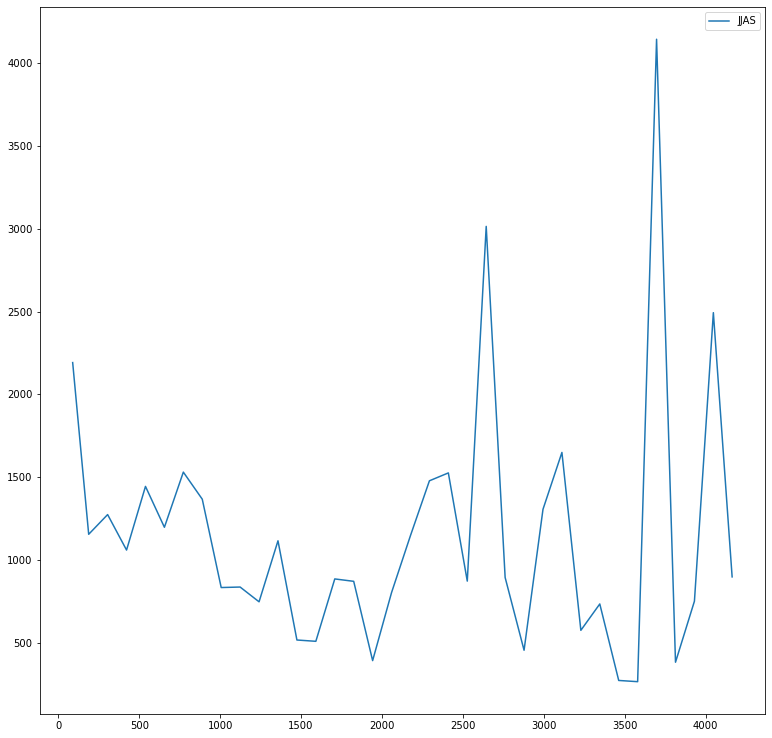

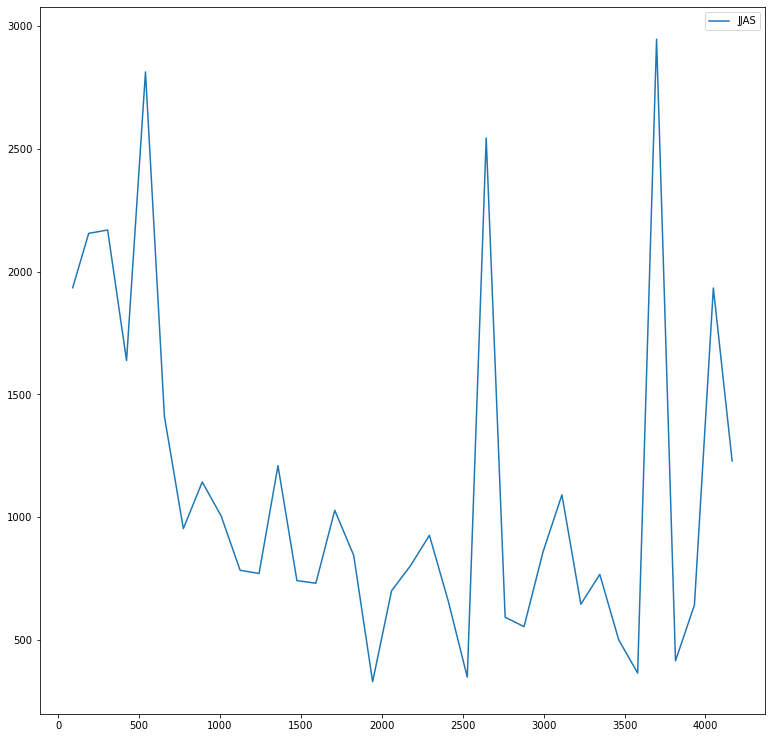

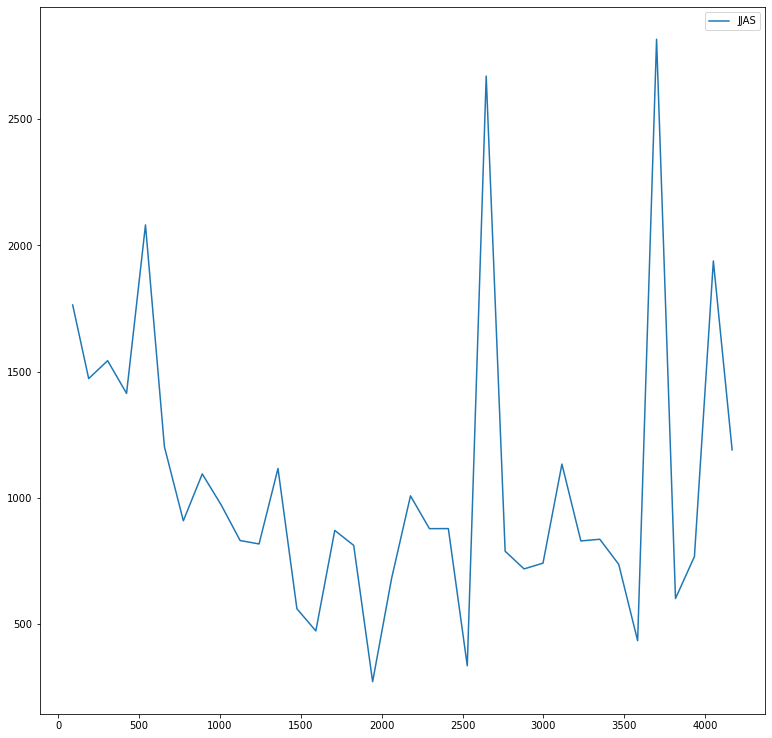

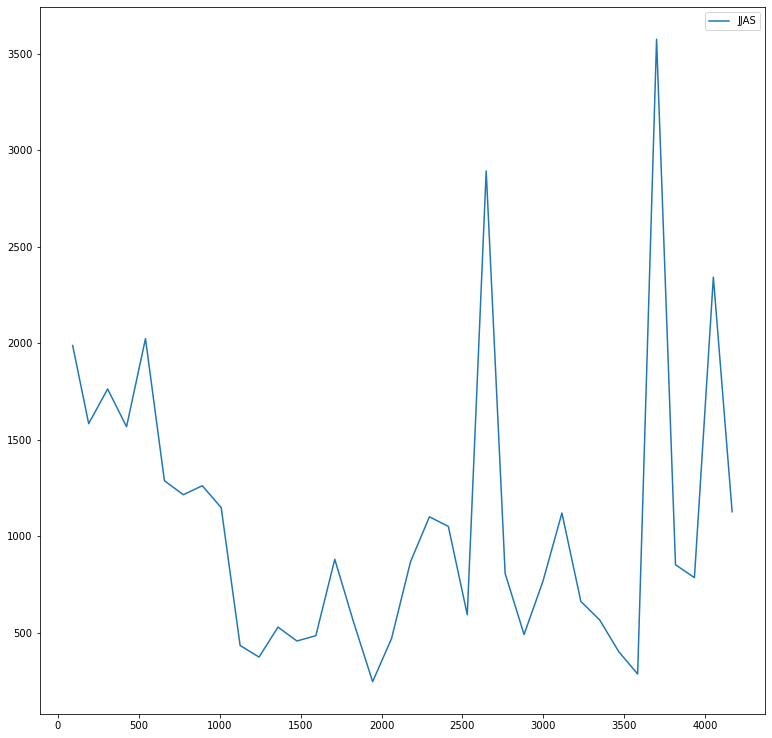

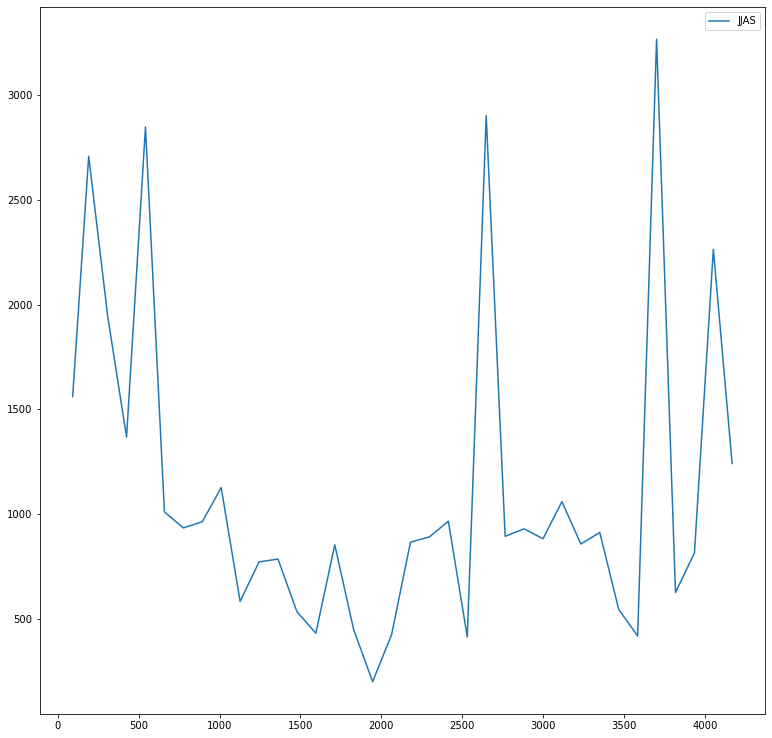

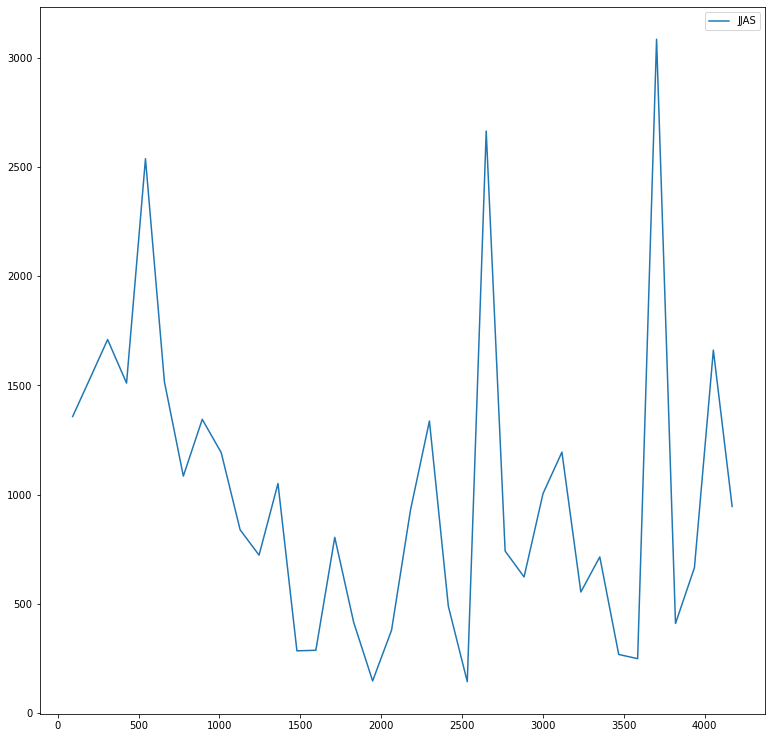

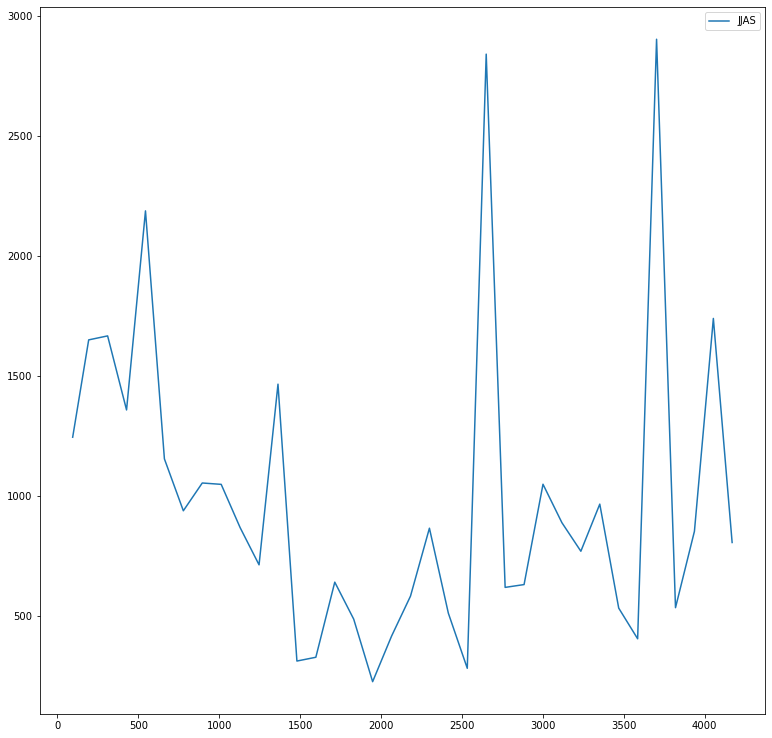

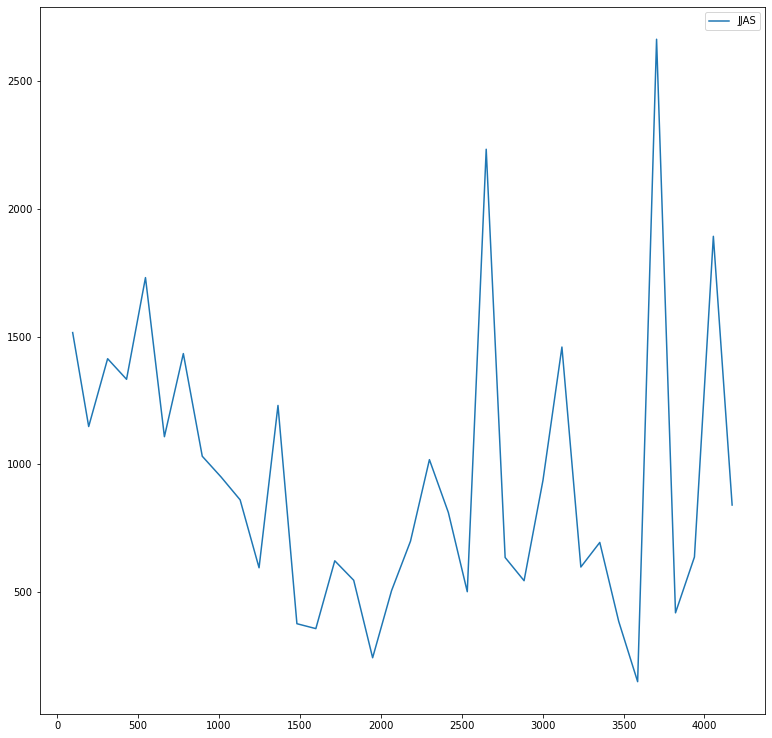

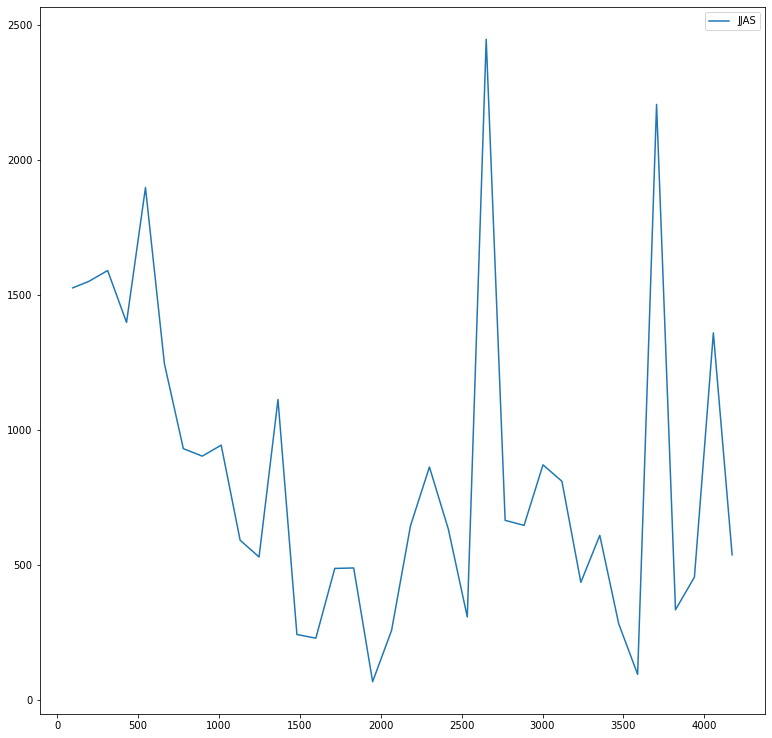

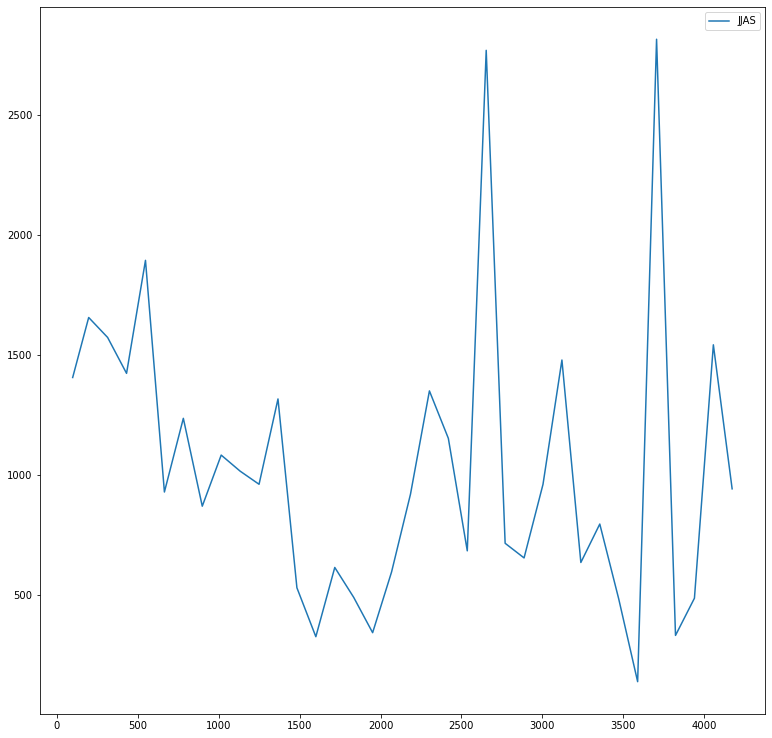

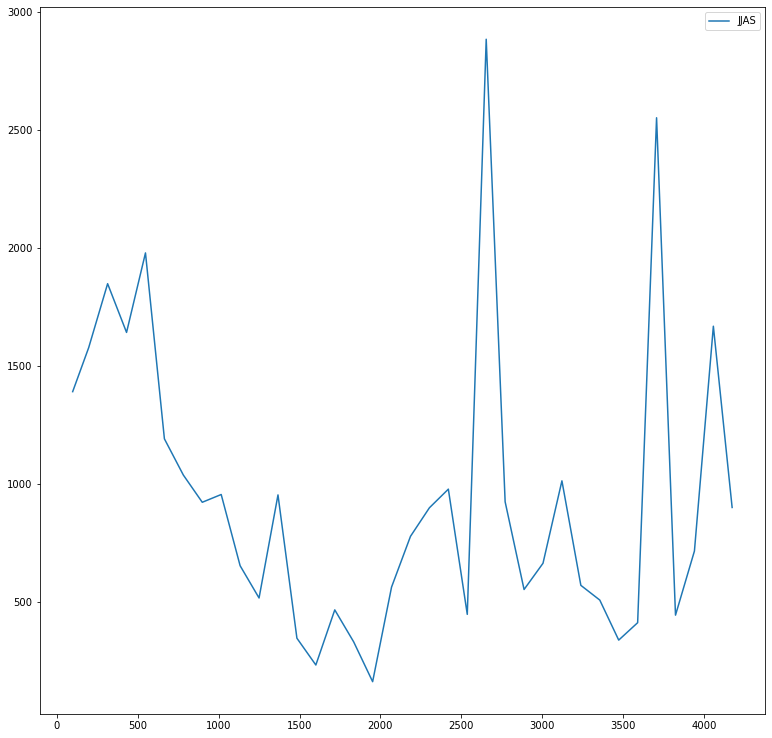

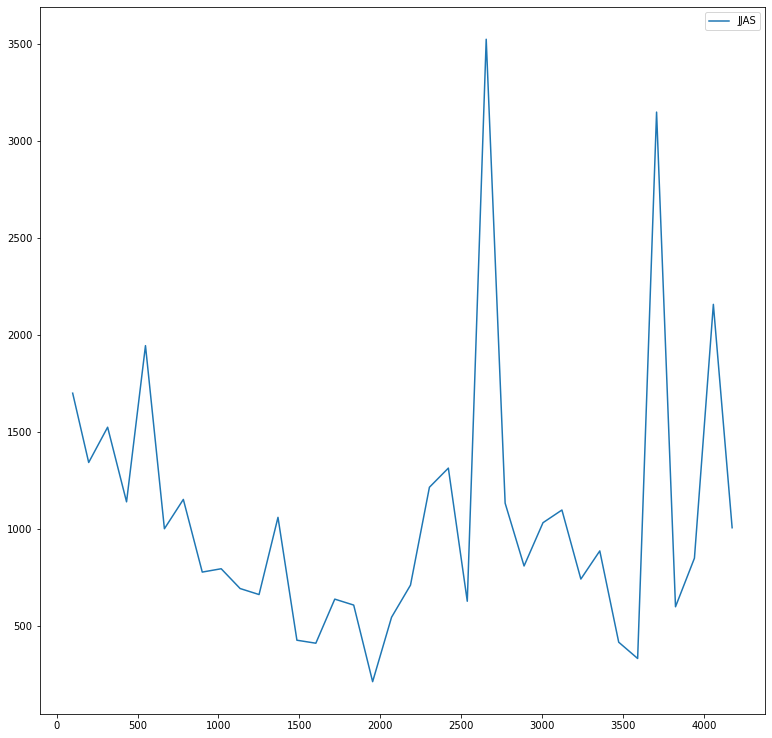

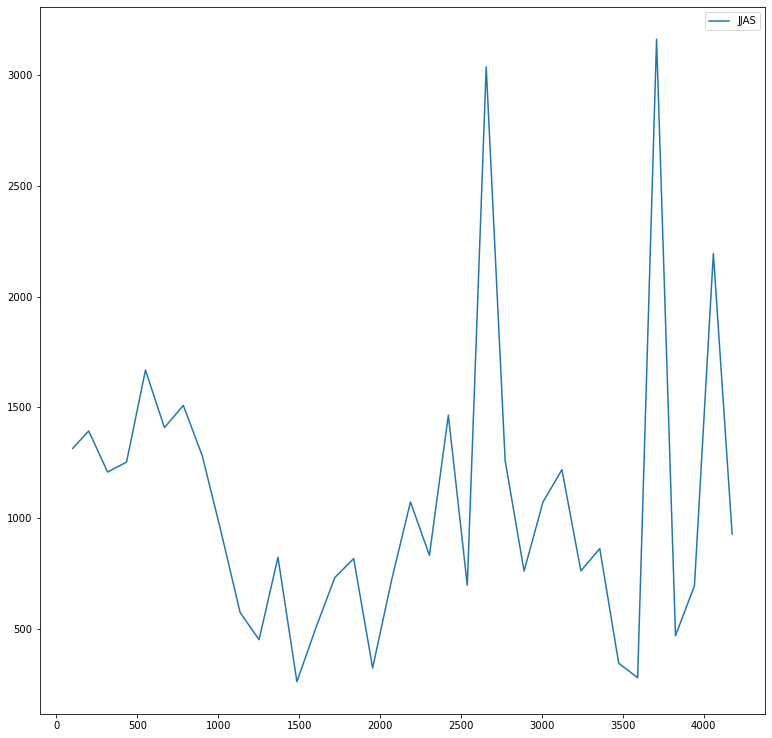

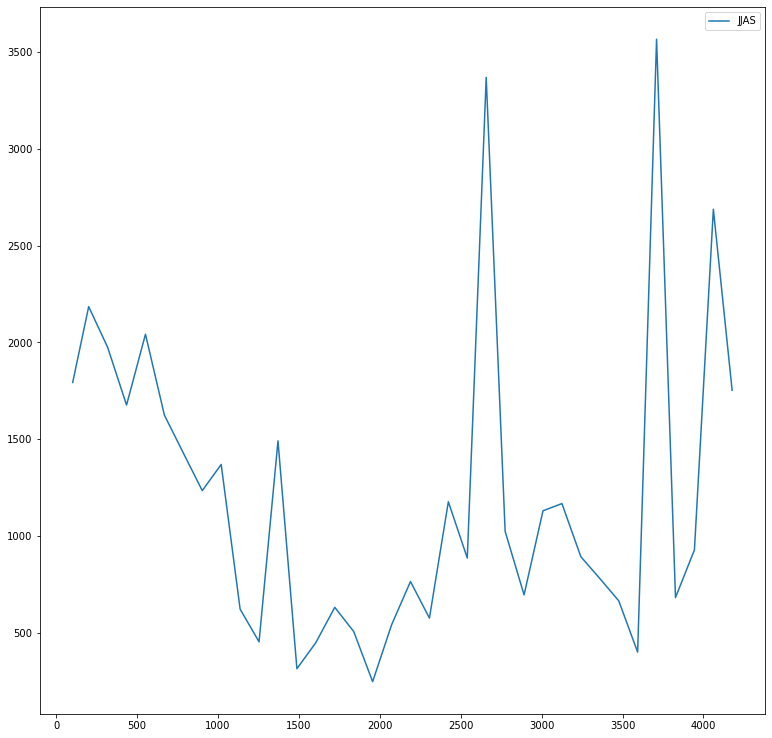

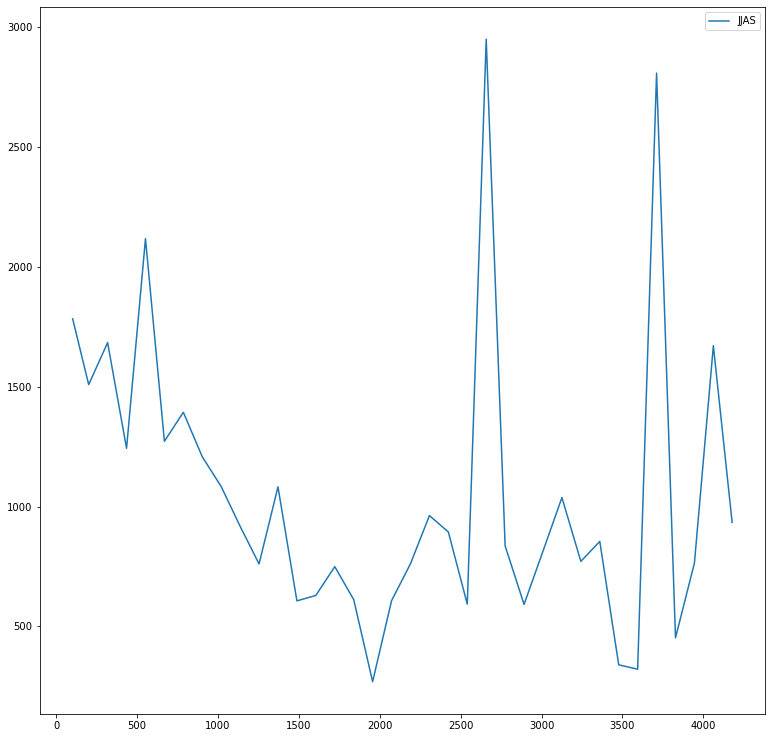

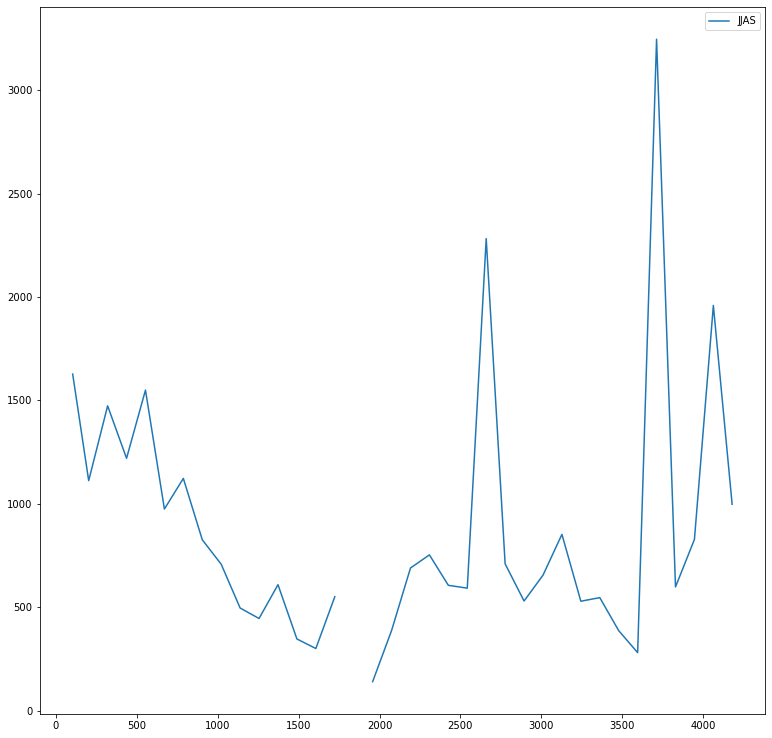

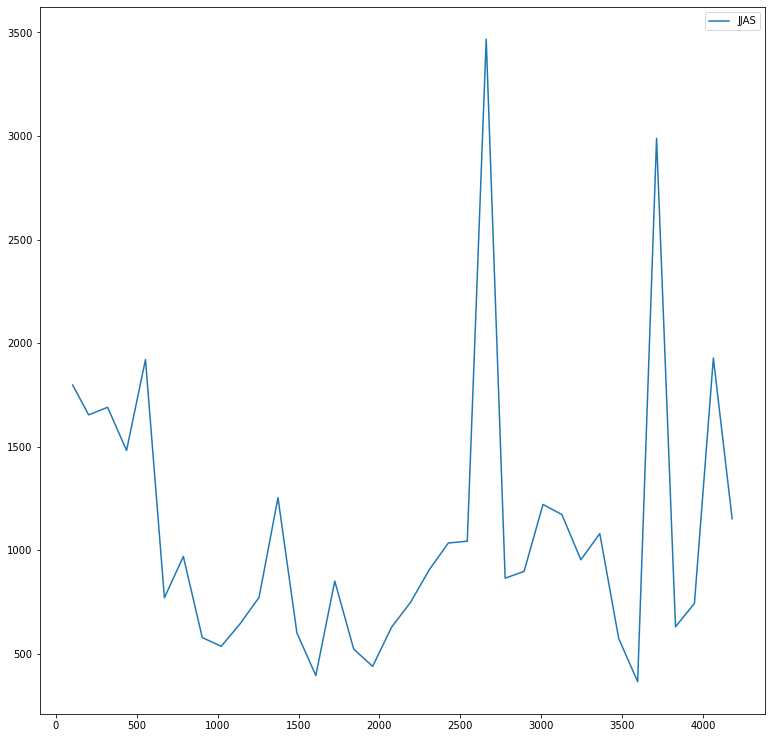

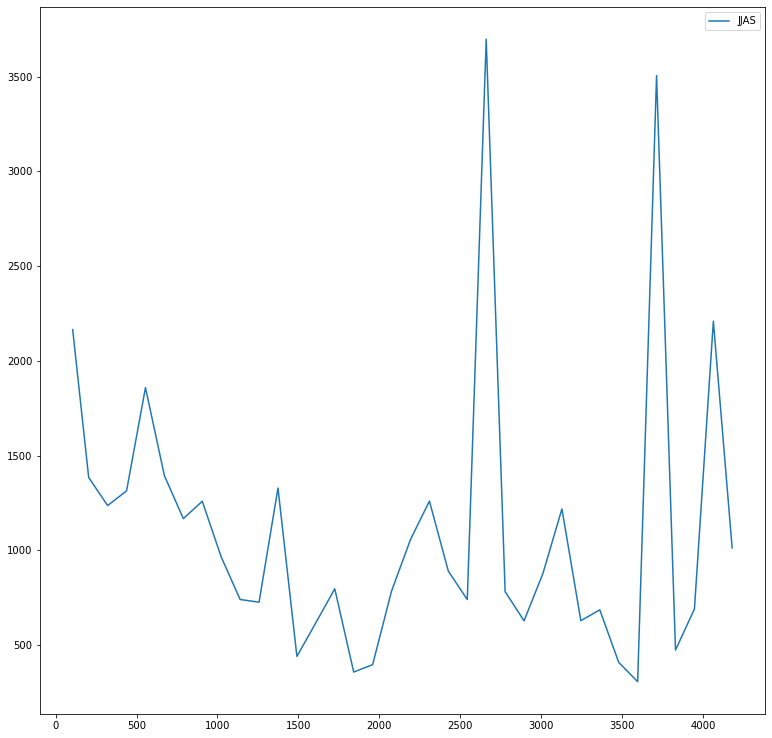

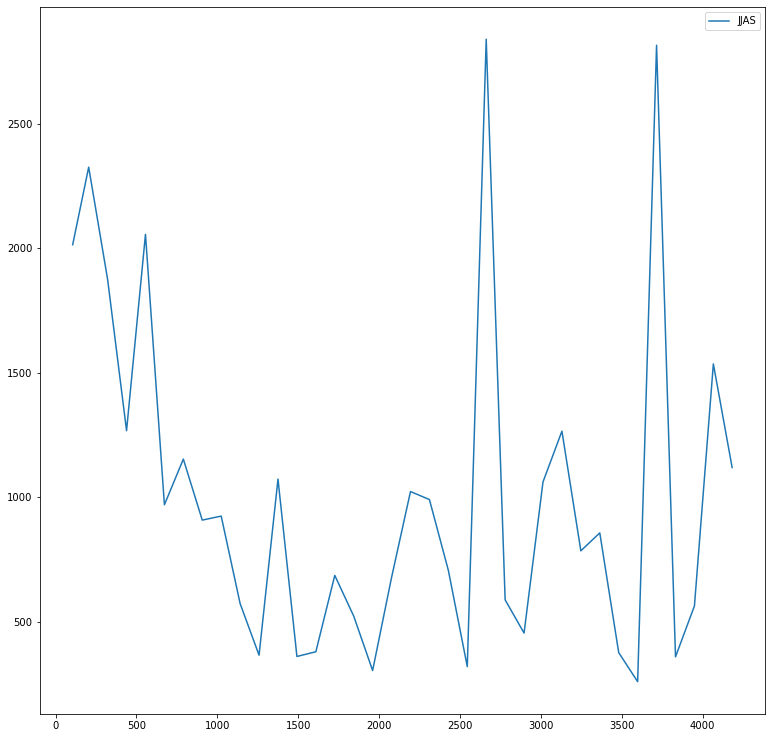

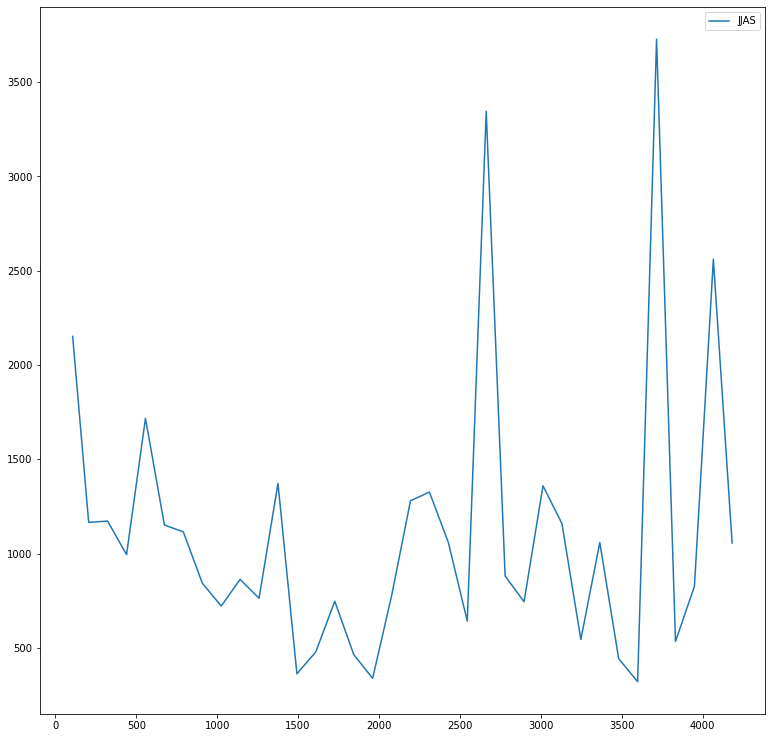

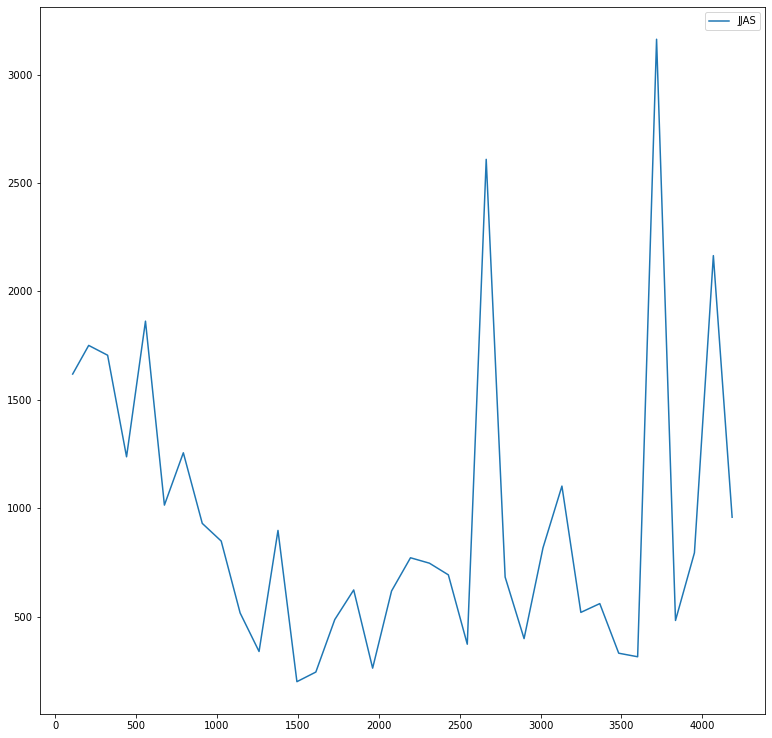

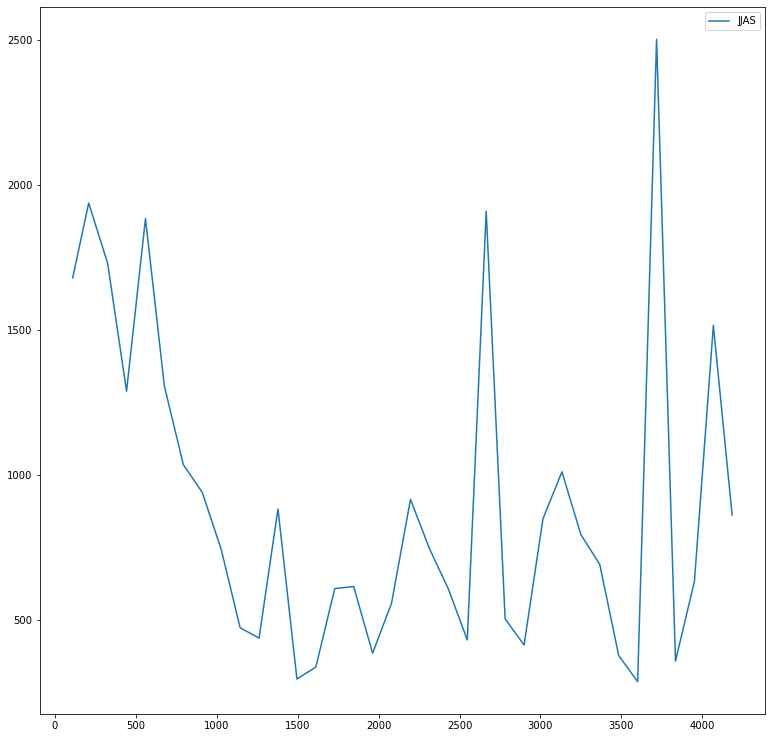

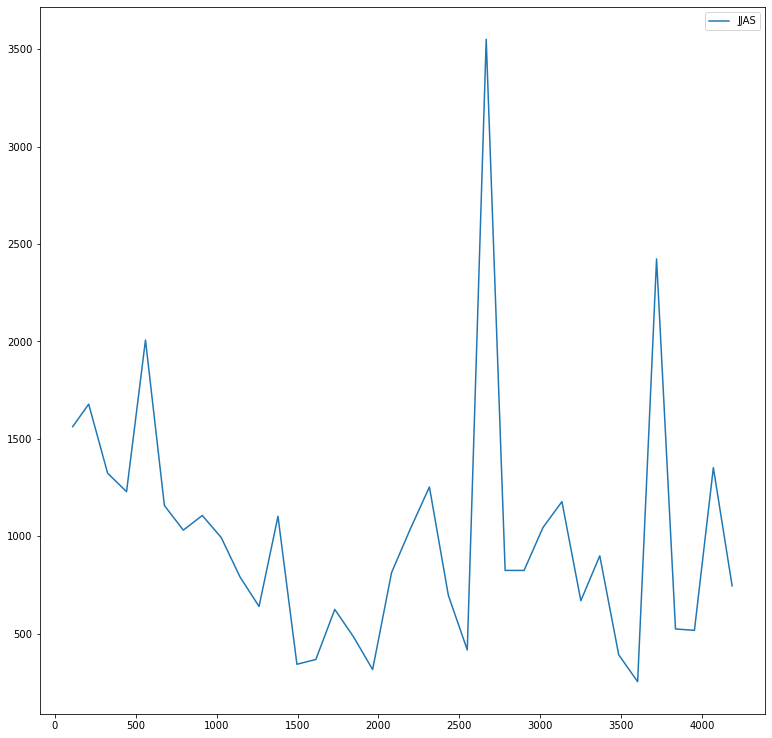

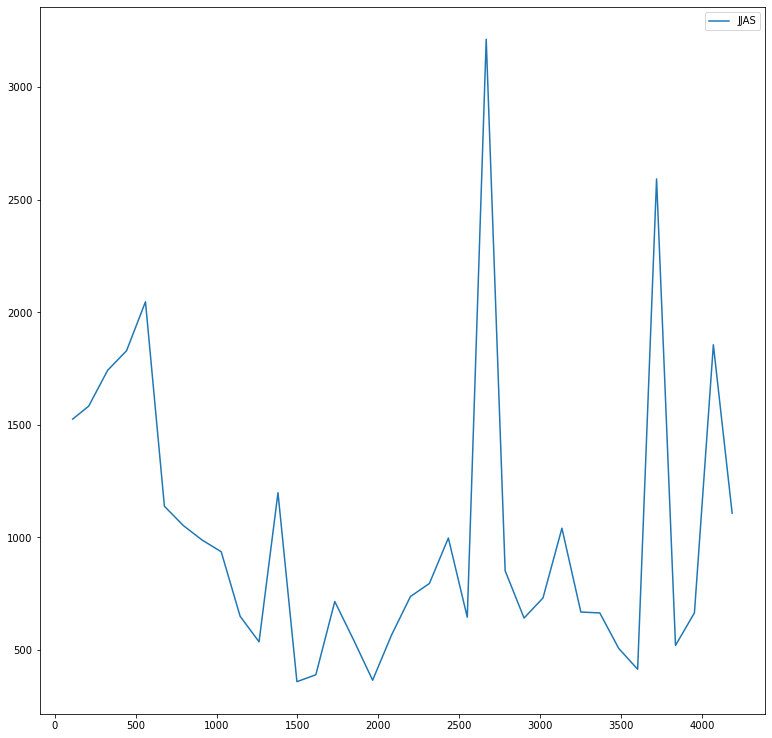

In [11]:
#Yearwise variation from june to september
variation_jun_sep = df.groupby('YEAR')[['JJAS']].plot(figsize=(13,13))

In [2]:
#To check the states having highest and lowest rainfall contribution in India
max_min = df.groupby('SUBDIVISION').sum()[['ANNUAL']].sort_values(by = 'ANNUAL', ascending = False)
max_min

NameError: name 'df' is not defined

In [3]:
#We find that Coastal Karnataka has the highest annual rainfall while West Rajasthan is at the least


<AxesSubplot:xlabel='YEAR'>

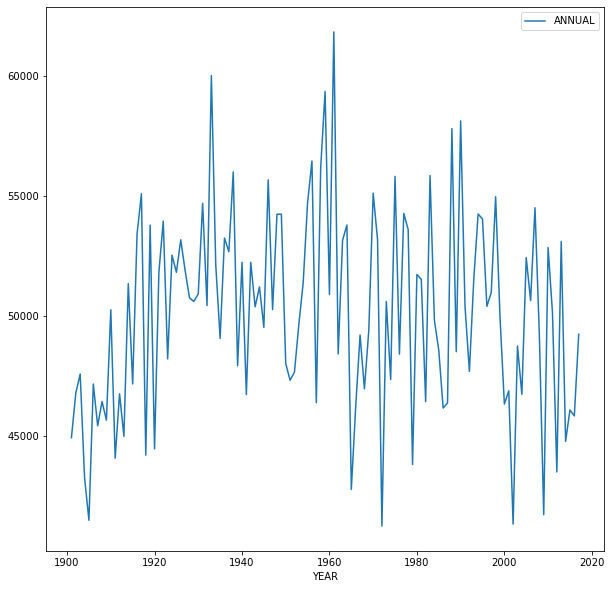

In [14]:
'''Ploting variation for annual rainfall '''
df.groupby('YEAR').sum()[['ANNUAL']].plot(figsize=(10,10))

In [15]:
#we observe that the 1960s were the peak of precipitation received by India and gradually it has lowered down.

<AxesSubplot:xlabel='YEAR'>

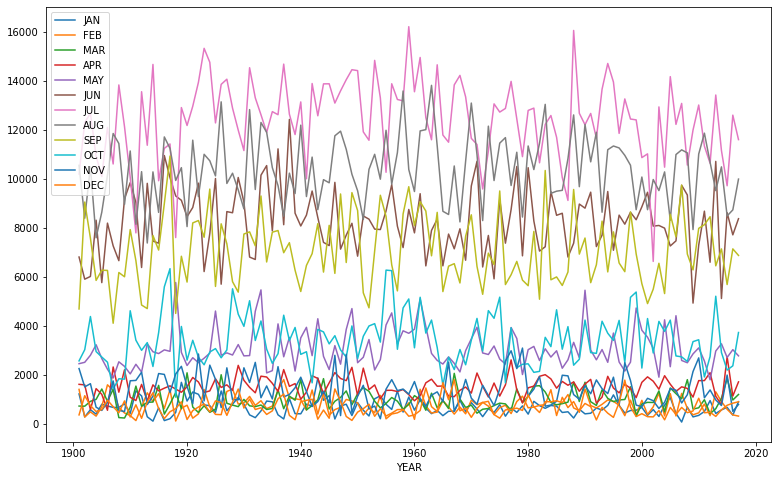

In [16]:
#Monthly variations of Rainfall
df[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("YEAR").sum().plot(figsize=(13,8))

<AxesSubplot:xlabel='YEAR'>

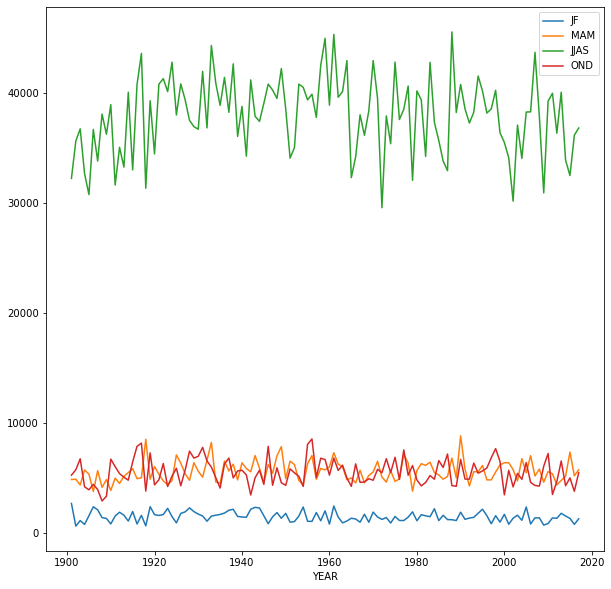

In [17]:
#Seasonal Variations of Rainfall which clearly indicates June to September as prime onset of Monsoons
df[['YEAR', 'JF','MAM','JJAS','OND']].groupby("YEAR").sum().plot(figsize=(10,10))

Text(0, 0.5, 'Rainfall (in mm)')

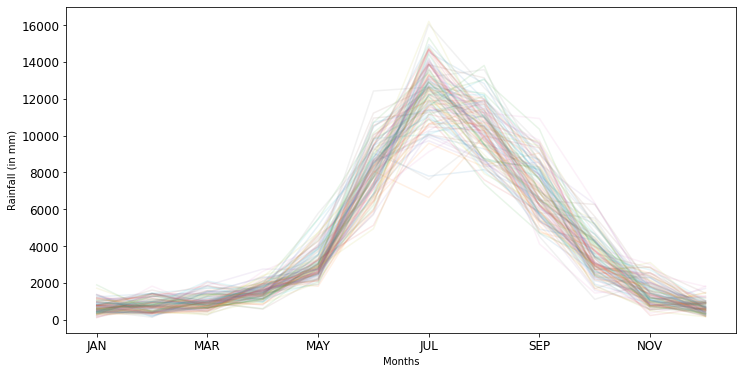

In [20]:
#Seasonal variations across India
drop_columns = ['ANNUAL','JF','MAM','JJAS','OND']
fig, ax = plt.subplots()
(df.groupby(by='YEAR').sum().drop(drop_columns, axis=1).T.plot(alpha=0.1, figsize=(12, 6), legend=False, fontsize=12, ax=ax))
ax.set_xlabel('Months', fontsize=10)
ax.set_ylabel('Rainfall (in mm)', fontsize=10)